# Pandas Introduction

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [60]:
pd.__version__

'1.3.0'

## Series
A ``Series`` is like a column from a database or a spreadsheet. Much of the time the data is numeric, but it can be strings, dates, or Python objects.

In [61]:
s = pd.Series([145, 142, 38, 13])

In [62]:
s

0    145
1    142
2     38
3     13
dtype: int64

can have index that is not numeric

In [63]:
s = pd.Series([145, 142, 38, 13], 
              index='Paul,John,George,Ringo'.split(','),
              name='songs')
s

Paul      145
John      142
George     38
Ringo      13
Name: songs, dtype: int64

## DataFrame
A ``DataFrame`` is like a spreadsheet or database table

In [64]:
df = pd.DataFrame({'songs': s, 
                   'instrument': 'G,G,B,D'.split(',')},
                 index='Paul,John,George,Ringo'.split(','))
df

songs instrument
Paul      145          G
John      142          G
George     38          B
Ringo      13          D

## Getting Data

Looking at Beatles data scraped from http://www.myrsten.nu/worldnet/beatlesongs.htm

#### CSV

In [65]:
!dir ../data

Parameter format not correct - "data".


In [66]:
%ls ..\data

 Volume in drive C is OSDisk
 Volume Serial Number is 8CB4-D4B0

 Directory of C:\Users\KNHOFFM\PycharmProjects\python_for_engineer_science\pydata\data

09/26/2022  07:47 AM    <DIR>          .
09/26/2022  07:47 AM    <DIR>          ..
05/12/2022  01:35 PM               556 anscombes.csv
05/12/2022  01:35 PM            11,307 beatles.csv
05/12/2022  01:35 PM           276,821 central-park-raw.csv
05/12/2022  01:35 PM         1,735,860 snow-alta-1990-2017.csv
05/12/2022  01:35 PM            30,700 table_export.csv
05/12/2022  01:35 PM         1,411,703 vehicles.csv.zip
05/12/2022  01:35 PM               220 xkcd-2048.csv
               7 File(s)      3,467,167 bytes
               2 Dir(s)   8,222,900,224 bytes free


In [67]:
beat = pd.read_csv('../data/beatles.csv')
beat

Unnamed: 0                                     Song  \
0             0                               Love Me Do   
1             1                          P.S. I Love You   
2             2                         Please Please Me   
3             3                               Ask Me Why   
4             4                          There´s a Place   
5             5                 I Saw Her Standing There   
6             6             Do You Want to Know a Secret   
7             7                                   Misery   
8             8                         A Taste of Honey   
9             9                         Anna (Go to Him)   
10           10                                     Boys   
11           11                                   Chains   
12           12                            Baby It´s You   
13           13                          Twist and Shout   
14           14                            Hold Me Tight   
15           15                         It Won´t Be Long   
16           16                            All My Loving   
17           17                      I Wanna Be Your Man   
18           18                             Little Child   
19           19                       All I´ve Got to Do   
20           20                        Not a Second Time   
21           21                          Don´t Bother Me   
22           22                      Roll Over Beethoven   
23           23              You Really Got a Hold on Me   
24           24               Money (That´s What I Want)   
25           25                       Devil in Her Heart   
26           26                       Till There Was You   
27           27                        Please Mr Postman   
28           28                          Long Tall Sally   
29           29                         I Call Your Name   
..          ...                                      ...   
156         156                              Hey Bulldog   
157         157              I Want You (She´s So Heavy)   
158         158                                Something   
159         159                              Oh! Darling   
160         160                         Octopus´s Garden   
161         161             You Never Give Me Your Money   
162         162                              Her Majesty   
163         163                          Golden Slumbers   
164         164                        Carry That Weight   
165         165                       Here Comes the Sun   
166         166                  Maxwell´s Silver Hammer   
167         167                            Come Together   
168         168                                  The End   
169         169                                 Sun King   
170         170                          Mean Mr Mustard   
171         171                            Polythene Pam   
172         172  She Came in Through the Bathroom Window   
173         173                                  Because   
174         174                      Across the Universe   
175         175                              Dig a Ponny   
176         176                       I´ve Got a Feeling   
177         177                                 Get Back   
178         178                                Two of Us   
179         179                               Maggie Mae   
180         180                                   Dig It   
181         181                             For You Blue   
182         182                                Let It Be   
183         183                The Long and Winding Road   
184         184                            One After 909   
185         185                                I Me Mine   

                                    Composer                     Singer  \
0                                  McCartney           Lennon/McCartney   
1                                  McCartney                  McCartney   
2                                     Lennon           Lenn

In [68]:
!head ../data/beatles.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [69]:
%head ../data/beatles.csv

UsageError: Line magic function `%head` not found.


In [ ]:
%lsmagic

In [ ]:
%pfile?

In [ ]:
%pfile ../data/beatles.csv

In [ ]:
beat = pd.read_csv('../data/beatles.csv', index_col=0)
beat

#### DB - BigQuery
Requires ``pandas-gbq`` library. Might need to ``pip install --upgrade setuptools pip`` to get installed.

Visit https://console.cloud.google.com/apis/credentials/serviceaccountkey to enable a Service Account Key as a JSON file. (Role should have "BigQuery User" enabled)

In [ ]:
sak_path = '/Users/matt/.config/gcloud/Pandas Training-c0d9e5603f83.json'
project_id = 'pandas-training'
sql = 'select * from beatlessongs.songs'
data = pd.read_gbq(sql, project_id, private_key=sak_path)

In [ ]:
data

#### MongoDB

* Install Pymongo:

  ``pip install pymongo``


* Run Mongo:

  ``docker run -d --name mongo -p 27017:27017 mvertes/alpine-mongo``

* Start mongo client:

 ``docker exec -ti mongo mongo``
 
* Insert data:


    db.inventory.insertMany([
     // MongoDB adds the _id field with an ObjectId if _id is not present
     { item: "journal", qty: 25, status: "A",
       size: { h: 14, w: 21, uom: "cm" }, tags: [ "blank", "red" ] },
     { item: "notebook", qty: 50, status: "A",
       size: { h: 8.5, w: 11, uom: "in" }, tags: [ "red", "blank" ] },
     { item: "paper", qty: 100, status: "D",
       size: { h: 8.5, w: 11, uom: "in" }, tags: [ "red", "blank", "plain" ] },
     { item: "planner", qty: 75, status: "D",
       size: { h: 22.85, w: 30, uom: "cm" }, tags: [ "blank", "red" ] },
     { item: "postcard", qty: 45, status: "A",
       size: { h: 10, w: 15.25, uom: "cm" }, tags: [ "blue" ] }
    ]);

In [ ]:
from pymongo import MongoClient

def _connect_mongo(host, port, username, password, db):
    """ A util for making a connection to mongo """

    if username and password:
        mongo_uri = 'mongodb://%s:%s@%s:%s/%s' % (username, password, host, port, db)
        conn = MongoClient(mongo_uri)
    else:
        conn = MongoClient(host, port)


    return conn[db]

def read_mongo(db, collection, query={}, host='localhost', port=27017, username=None, password=None, no_id=True):
    """ Read from Mongo and Store into DataFrame """

    # Connect to MongoDB
    db = _connect_mongo(host=host, port=port, username=username, password=password, db=db)

    # Make a query to the specific DB and Collection
    cursor = db[collection].find(query)

    # Expand the cursor and construct the DataFrame
    df =  pd.DataFrame(list(cursor))

    # Delete the _id
    if no_id:
        del df['_id']

    return df

mdf = read_mongo('test', 'inventory')

In [ ]:
mdf

## Getting Data Exercise
Create an ``nyc`` DataFrame by:

* Loading the ``../data/central-park-raw.csv`` dataset, use ``parse_dates`` to set 'EST' to a date

In [74]:
nyc = pd.read_csv('../data/central-park-raw.csv', parse_dates=['EST'])

In [75]:
nyc.head()

EST  Max TemperatureF  Mean TemperatureF  Min TemperatureF  \
0 2006-01-01              42.0               37.0              32.0   
1 2006-01-02              48.0               44.0              39.0   
2 2006-01-03              40.0               37.0              33.0   
3 2006-01-04              38.0               34.0              29.0   
4 2006-01-05              50.0               44.0              37.0   

   Max Dew PointF  MeanDew PointF  Min DewpointF  Max Humidity  \
0            32.0            30.0           28.0          85.0   
1            38.0            34.0           29.0          92.0   
2            38.0            33.0           26.0          92.0   
3            36.0            26.0           19.0          85.0   
4            38.0            35.0           32.0          92.0   

    Mean Humidity   Min Humidity  ...   Max VisibilityMiles  \
0            74.0           62.0  ...                  10.0   
1            71.0           49.0  ...                  10.0   
2            84.0           75.0  ...                  10.0   
3            72.0           59.0  ...                  10.0   
4            71.0           50.0  ...                  10.0   

    Mean VisibilityMiles   Min VisibilityMiles   Max Wind SpeedMPH  \
0                   10.0                   8.0                 9.0   
1                    8.0                   4.0                18.0   
2                    7.0                   2.0                28.0   
3                   10.0                   4.0                15.0   
4                    6.0                   2.0                15.0   

    Mean Wind SpeedMPH   Max Gust SpeedMPH  PrecipitationIn   CloudCover  \
0                  3.0                10.0             0.00          8.0   
1                  5.0                24.0             0.63          5.0   
2                 15.0                41.0             1.13          8.0   
3                  7.0                20.0             0.00          3.0   
4                  5.0                21.0             0.05          6.0   

    Events  WindDirDegrees  
0      NaN           276.0  
1     Rain            76.0  
2     Rain            39.0  
3      NaN            70.0  
4     Rain           251.0  

[5 rows x 23 columns]

## Serializing Data

* ``df.to_csv`` - Human readable
* ``df.to_excel`` - Standard for biz types
* ``df.to_feather`` - Fast, remembers type information

In [ ]:
beat.to_csv('demo-beat.csv')

In [ ]:
!Get-Content demo-beat.csv

In [ ]:
beat

In [ ]:
# using ExcelWriter lets us write multiple sheets to an Excel file (might need to install openpyxl)
xl_writer = pd.ExcelWriter('demo-beat.xlsx')
beat.to_excel(xl_writer, sheet_name='All')
beat[beat.Composer=='Lennon'].to_excel(xl_writer, sheet_name='Lennon')
xl_writer.save()

In [ ]:
# fast binary format (remembers types!) (might need to install feather-format)
beat.to_feather('demo-beat.feather')

## Inspecting Data

In [ ]:
autos = pd.read_csv('../data/vehicles.csv.zip')

In [ ]:
pd.read_csv?

In [ ]:
# Note that the columns attribute is also an Index
autos.columns

In [ ]:
# Pandas infers CSV types
autos.dtypes

In [ ]:
autos = pd.read_csv('../data/vehicles.csv.zip', dtype=dict(autos.dtypes))

In [ ]:
# How much space are we using?
autos.info()

In [ ]:
# First 10 rows
autos.head(10)

In [ ]:
# Sometimes transposing is useful
autos.T  # autos.transpose()

In [ ]:
# Sample might be better
autos.sample(10)

In [ ]:
# Can also change how pandas shows DataFrames in Jupyter
pd.options.display.max_columns

In [ ]:
# Can also change how pandas shows DataFrames in Jupyter
pd.options.display.max_columns = 25

In [ ]:
autos

In [ ]:
# Can also change how pandas shows DataFrames in Jupyter
# Pandas 1.x inconsistency
pd.options.display.max_rows = 60

In [ ]:
# Sometimes transposing is useful
autos.T  # autos.transpose()

In [ ]:
# max rows doesn't really do what you want
with pd.option_context('display.max_rows', 60):
    display(autos)

In [ ]:
with pd.option_context('display.min_rows', 60):
    display(autos)

In [ ]:
# rows x cols
autos.shape

In [ ]:
autos.memory_usage()

In [ ]:
autos['modifiedOn'].dtype

In [ ]:
autos.memory_usage(deep=True)

In [ ]:
# What does the index look like?
autos.index

In [ ]:
# Can change the index (note that this is not mutating the data)
autos.set_index('year')

In [ ]:
autos

In [ ]:
# Can even do crazy things like this
autos.set_index(['year', 'make'])

In [ ]:
# Resetting the index (note "chained" operation) CHAINING!
(autos
 .set_index(['year', 'make'])
 .reset_index()
)

## Inspecting Data Exercise

Your turn with the lab data:
* What are the columns of the dataframe?
* What are the types of the columns?
* How would you print the first 10 rows of data?
* How would you transpose the data?
* What is the shape of the data?
* How would we inspect the index?

In [76]:
nyc.columns

Index(['EST', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')

In [77]:
nyc.columns = nyc.columns.str.strip()

In [78]:
nyc.dtypes

EST                          datetime64[ns]
Max TemperatureF                    float64
Mean TemperatureF                   float64
Min TemperatureF                    float64
Max Dew PointF                      float64
MeanDew PointF                      float64
Min DewpointF                       float64
Max Humidity                        float64
Mean Humidity                       float64
Min Humidity                        float64
Max Sea Level PressureIn            float64
Mean Sea Level PressureIn           float64
Min Sea Level PressureIn            float64
Max VisibilityMiles                 float64
Mean VisibilityMiles                float64
Min VisibilityMiles                 float64
Max Wind SpeedMPH                   float64
Mean Wind SpeedMPH                  float64
Max Gust SpeedMPH                   float64
PrecipitationIn                      object
CloudCover                          float64
Events                               object
WindDirDegrees                  

In [79]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   EST                        3287 non-null   datetime64[ns]
 1   Max TemperatureF           3285 non-null   float64       
 2   Mean TemperatureF          3285 non-null   float64       
 3   Min TemperatureF           3285 non-null   float64       
 4   Max Dew PointF             3285 non-null   float64       
 5   MeanDew PointF             3285 non-null   float64       
 6   Min DewpointF              3285 non-null   float64       
 7   Max Humidity               3285 non-null   float64       
 8   Mean Humidity              3285 non-null   float64       
 9   Min Humidity               3285 non-null   float64       
 10  Max Sea Level PressureIn   3275 non-null   float64       
 11  Mean Sea Level PressureIn  3275 non-null   float64       
 12  Min Se

In [80]:
nyc['PrecipitationIn'].isna().value_counts()

False    3286
True        1
Name: PrecipitationIn, dtype: int64

In [81]:
nyc.head(10)

EST  Max TemperatureF  Mean TemperatureF  Min TemperatureF  \
0 2006-01-01              42.0               37.0              32.0   
1 2006-01-02              48.0               44.0              39.0   
2 2006-01-03              40.0               37.0              33.0   
3 2006-01-04              38.0               34.0              29.0   
4 2006-01-05              50.0               44.0              37.0   
5 2006-01-06              43.0               37.0              30.0   
6 2006-01-07              35.0               30.0              25.0   
7 2006-01-08              46.0               40.0              34.0   
8 2006-01-09              60.0               52.0              43.0   
9 2006-01-10              49.0               45.0              41.0   

   Max Dew PointF  MeanDew PointF  Min DewpointF  Max Humidity  Mean Humidity  \
0            32.0            30.0           28.0          85.0           74.0   
1            38.0            34.0           29.0          92.0           71.0   
2            38.0            33.0           26.0          92.0           84.0   
3            36.0            26.0           19.0          85.0           72.0   
4            38.0            35.0           32.0          92.0           71.0   
5            33.0            24.0           14.0          73.0           60.0   
6            19.0            14.0           11.0          60.0           51.0   
7            35.0            25.0           19.0          70.0           56.0   
8            39.0            36.0           30.0          76.0           60.0   
9            31.0            28.0           26.0          62.0           52.0   

   Min Humidity  ...  Max VisibilityMiles  Mean VisibilityMiles  \
0          62.0  ...                 10.0                  10.0   
1          49.0  ...                 10.0                   8.0   
2          75.0  ...                 10.0                   7.0   
3          59.0  ...                 10.0                  10.0   
4          50.0  ...                 10.0                   6.0   
5          47.0  ...                 10.0                  10.0   
6          41.0  ...                 10.0                  10.0   
7          41.0  ...                 10.0                  10.0   
8          44.0  ...                 10.0                  10.0   
9          42.0  ...                 10.0                  10.0   

   Min VisibilityMiles  Max Wind SpeedMPH  Mean Wind SpeedMPH  \
0                  8.0                9.0                 3.0   
1                  4.0               18.0                 5.0   
2                  2.0               28.0                15.0   
3                  4.0               15.0                 7.0   
4                  2.0               15.0                 5.0   
5                 10.0               17.0                 6.0   
6                 10.0               15.0                 7.0   
7                 10.0               13.0                 5.0   
8                 10.0               15.0                 8.0   
9                 10.0               10.0                 6.0   

   Max Gust SpeedMPH  PrecipitationIn  CloudCover  Events WindDirDegrees  
0               10.0             0.00         8.0     NaN          276.0  
1               24.0             0.63         5.0    Rain           76.0  
2               41.0             1.13         8.0    Rain           39.0  
3               20.0             0.00         3.0     NaN           70.0  
4               21.0             0.05         6.0    Rain          251.0  
5               25.0             0.00         7.0     NaN          317.0  
6               23.0             0.00         2.0     NaN          267.0  
7               17.0             0.00         3.0     NaN          192.0  
8               24.0             0.00         1.0     NaN          249.0  
9               16.0             0.00         1.0     NaN          261.0  

[10 rows x 23 columns]

In [82]:
nyc.T

0                    1     \
EST                        2006-01-01 00:00:00  2006-01-02 00:00:00   
Max TemperatureF                          42.0                 48.0   
Mean TemperatureF                         37.0                 44.0   
Min TemperatureF                          32.0                 39.0   
Max Dew PointF                            32.0                 38.0   
MeanDew PointF                            30.0                 34.0   
Min DewpointF                             28.0                 29.0   
Max Humidity                              85.0                 92.0   
Mean Humidity                             74.0                 71.0   
Min Humidity                              62.0                 49.0   
Max Sea Level PressureIn                  30.2                30.24   
Mean Sea Level PressureIn                30.03                30.15   
Min Sea Level PressureIn                 29.83                29.93   
Max VisibilityMiles                       10.0                 10.0   
Mean VisibilityMiles                      10.0                  8.0   
Min VisibilityMiles                        8.0                  4.0   
Max Wind SpeedMPH                          9.0                 18.0   
Mean Wind SpeedMPH                         3.0                  5.0   
Max Gust SpeedMPH                         10.0                 24.0   
PrecipitationIn                           0.00                 0.63   
CloudCover                                 8.0                  5.0   
Events                                     NaN                 Rain   
WindDirDegrees                           276.0                 76.0   

                                          2                    3     \
EST                        2006-01-03 00:00:00  2006-01-04 00:00:00   
Max TemperatureF                          40.0                 38.0   
Mean TemperatureF                         37.0                 34.0   
Min TemperatureF                          33.0                 29.0   
Max Dew PointF                            38.0                 36.0   
MeanDew PointF                            33.0                 26.0   
Min DewpointF                             26.0                 19.0   
Max Humidity                              92.0                 85.0   
Mean Humidity                             84.0                 72.0   
Min Humidity                              75.0                 59.0   
Max Sea Level PressureIn                 30.05                30.09   
Mean Sea Level PressureIn                29.93                29.96   
Min Sea Level PressureIn                 29.83                29.79   
Max VisibilityMiles                       10.0                 10.0   
Mean VisibilityMiles                       7.0                 10.0   
Min VisibilityMiles                        2.0                  4.0   
Max Wind SpeedMPH                         28.0                 15.0   
Mean Wind SpeedMPH                        15.0                  7.0   
Max Gust SpeedMPH                         41.0                 20.0   
PrecipitationIn                           1.13                 0.00   
CloudCover                                 8.0                  3.0   
Events                                    Rain                  NaN   
WindDirDegrees                            39.0                 70.0   

                                          4                    5     \
EST                        2006-01-05 00:00:00  2006-01-06 00:00:00   
Max TemperatureF                          50.0                 43.0   
Mean TemperatureF                         44.0                 37.0   
Min TemperatureF                          37.0                 30.0   
Max Dew PointF                            38.0                 33.0   
MeanDew PointF                            35.0                 24.0   
Min DewpointF                             32.0                 14.0   
Max Humidity                              92.0                 7

In [83]:
nyc.shape

(3287, 23)

In [84]:
nyc.index

RangeIndex(start=0, stop=3287, step=1)

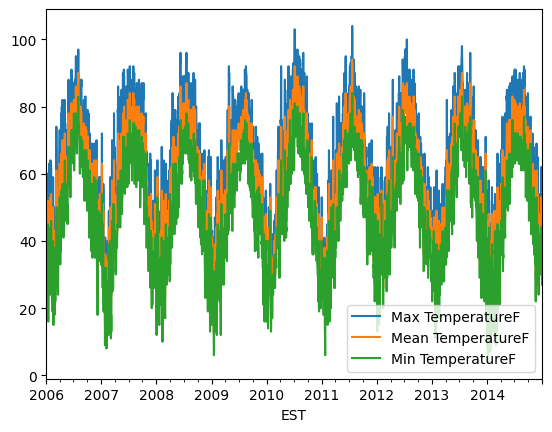

In [85]:
nyc.set_index('EST').iloc[:,:3].plot();

## Tweaking Data

  *In Data Science, 80% of time spent prepare data, 20% of time spent complain about need for  prepare data.*
  
  -@bigdataborat
  
Let's see how we spend 80% of our time. 


In [78]:
# I like to look at the types
autos.dtypes

barrels08          float64
barrelsA08         float64
charge120          float64
charge240          float64
city08               int64
city08U            float64
cityA08              int64
cityA08U           float64
cityCD             float64
cityE              float64
cityUF             float64
co2                  int64
co2A                 int64
co2TailpipeAGpm    float64
co2TailpipeGpm     float64
comb08               int64
comb08U            float64
combA08              int64
combA08U           float64
combE              float64
combinedCD         float64
combinedUF         float64
cylinders          float64
displ              float64
drive               object
engId                int64
eng_dscr            object
feScore              int64
fuelCost08           int64
fuelCostA08          int64
                    ...   
rangeCity          float64
rangeCityA         float64
rangeHwy           float64
rangeHwyA          float64
trany               object
UCity              float64
U

In [79]:
pd.options.display.min_rows = 60

In [80]:
autos.dtypes

barrels08          float64
barrelsA08         float64
charge120          float64
charge240          float64
city08               int64
city08U            float64
cityA08              int64
cityA08U           float64
cityCD             float64
cityE              float64
cityUF             float64
co2                  int64
co2A                 int64
co2TailpipeAGpm    float64
co2TailpipeGpm     float64
comb08               int64
comb08U            float64
combA08              int64
combA08U           float64
combE              float64
combinedCD         float64
combinedUF         float64
cylinders          float64
displ              float64
drive               object
engId                int64
eng_dscr            object
feScore              int64
fuelCost08           int64
fuelCostA08          int64
                    ...   
rangeCity          float64
rangeCityA         float64
rangeHwy           float64
rangeHwyA          float64
trany               object
UCity              float64
U

In [81]:
autos.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [82]:
autos.columns.str.replace(r'([A-Z])', r'_\1')

C:\Users\KNHOFFM\AppData\Local\Temp\ipykernel_4764\1774107879.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  autos.columns.str.replace(r'([A-Z])', r'_\1')


Index(['barrels08', 'barrels_A08', 'charge120', 'charge240', 'city08',
       'city08_U', 'city_A08', 'city_A08_U', 'city_C_D', 'city_E', 'city_U_F',
       'co2', 'co2_A', 'co2_Tailpipe_A_Gpm', 'co2_Tailpipe_Gpm', 'comb08',
       'comb08_U', 'comb_A08', 'comb_A08_U', 'comb_E', 'combined_C_D',
       'combined_U_F', 'cylinders', 'displ', 'drive', 'eng_Id', 'eng_dscr',
       'fe_Score', 'fuel_Cost08', 'fuel_Cost_A08', 'fuel_Type', 'fuel_Type1',
       'ghg_Score', 'ghg_Score_A', 'highway08', 'highway08_U', 'highway_A08',
       'highway_A08_U', 'highway_C_D', 'highway_E', 'highway_U_F', 'hlv',
       'hpv', 'id', 'lv2', 'lv4', 'make', 'model', 'mpg_Data', 'phev_Blended',
       'pv2', 'pv4', 'range', 'range_City', 'range_City_A', 'range_Hwy',
       'range_Hwy_A', 'trany', '_U_City', '_U_City_A', '_U_Highway',
       '_U_Highway_A', '_V_Class', 'year', 'you_Save_Spend', 'guzzler',
       'trans_dscr', 't_Charger', 's_Charger', 'atv_Type', 'fuel_Type2',
       'range_A', 'ev_Motor', 'm

In [83]:
# not required but I like to rename columns so they can be
# valid Python attributes (ie no spaces/wierd chars)
# Two options:
# - Set .columns attribute with a list
# - Call .rename method (I prefer this)

# (regex cheatsheet https://www.debuggex.com/cheatsheet/regex/python )
import re
a2 = autos.copy()
a2.columns = [re.sub(r'([A-Z])', r'_\1', c).lower().lstrip('_') 
              for c in a2.columns]  # mutation! Does not return dataframe! no chaining!

In [84]:
a2

barrels08  barrels_a08  charge120  charge240  city08  city08_u  \
0      15.695714          0.0        0.0        0.0      19       0.0   
1      29.964545          0.0        0.0        0.0       9       0.0   
2      12.207778          0.0        0.0        0.0      23       0.0   
3      29.964545          0.0        0.0        0.0      10       0.0   
4      17.347895          0.0        0.0        0.0      17       0.0   
5      14.982273          0.0        0.0        0.0      21       0.0   
6      13.184400          0.0        0.0        0.0      22       0.0   
7      13.733750          0.0        0.0        0.0      23       0.0   
8      12.677308          0.0        0.0        0.0      23       0.0   
9      13.184400          0.0        0.0        0.0      23       0.0   
10     12.677308          0.0        0.0        0.0      23       0.0   
11     15.695714          0.0        0.0        0.0      18       0.0   
12     13.733750          0.0        0.0        0.0      21       0.0   
13     15.695714          0.0        0.0        0.0      18       0.0   
14     25.354615          0.0        0.0        0.0      12       0.0   
15     14.330870          0.0        0.0        0.0      20       0.0   
16     16.480500          0.0        0.0        0.0      18       0.0   
17     15.695714          0.0        0.0        0.0      19       0.0   
18     17.347895          0.0        0.0        0.0      17       0.0   
19     17.347895          0.0        0.0        0.0      17       0.0   
20     20.600625          0.0        0.0        0.0      14       0.0   
21     20.600625          0.0        0.0        0.0      14       0.0   
22     25.354615          0.0        0.0        0.0      11       0.0   
23     14.330870          0.0        0.0        0.0      21       0.0   
24     17.347895          0.0        0.0        0.0      17       0.0   
25     25.354615          0.0        0.0        0.0      11       0.0   
26     15.695714          0.0        0.0        0.0      18       0.0   
27     16.480500          0.0        0.0        0.0      17       0.0   
28     16.480500          0.0        0.0        0.0      17       0.0   
29     16.480500          0.0        0.0        0.0      17       0.0   
...          ...          ...        ...        ...     ...       ...   
39071  12.677308          0.0        0.0        0.0      23       0.0   
39072  14.330870          0.0        0.0        0.0      21       0.0   
39073  13.184400          0.0        0.0        0.0      22       0.0   
39074  15.695714          0.0        0.0        0.0      18       0.0   
39075  16.480500          0.0        0.0        0.0      17       0.0   
39076  14.982273          0.0        0.0        0.0      19       0.0   
39077  14.330870          0.0        0.0        0.0      19       0.0   
39078  13.733750          0.0        0.0        0.0      21       0.0   
39079  21.974000          0.0        0.0        0.0      14       0.0   
39080  15.695714          0.0        0.0        0.0      18       0.0   
39081  15.695714          0.0        0.0        0.0      18       0.0   
39082  13.184400          0.0        0.0        0.0      23       0.0   
39083  11.771786          0.0        0.0        0.0      24       0.0   
39084  10.987000          0.0        0.0        0.0      26       0.0   
39085  29.964545          0.0        0.0        0.0      10       0.0   
39086  18.311667          0.0        0.0        0.0      17       0.0   
39087  15.695714          0.0        0.0        0.0      18       0.0   
39088  15.695714          0.0        0.0        0.0      18       0.0   
39089  18.311667          0.0        0.0        0.0      16       0.0   
39090  27.467500          0.0        0.0        0.0      11       0.0   
39091  16.480500          0.0        0.0        0.0      18       0.0   
39092  12.677308          0.0        0.0        0.0      23       0.0   
39093  13.733750          0.0        0.0        0.0      21      

In [85]:
autos.rename(columns=dict(zip(
    autos.columns, 
    (autos
     .columns.str.replace(r'([A-Z])', r'_\1', regex=True)
     .str.lower()
     .str.lstrip('_'))))
)

barrels08  barrels_a08  charge120  charge240  city08  city08_u  \
0      15.695714          0.0        0.0        0.0      19       0.0   
1      29.964545          0.0        0.0        0.0       9       0.0   
2      12.207778          0.0        0.0        0.0      23       0.0   
3      29.964545          0.0        0.0        0.0      10       0.0   
4      17.347895          0.0        0.0        0.0      17       0.0   
5      14.982273          0.0        0.0        0.0      21       0.0   
6      13.184400          0.0        0.0        0.0      22       0.0   
7      13.733750          0.0        0.0        0.0      23       0.0   
8      12.677308          0.0        0.0        0.0      23       0.0   
9      13.184400          0.0        0.0        0.0      23       0.0   
10     12.677308          0.0        0.0        0.0      23       0.0   
11     15.695714          0.0        0.0        0.0      18       0.0   
12     13.733750          0.0        0.0        0.0      21       0.0   
13     15.695714          0.0        0.0        0.0      18       0.0   
14     25.354615          0.0        0.0        0.0      12       0.0   
15     14.330870          0.0        0.0        0.0      20       0.0   
16     16.480500          0.0        0.0        0.0      18       0.0   
17     15.695714          0.0        0.0        0.0      19       0.0   
18     17.347895          0.0        0.0        0.0      17       0.0   
19     17.347895          0.0        0.0        0.0      17       0.0   
20     20.600625          0.0        0.0        0.0      14       0.0   
21     20.600625          0.0        0.0        0.0      14       0.0   
22     25.354615          0.0        0.0        0.0      11       0.0   
23     14.330870          0.0        0.0        0.0      21       0.0   
24     17.347895          0.0        0.0        0.0      17       0.0   
25     25.354615          0.0        0.0        0.0      11       0.0   
26     15.695714          0.0        0.0        0.0      18       0.0   
27     16.480500          0.0        0.0        0.0      17       0.0   
28     16.480500          0.0        0.0        0.0      17       0.0   
29     16.480500          0.0        0.0        0.0      17       0.0   
...          ...          ...        ...        ...     ...       ...   
39071  12.677308          0.0        0.0        0.0      23       0.0   
39072  14.330870          0.0        0.0        0.0      21       0.0   
39073  13.184400          0.0        0.0        0.0      22       0.0   
39074  15.695714          0.0        0.0        0.0      18       0.0   
39075  16.480500          0.0        0.0        0.0      17       0.0   
39076  14.982273          0.0        0.0        0.0      19       0.0   
39077  14.330870          0.0        0.0        0.0      19       0.0   
39078  13.733750          0.0        0.0        0.0      21       0.0   
39079  21.974000          0.0        0.0        0.0      14       0.0   
39080  15.695714          0.0        0.0        0.0      18       0.0   
39081  15.695714          0.0        0.0        0.0      18       0.0   
39082  13.184400          0.0        0.0        0.0      23       0.0   
39083  11.771786          0.0        0.0        0.0      24       0.0   
39084  10.987000          0.0        0.0        0.0      26       0.0   
39085  29.964545          0.0        0.0        0.0      10       0.0   
39086  18.311667          0.0        0.0        0.0      17       0.0   
39087  15.695714          0.0        0.0        0.0      18       0.0   
39088  15.695714          0.0        0.0        0.0      18       0.0   
39089  18.311667          0.0        0.0        0.0      16       0.0   
39090  27.467500          0.0        0.0        0.0      11       0.0   
39091  16.480500          0.0        0.0        0.0      18       0.0   
39092  12.677308          0.0        0.0        0.0      23       0.0   
39093  13.733750          0.0        0.0        0.0      21      

In [86]:
# pandas often has two (or more) ways to do something
def to_camelcase(val):
    return re.sub(r'([A-Z])', r'_\1', val).lower().lstrip('_')

autos.rename(columns=to_camelcase)

barrels08  barrels_a08  charge120  charge240  city08  city08_u  \
0      15.695714          0.0        0.0        0.0      19       0.0   
1      29.964545          0.0        0.0        0.0       9       0.0   
2      12.207778          0.0        0.0        0.0      23       0.0   
3      29.964545          0.0        0.0        0.0      10       0.0   
4      17.347895          0.0        0.0        0.0      17       0.0   
5      14.982273          0.0        0.0        0.0      21       0.0   
6      13.184400          0.0        0.0        0.0      22       0.0   
7      13.733750          0.0        0.0        0.0      23       0.0   
8      12.677308          0.0        0.0        0.0      23       0.0   
9      13.184400          0.0        0.0        0.0      23       0.0   
10     12.677308          0.0        0.0        0.0      23       0.0   
11     15.695714          0.0        0.0        0.0      18       0.0   
12     13.733750          0.0        0.0        0.0      21       0.0   
13     15.695714          0.0        0.0        0.0      18       0.0   
14     25.354615          0.0        0.0        0.0      12       0.0   
15     14.330870          0.0        0.0        0.0      20       0.0   
16     16.480500          0.0        0.0        0.0      18       0.0   
17     15.695714          0.0        0.0        0.0      19       0.0   
18     17.347895          0.0        0.0        0.0      17       0.0   
19     17.347895          0.0        0.0        0.0      17       0.0   
20     20.600625          0.0        0.0        0.0      14       0.0   
21     20.600625          0.0        0.0        0.0      14       0.0   
22     25.354615          0.0        0.0        0.0      11       0.0   
23     14.330870          0.0        0.0        0.0      21       0.0   
24     17.347895          0.0        0.0        0.0      17       0.0   
25     25.354615          0.0        0.0        0.0      11       0.0   
26     15.695714          0.0        0.0        0.0      18       0.0   
27     16.480500          0.0        0.0        0.0      17       0.0   
28     16.480500          0.0        0.0        0.0      17       0.0   
29     16.480500          0.0        0.0        0.0      17       0.0   
...          ...          ...        ...        ...     ...       ...   
39071  12.677308          0.0        0.0        0.0      23       0.0   
39072  14.330870          0.0        0.0        0.0      21       0.0   
39073  13.184400          0.0        0.0        0.0      22       0.0   
39074  15.695714          0.0        0.0        0.0      18       0.0   
39075  16.480500          0.0        0.0        0.0      17       0.0   
39076  14.982273          0.0        0.0        0.0      19       0.0   
39077  14.330870          0.0        0.0        0.0      19       0.0   
39078  13.733750          0.0        0.0        0.0      21       0.0   
39079  21.974000          0.0        0.0        0.0      14       0.0   
39080  15.695714          0.0        0.0        0.0      18       0.0   
39081  15.695714          0.0        0.0        0.0      18       0.0   
39082  13.184400          0.0        0.0        0.0      23       0.0   
39083  11.771786          0.0        0.0        0.0      24       0.0   
39084  10.987000          0.0        0.0        0.0      26       0.0   
39085  29.964545          0.0        0.0        0.0      10       0.0   
39086  18.311667          0.0        0.0        0.0      17       0.0   
39087  15.695714          0.0        0.0        0.0      18       0.0   
39088  15.695714          0.0        0.0        0.0      18       0.0   
39089  18.311667          0.0        0.0        0.0      16       0.0   
39090  27.467500          0.0        0.0        0.0      11       0.0   
39091  16.480500          0.0        0.0        0.0      18       0.0   
39092  12.677308          0.0        0.0        0.0      23       0.0   
39093  13.733750          0.0        0.0        0.0      21      

In [87]:
autos.dtypes

barrels08          float64
barrelsA08         float64
charge120          float64
charge240          float64
city08               int64
city08U            float64
cityA08              int64
cityA08U           float64
cityCD             float64
cityE              float64
cityUF             float64
co2                  int64
co2A                 int64
co2TailpipeAGpm    float64
co2TailpipeGpm     float64
comb08               int64
comb08U            float64
combA08              int64
combA08U           float64
combE              float64
combinedCD         float64
combinedUF         float64
cylinders          float64
displ              float64
drive               object
engId                int64
eng_dscr            object
feScore              int64
fuelCost08           int64
fuelCostA08          int64
                    ...   
rangeCity          float64
rangeCityA         float64
rangeHwy           float64
rangeHwyA          float64
trany               object
UCity              float64
U

In [88]:
# This looks categorical - (Vehicle has start stop technology)
autos.startStop.value_counts()

N    5176
Y    2229
Name: startStop, dtype: int64

In [89]:
# This looks categorical
autos.startStop.value_counts(dropna=False)

NaN    31696
N       5176
Y       2229
Name: startStop, dtype: int64

## Excellent way to investigate
select_dtypes(object/int/float) this is awesome

In [90]:
autos.select_dtypes(object).T

0                             1      \
drive                   Rear-Wheel Drive              Rear-Wheel Drive   
eng_dscr                           (FFS)                     (GUZZLER)   
fuelType                         Regular                       Regular   
fuelType1               Regular Gasoline              Regular Gasoline   
make                          Alfa Romeo                       Ferrari   
model                 Spider Veloce 2000                    Testarossa   
mpgData                                Y                             N   
trany                       Manual 5-spd                  Manual 5-spd   
VClass                       Two Seaters                   Two Seaters   
guzzler                              NaN                             T   
trans_dscr                           NaN                           NaN   
tCharger                             NaN                           NaN   
sCharger                             NaN                           NaN   
atvType                              NaN                           NaN   
fuelType2                            NaN                           NaN   
rangeA                               NaN                           NaN   
evMotor                              NaN                           NaN   
mfrCode                              NaN                           NaN   
c240Dscr                             NaN                           NaN   
c240bDscr                            NaN                           NaN   
createdOn   Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013   
modifiedOn  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013   
startStop                            NaN                           NaN   

                                   2                             3      \
drive                  Front-Wheel Drive              Rear-Wheel Drive   
eng_dscr                           (FFS)                           NaN   
fuelType                         Regular                       Regular   
fuelType1               Regular Gasoline              Regular Gasoline   
make                               Dodge                         Dodge   
model                            Charger           B150/B250 Wagon 2WD   
mpgData                                Y                             N   
trany                       Manual 5-spd               Automatic 3-spd   
VClass                   Subcompact Cars                          Vans   
guzzler                              NaN                           NaN   
trans_dscr                           SIL                           NaN   
tCharger                             NaN                           NaN   
sCharger                             NaN                           NaN   
atvType                              NaN                           NaN   
fuelType2                            NaN                           NaN   
rangeA                               NaN                           NaN   
evMotor                              NaN                           NaN   
mfrCode                              NaN                           NaN   
c240Dscr                             NaN                           NaN   
c240bDscr                            NaN                           NaN   
createdOn   Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013   
modifiedOn  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013   
startStop                            NaN                           NaN   

                                   4                             5      \
drive         4-Wheel or All-Wheel Drive             Front-Wheel Drive   
eng_dscr                      (FFS,TRBO)                         (FFS)   
fuelType                         Premium                       Regular   
fuelType1               Premium Gasoline              Regular Gasoline   
make                              Subaru                        Subaru   
model                   Legacy AWD Tu

In [91]:
autos.eng_dscr.value_counts(dropna=False)

NaN                                   15670
(FFS)                                  8827
SIDI                                   4297
(FFS) CA model                          926
(FFS)      (MPFI)                       734
FFV                                     671
(FFS,TRBO)                              666
(350 V8) (FFS)                          411
(GUZZLER)  (FFS)                        366
SOHC                                    354
SIDI; FFV                               276
(NO-CAT)                                238
FLEX-FUEL                               198
GUZZLER                                 195
(FFS)      (SPFI)                       194
SIDI & PFI                              158
(GUZZLER)  (FFS)      (MPFI)            122
(350 V8)                                120
CA model                                113
(350 V8) (FFS)  (MPFI)                  106
(GM-CHEV)                               102
DOHC       (FFS)                         96
(DIESEL)                        

In [92]:
(autos.eng_dscr
 .str.contains('FFS')
 .value_counts(dropna=False)
)# Feedback Fuel System

NaN      15670
True     14357
False     9074
Name: eng_dscr, dtype: int64

In [93]:
autos[autos.eng_dscr.str.contains('FFS', na=False)].T

0                             2      \
barrels08                           15.695714                     12.207778   
barrelsA08                                0.0                           0.0   
charge120                                 0.0                           0.0   
charge240                                 0.0                           0.0   
city08                                     19                            23   
city08U                                   0.0                           0.0   
cityA08                                     0                             0   
cityA08U                                  0.0                           0.0   
cityCD                                    0.0                           0.0   
cityE                                     0.0                           0.0   
cityUF                                    0.0                           0.0   
co2                                        -1                            -1   
co2A                                       -1                            -1   
co2TailpipeAGpm                           0.0                           0.0   
co2TailpipeGpm                     423.190476                    329.148148   
comb08                                     21                            27   
comb08U                                   0.0                           0.0   
combA08                                     0                             0   
combA08U                                  0.0                           0.0   
combE                                     0.0                           0.0   
combinedCD                                0.0                           0.0   
combinedUF                                0.0                           0.0   
cylinders                                 4.0                           4.0   
displ                                     2.0                           2.2   
drive                        Rear-Wheel Drive             Front-Wheel Drive   
engId                                    9011                          2100   
eng_dscr                                (FFS)                         (FFS)   
feScore                                    -1                            -1   
fuelCost08                               1900                          1500   
fuelCostA08                                 0                             0   
...                                       ...                           ...   
rangeCity                                 0.0                           0.0   
rangeCityA                                0.0                           0.0   
rangeHwy                                  0.0                           0.0   
rangeHwyA                                 0.0                           0.0   
trany                            Manual 5-spd                  Manual 5-spd   
UCity                                 23.3333                          29.0   
UCityA                                    0.0                           0.0   
UHighway                                 35.0                          47.0   
UHighwayA                                 0.0                           0.0   
VClass                            Two Seaters               Subcompact Cars   
year                                     1985                          1985   
youSaveSpend                            -1750                           250   
guzzler                                   NaN                           NaN   
trans_dscr                                NaN                           SIL   
tCharger                                  NaN                           NaN   
sCharger                                  NaN                           NaN   
atvType                                   NaN                           NaN   
fuelType2                                 NaN                           NaN   
rangeA                                    NaN                           NaN   
evMotor    

In [94]:
autos.eng_dscr.str.contains?

In [95]:
(autos
 [autos.eng_dscr.str.contains('FFS', na=False)]
 .eng_dscr
 .value_counts()
)

(FFS)                                8827
(FFS) CA model                        926
(FFS)      (MPFI)                     734
(FFS,TRBO)                            666
(350 V8) (FFS)                        411
(GUZZLER)  (FFS)                      366
(FFS)      (SPFI)                     194
(GUZZLER)  (FFS)      (MPFI)          122
(350 V8) (FFS)  (MPFI)                106
DOHC       (FFS)                       96
(GUZZLER) (FFS)                        84
(FFS,TRBO) CA model                    81
SOHC       (FFS)                       78
DOHC TURBO (FFS,TRBO)                  76
(305)      (FFS)                       71
(CAL)(FFS)                             67
SOHC-4     (FFS)                       50
(GM-CHEV)  (FFS)                       46
(DOHC)     (FFS)                       44
(GUZZLER)  (FFS,TRBO)                  40
(SOHC)     (FFS)                       39
SOHC-4 2WD (FFS)                       37
(FFS) fuel injection                   37
FFS                               

In [96]:
# .assign will return a new dataframe with new columns (ffs in this case)
(autos
.assign(ffs=autos.eng_dscr.str.contains('FFS', na=False)))

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      15.695714         0.0        0.0        0.0      19      0.0        0   
1      29.964545         0.0        0.0        0.0       9      0.0        0   
2      12.207778         0.0        0.0        0.0      23      0.0        0   
3      29.964545         0.0        0.0        0.0      10      0.0        0   
4      17.347895         0.0        0.0        0.0      17      0.0        0   
5      14.982273         0.0        0.0        0.0      21      0.0        0   
6      13.184400         0.0        0.0        0.0      22      0.0        0   
7      13.733750         0.0        0.0        0.0      23      0.0        0   
8      12.677308         0.0        0.0        0.0      23      0.0        0   
9      13.184400         0.0        0.0        0.0      23      0.0        0   
10     12.677308         0.0        0.0        0.0      23      0.0        0   
11     15.695714         0.0        0.0        0.0      18      0.0        0   
12     13.733750         0.0        0.0        0.0      21      0.0        0   
13     15.695714         0.0        0.0        0.0      18      0.0        0   
14     25.354615         0.0        0.0        0.0      12      0.0        0   
15     14.330870         0.0        0.0        0.0      20      0.0        0   
16     16.480500         0.0        0.0        0.0      18      0.0        0   
17     15.695714         0.0        0.0        0.0      19      0.0        0   
18     17.347895         0.0        0.0        0.0      17      0.0        0   
19     17.347895         0.0        0.0        0.0      17      0.0        0   
20     20.600625         0.0        0.0        0.0      14      0.0        0   
21     20.600625         0.0        0.0        0.0      14      0.0        0   
22     25.354615         0.0        0.0        0.0      11      0.0        0   
23     14.330870         0.0        0.0        0.0      21      0.0        0   
24     17.347895         0.0        0.0        0.0      17      0.0        0   
25     25.354615         0.0        0.0        0.0      11      0.0        0   
26     15.695714         0.0        0.0        0.0      18      0.0        0   
27     16.480500         0.0        0.0        0.0      17      0.0        0   
28     16.480500         0.0        0.0        0.0      17      0.0        0   
29     16.480500         0.0        0.0        0.0      17      0.0        0   
...          ...         ...        ...        ...     ...      ...      ...   
39071  12.677308         0.0        0.0        0.0      23      0.0        0   
39072  14.330870         0.0        0.0        0.0      21      0.0        0   
39073  13.184400         0.0        0.0        0.0      22      0.0        0   
39074  15.695714         0.0        0.0        0.0      18      0.0        0   
39075  16.480500         0.0        0.0        0.0      17      0.0        0   
39076  14.982273         0.0        0.0        0.0      19      0.0        0   
39077  14.330870         0.0        0.0        0.0      19      0.0        0   
39078  13.733750         0.0        0.0        0.0      21      0.0        0   
39079  21.974000         0.0        0.0        0.0      14      0.0        0   
39080  15.695714         0.0        0.0        0.0      18      0.0        0   
39081  15.695714         0.0        0.0        0.0      18      0.0        0   
39082  13.184400         0.0        0.0        0.0      23      0.0        0   
39083  11.771786         0.0        0.0        0.0      24      0.0        0   
39084  10.987000         0.0        0.0        0.0      26      0.0        0   
39085  29.964545         0.0        0.0        0.0      10      0.0        0   
39086  18.311667         0.0        0.0        0.0      17      0.0        0   
39087  15.695714         0.0        0.0        0.0      18      0.0        0   
39088  15.695714         0.0        0.0        0.0      18      0.0        0   
39089  

In [97]:
autos.trany.value_counts()

Automatic 4-spd                     11045
Manual 5-spd                         8337
Automatic 3-spd                      3151
Automatic (S6)                       2857
Manual 6-spd                         2563
Automatic 5-spd                      2191
Automatic 6-spd                      1521
Manual 4-spd                         1483
Automatic (S8)                       1181
Automatic (S5)                        830
Automatic (variable gear ratios)      730
Automatic 7-spd                       695
Automatic 8-spd                       323
Automatic (AM-S7)                     322
Automatic (S7)                        288
Automatic (S4)                        233
Automatic (AM7)                       194
Automatic (AV-S6)                     172
Automatic 9-spd                       170
Automatic (A1)                        134
Automatic (AM6)                       122
Automatic (AM-S6)                     106
Automatic (AV-S7)                      95
Manual 7-spd                      

In [98]:
autos.trany.str.extract(r'(\d*)')   # fails...returns nothing

0 
0       
1       
2       
3       
4       
5       
6       
7       
8       
9       
10      
11      
12      
13      
14      
15      
16      
17      
18      
19      
20      
21      
22      
23      
24      
25      
26      
27      
28      
29      
...   ..
39071   
39072   
39073   
39074   
39075   
39076   
39077   
39078   
39079   
39080   
39081   
39082   
39083   
39084   
39085   
39086   
39087   
39088   
39089   
39090   
39091   
39092   
39093   
39094   
39095   
39096   
39097   
39098   
39099   
39100   

[39101 rows x 1 columns]

In [99]:
pd.concat([
    autos.trany,
    autos.trany.str.extract(r'(\d*)')
], axis=1)

trany 0 
0         Manual 5-spd   
1         Manual 5-spd   
2         Manual 5-spd   
3      Automatic 3-spd   
4         Manual 5-spd   
5      Automatic 3-spd   
6         Manual 5-spd   
7      Automatic 3-spd   
8         Manual 5-spd   
9      Automatic 4-spd   
10        Manual 5-spd   
11     Automatic 4-spd   
12        Manual 5-spd   
13     Automatic 4-spd   
14     Automatic 3-spd   
15        Manual 5-spd   
16     Automatic 4-spd   
17        Manual 5-spd   
18     Automatic 4-spd   
19        Manual 5-spd   
20     Automatic 5-spd   
21     Automatic 5-spd   
22     Automatic 4-spd   
23     Automatic 3-spd   
24     Automatic 3-spd   
25        Manual 4-spd   
26     Automatic 4-spd   
27     Automatic 3-spd   
28     Automatic 4-spd   
29     Automatic 4-spd   
...                ... ..
39071     Manual 5-spd   
39072  Automatic 3-spd   
39073     Manual 5-spd   
39074  Automatic 4-spd   
39075     Manual 5-spd   
39076  Automatic 3-spd   
39077  Automatic 3-spd   
39078     Manual 5-spd   
39079     Manual 4-spd   
39080     Manual 5-spd   
39081  Automatic 3-spd   
39082  Automatic 3-spd   
39083     Manual 4-spd   
39084     Manual 5-spd   
39085  Automatic 4-spd   
39086  Automatic 3-spd   
39087     Manual 5-spd   
39088     Manual 5-spd   
39089  Automatic 3-spd   
39090  Automatic 3-spd   
39091     Manual 5-spd   
39092  Automatic 4-spd   
39093  Automatic 4-spd   
39094     Manual 5-spd   
39095     Manual 5-spd   
39096  Automatic 4-spd   
39097     Manual 5-spd   
39098  Automatic 4-spd   
39099     Manual 5-spd   
39100  Automatic 4-spd   

[39101 rows x 2 columns]

In [100]:
pd.concat([
    autos.trany,
    autos.trany.str.extract(r'(\d+)')
], axis=1)

trany  0
0         Manual 5-spd  5
1         Manual 5-spd  5
2         Manual 5-spd  5
3      Automatic 3-spd  3
4         Manual 5-spd  5
5      Automatic 3-spd  3
6         Manual 5-spd  5
7      Automatic 3-spd  3
8         Manual 5-spd  5
9      Automatic 4-spd  4
10        Manual 5-spd  5
11     Automatic 4-spd  4
12        Manual 5-spd  5
13     Automatic 4-spd  4
14     Automatic 3-spd  3
15        Manual 5-spd  5
16     Automatic 4-spd  4
17        Manual 5-spd  5
18     Automatic 4-spd  4
19        Manual 5-spd  5
20     Automatic 5-spd  5
21     Automatic 5-spd  5
22     Automatic 4-spd  4
23     Automatic 3-spd  3
24     Automatic 3-spd  3
25        Manual 4-spd  4
26     Automatic 4-spd  4
27     Automatic 3-spd  3
28     Automatic 4-spd  4
29     Automatic 4-spd  4
...                ... ..
39071     Manual 5-spd  5
39072  Automatic 3-spd  3
39073     Manual 5-spd  5
39074  Automatic 4-spd  4
39075     Manual 5-spd  5
39076  Automatic 3-spd  3
39077  Automatic 3-spd  3
39078     Manual 5-spd  5
39079     Manual 4-spd  4
39080     Manual 5-spd  5
39081  Automatic 3-spd  3
39082  Automatic 3-spd  3
39083     Manual 4-spd  4
39084     Manual 5-spd  5
39085  Automatic 4-spd  4
39086  Automatic 3-spd  3
39087     Manual 5-spd  5
39088     Manual 5-spd  5
39089  Automatic 3-spd  3
39090  Automatic 3-spd  3
39091     Manual 5-spd  5
39092  Automatic 4-spd  4
39093  Automatic 4-spd  4
39094     Manual 5-spd  5
39095     Manual 5-spd  5
39096  Automatic 4-spd  4
39097     Manual 5-spd  5
39098  Automatic 4-spd  4
39099     Manual 5-spd  5
39100  Automatic 4-spd  4

[39101 rows x 2 columns]

In [101]:
# Might not work on older versions (works in 1.3+)
autos.trany.str.extract(r'(\d+)').describe()

0
count   38360
unique      9
top         4
freq    12780

In [102]:
# Might not work on older versions (works in 1.3+)
autos.trany.str.extract(r'(\d+)').value_counts()

4     12780
5     11372
6      7341
3      3230
7      1687
8      1566
9       211
1       134
10       39
dtype: int64

In [103]:
autos.trany.str.extract(r'(\d+)', expand=False).value_counts()

4     12780
5     11372
6      7341
3      3230
7      1687
8      1566
9       211
1       134
10       39
Name: trany, dtype: int64

In [104]:
# autos.trany.str.extract(r'(\d+)', expand=False).astype('int8')

In [105]:
autos.trany.str.extract(r'(\d+)', expand=False).value_counts(dropna=False)

4      12780
5      11372
6       7341
3       3230
7       1687
8       1566
NaN      741
9        211
1        134
10        39
Name: trany, dtype: int64

In [106]:
(autos
 .loc[autos.trany.str.extract(r'(\d+)', expand=False).isna(), 
      ['make', 'model', 'cylinders', 'eng_dscr','trany', 'year']]
)

make                         model  cylinders  \
2903        Honda                      Civic HX        4.0   
3728        Honda                         Civic        4.0   
4549        Honda                      Civic HX        4.0   
5415        Honda                      Civic HX        4.0   
6308        Honda                      Civic HX        4.0   
7138       Nissan                      Altra EV        NaN   
7139       Toyota                       RAV4 EV        NaN   
7162        Honda                       Insight        3.0   
7163        Honda                       Insight        3.0   
7238        Honda                      Civic HX        4.0   
7451       Toyota                         Prius        4.0   
8138        Honda                     Civic CNG        4.0   
8143       Toyota                       RAV4 EV        NaN   
8144         Ford                         Th!nk        NaN   
8146         Ford        Explorer USPS Electric        NaN   
8147       Nissan                    Hyper-Mini        NaN   
8172        Honda                       Insight        3.0   
8207         MINI                        Cooper        4.0   
8252        Honda                      Civic HX        4.0   
8323         Audi                            A4        4.0   
8325         Audi                            A4        6.0   
8483       Toyota                         Prius        4.0   
8518         Audi                            A6        6.0   
9025       Saturn                       Vue FWD        4.0   
9149       Saturn                       Vue AWD        4.0   
9187        Honda                     Civic CNG        4.0   
9212       Toyota                       RAV4 EV        NaN   
9213         Ford        Explorer USPS Electric        NaN   
9237        Honda                       Insight        3.0   
9326         Audi                  A4 Cabriolet        4.0   
...           ...                           ...        ...   
31454    Cadillac                   CT6 Plug-In        4.0   
31817       Honda                           Fit        4.0   
31884      Toyota                       Prius c        4.0   
32010  Mitsubishi                        Mirage        3.0   
32012  Mitsubishi                     Mirage G4        3.0   
32054   Chevrolet                          Volt        4.0   
32172        Ford             Fusion Hybrid FWD        4.0   
32183       Honda                      HR-V FWD        4.0   
32185       Honda                      HR-V AWD        4.0   
32213      Nissan                         Versa        4.0   
32218   Chevrolet                 Malibu Hybrid        4.0   
32221      Toyota                       Corolla        4.0   
32224      Toyota                Corolla LE Eco        4.0   
32225      Toyota                Corolla LE Eco        4.0   
32231       Honda                     Civic 5Dr        4.0   
32295        Ford  Fusion Energi Plug-in Hybrid        4.0   
32302   Chevrolet                         Spark        4.0   
32303   Chevrolet                   Spark ACTIV        4.0   
32321     Lincoln                MKZ Hybrid FWD        4.0   
32351      Nissan                NV200 NYC Taxi        4.0   
32378    Chrysler               Pacifica Hybrid        6.0   
34059      Subaru                         Justy        3.0   
35319      Subaru                         Justy        3.0   
35321      Subaru                     Justy 4WD        3.0   
36550      Subaru                         Justy        3.0   
36552      Subaru                     Justy 4WD        3.0   
37766      Subaru                         Justy        3.0   
37770      Subaru                     Justy AWD        3.0   
38941      Subaru                         Justy        3.0   
38943      Subaru                     Justy AWD        3.0   

                               eng_dscr                             trany  \
2903                   VTEC       (FFS)  Automatic (variable gear ratios)   
3728          

In [107]:
# alternate (wrong version)
(autos
 .loc[autos.trany.isna()]
 .loc[:,
      ['make', 'model', 'cylinders', 'eng_dscr','trany', 'year']]
)

make                   model  cylinders eng_dscr trany  year
7138   Nissan                Altra EV        NaN      NaN   NaN  2000
7139   Toyota                 RAV4 EV        NaN      NaN   NaN  2000
8143   Toyota                 RAV4 EV        NaN      NaN   NaN  2001
8144     Ford                   Th!nk        NaN      NaN   NaN  2001
8146     Ford  Explorer USPS Electric        NaN      NaN   NaN  2001
8147   Nissan              Hyper-Mini        NaN      NaN   NaN  2001
9212   Toyota                 RAV4 EV        NaN      NaN   NaN  2002
9213     Ford  Explorer USPS Electric        NaN      NaN   NaN  2002
10329  Toyota                 RAV4 EV        NaN      NaN   NaN  2003
19095    Ford         F150 Pickup 2WD        8.0    (FFS)   NaN  1984
19126     GMC          C25 Pickup 2WD        6.0      NaN   NaN  1984

In [108]:
(autos.assign(
    speeds=autos.trany.str.extract(r'(\d+)', expand=False).fillna(0).astype('int8'),
    # because we use a lambda we have access to the new speeds column
    variable_speeds=lambda df_: df_.speeds==0))

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      15.695714         0.0        0.0        0.0      19      0.0        0   
1      29.964545         0.0        0.0        0.0       9      0.0        0   
2      12.207778         0.0        0.0        0.0      23      0.0        0   
3      29.964545         0.0        0.0        0.0      10      0.0        0   
4      17.347895         0.0        0.0        0.0      17      0.0        0   
5      14.982273         0.0        0.0        0.0      21      0.0        0   
6      13.184400         0.0        0.0        0.0      22      0.0        0   
7      13.733750         0.0        0.0        0.0      23      0.0        0   
8      12.677308         0.0        0.0        0.0      23      0.0        0   
9      13.184400         0.0        0.0        0.0      23      0.0        0   
10     12.677308         0.0        0.0        0.0      23      0.0        0   
11     15.695714         0.0        0.0        0.0      18      0.0        0   
12     13.733750         0.0        0.0        0.0      21      0.0        0   
13     15.695714         0.0        0.0        0.0      18      0.0        0   
14     25.354615         0.0        0.0        0.0      12      0.0        0   
15     14.330870         0.0        0.0        0.0      20      0.0        0   
16     16.480500         0.0        0.0        0.0      18      0.0        0   
17     15.695714         0.0        0.0        0.0      19      0.0        0   
18     17.347895         0.0        0.0        0.0      17      0.0        0   
19     17.347895         0.0        0.0        0.0      17      0.0        0   
20     20.600625         0.0        0.0        0.0      14      0.0        0   
21     20.600625         0.0        0.0        0.0      14      0.0        0   
22     25.354615         0.0        0.0        0.0      11      0.0        0   
23     14.330870         0.0        0.0        0.0      21      0.0        0   
24     17.347895         0.0        0.0        0.0      17      0.0        0   
25     25.354615         0.0        0.0        0.0      11      0.0        0   
26     15.695714         0.0        0.0        0.0      18      0.0        0   
27     16.480500         0.0        0.0        0.0      17      0.0        0   
28     16.480500         0.0        0.0        0.0      17      0.0        0   
29     16.480500         0.0        0.0        0.0      17      0.0        0   
...          ...         ...        ...        ...     ...      ...      ...   
39071  12.677308         0.0        0.0        0.0      23      0.0        0   
39072  14.330870         0.0        0.0        0.0      21      0.0        0   
39073  13.184400         0.0        0.0        0.0      22      0.0        0   
39074  15.695714         0.0        0.0        0.0      18      0.0        0   
39075  16.480500         0.0        0.0        0.0      17      0.0        0   
39076  14.982273         0.0        0.0        0.0      19      0.0        0   
39077  14.330870         0.0        0.0        0.0      19      0.0        0   
39078  13.733750         0.0        0.0        0.0      21      0.0        0   
39079  21.974000         0.0        0.0        0.0      14      0.0        0   
39080  15.695714         0.0        0.0        0.0      18      0.0        0   
39081  15.695714         0.0        0.0        0.0      18      0.0        0   
39082  13.184400         0.0        0.0        0.0      23      0.0        0   
39083  11.771786         0.0        0.0        0.0      24      0.0        0   
39084  10.987000         0.0        0.0        0.0      26      0.0        0   
39085  29.964545         0.0        0.0        0.0      10      0.0        0   
39086  18.311667         0.0        0.0        0.0      17      0.0        0   
39087  15.695714         0.0        0.0        0.0      18      0.0        0   
39088  15.695714         0.0        0.0        0.0      18      0.0        0   
39089  

In [109]:
# lambda aside
def speeds_zero(df):
    return df.speeds == 0

speeds_zero2 = lambda df: df.speeds == 0


In [110]:
autos.createdOn.value_counts()

Tue Jan 01 00:00:00 EST 2013    34199
Thu Jul 07 00:00:00 EDT 2016      100
Fri Jun 06 00:00:00 EDT 2014       99
Thu Jul 31 00:00:00 EDT 2014       95
Thu Aug 03 00:00:00 EDT 2017       86
Tue Aug 02 00:00:00 EDT 2016       86
Thu Jul 16 00:00:00 EDT 2015       79
Thu Aug 10 00:00:00 EDT 2017       77
Thu Jul 02 00:00:00 EDT 2015       77
Wed Jul 26 00:00:00 EDT 2017       76
Thu Aug 06 00:00:00 EDT 2015       74
Mon Jul 27 00:00:00 EDT 2015       74
Mon Sep 11 00:00:00 EDT 2017       74
Mon Aug 04 00:00:00 EDT 2014       73
Wed Aug 20 00:00:00 EDT 2014       72
Thu Jul 13 00:00:00 EDT 2017       71
Wed Jul 27 00:00:00 EDT 2016       68
Thu Jun 26 00:00:00 EDT 2014       65
Mon Aug 28 00:00:00 EDT 2017       63
Wed Oct 05 00:00:00 EDT 2016       61
Wed Jul 19 00:00:00 EDT 2017       61
Wed Jul 20 00:00:00 EDT 2016       60
Fri May 29 00:00:00 EDT 2015       59
Thu Jun 02 00:00:00 EDT 2016       54
Wed Jun 24 00:00:00 EDT 2015       54
Thu Sep 11 00:00:00 EDT 2014       54
Thu Sep 01 0

In [111]:
autos.createdOn

0        Tue Jan 01 00:00:00 EST 2013
1        Tue Jan 01 00:00:00 EST 2013
2        Tue Jan 01 00:00:00 EST 2013
3        Tue Jan 01 00:00:00 EST 2013
4        Tue Jan 01 00:00:00 EST 2013
5        Tue Jan 01 00:00:00 EST 2013
6        Tue Jan 01 00:00:00 EST 2013
7        Tue Jan 01 00:00:00 EST 2013
8        Tue Jan 01 00:00:00 EST 2013
9        Tue Jan 01 00:00:00 EST 2013
10       Tue Jan 01 00:00:00 EST 2013
11       Tue Jan 01 00:00:00 EST 2013
12       Tue Jan 01 00:00:00 EST 2013
13       Tue Jan 01 00:00:00 EST 2013
14       Tue Jan 01 00:00:00 EST 2013
15       Tue Jan 01 00:00:00 EST 2013
16       Tue Jan 01 00:00:00 EST 2013
17       Tue Jan 01 00:00:00 EST 2013
18       Tue Jan 01 00:00:00 EST 2013
19       Tue Jan 01 00:00:00 EST 2013
20       Tue Jan 01 00:00:00 EST 2013
21       Tue Jan 01 00:00:00 EST 2013
22       Tue Jan 01 00:00:00 EST 2013
23       Tue Jan 01 00:00:00 EST 2013
24       Tue Jan 01 00:00:00 EST 2013
25       Tue Jan 01 00:00:00 EST 2013
26       Tue

In [112]:
pd.to_datetime(autos.createdOn).dt.tz_localize('US/Eastern')

c:\users\knhoffm\.virtualenvs\python_for_engineer_science\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
c:\users\knhoffm\.virtualenvs\python_for_engineer_science\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


0       2013-01-01 00:00:00-05:00
1       2013-01-01 00:00:00-05:00
2       2013-01-01 00:00:00-05:00
3       2013-01-01 00:00:00-05:00
4       2013-01-01 00:00:00-05:00
5       2013-01-01 00:00:00-05:00
6       2013-01-01 00:00:00-05:00
7       2013-01-01 00:00:00-05:00
8       2013-01-01 00:00:00-05:00
9       2013-01-01 00:00:00-05:00
10      2013-01-01 00:00:00-05:00
11      2013-01-01 00:00:00-05:00
12      2013-01-01 00:00:00-05:00
13      2013-01-01 00:00:00-05:00
14      2013-01-01 00:00:00-05:00
15      2013-01-01 00:00:00-05:00
16      2013-01-01 00:00:00-05:00
17      2013-01-01 00:00:00-05:00
18      2013-01-01 00:00:00-05:00
19      2013-01-01 00:00:00-05:00
20      2013-01-01 00:00:00-05:00
21      2013-01-01 00:00:00-05:00
22      2013-01-01 00:00:00-05:00
23      2013-01-01 00:00:00-05:00
24      2013-01-01 00:00:00-05:00
25      2013-01-01 00:00:00-05:00
26      2013-01-01 00:00:00-05:00
27      2013-01-01 00:00:00-05:00
28      2013-01-01 00:00:00-05:00
29      2013-0

In [113]:
pd.to_datetime(autos.createdOn).dt.tz_localize('US/Eastern').dt.tz_convert('UTC')

0       2013-01-01 05:00:00+00:00
1       2013-01-01 05:00:00+00:00
2       2013-01-01 05:00:00+00:00
3       2013-01-01 05:00:00+00:00
4       2013-01-01 05:00:00+00:00
5       2013-01-01 05:00:00+00:00
6       2013-01-01 05:00:00+00:00
7       2013-01-01 05:00:00+00:00
8       2013-01-01 05:00:00+00:00
9       2013-01-01 05:00:00+00:00
10      2013-01-01 05:00:00+00:00
11      2013-01-01 05:00:00+00:00
12      2013-01-01 05:00:00+00:00
13      2013-01-01 05:00:00+00:00
14      2013-01-01 05:00:00+00:00
15      2013-01-01 05:00:00+00:00
16      2013-01-01 05:00:00+00:00
17      2013-01-01 05:00:00+00:00
18      2013-01-01 05:00:00+00:00
19      2013-01-01 05:00:00+00:00
20      2013-01-01 05:00:00+00:00
21      2013-01-01 05:00:00+00:00
22      2013-01-01 05:00:00+00:00
23      2013-01-01 05:00:00+00:00
24      2013-01-01 05:00:00+00:00
25      2013-01-01 05:00:00+00:00
26      2013-01-01 05:00:00+00:00
27      2013-01-01 05:00:00+00:00
28      2013-01-01 05:00:00+00:00
29      2013-0

In [114]:
#pd.to_datetime(autos.createdOn).dt.tz_localize('US/Eastern').dt.tz_convert('UTC')
pd.to_datetime(autos.createdOn.replace({' EDT': '-04:00', ' EST': '-05:00'}, regex=True))

0        2013-01-01 00:00:00-05:00
1        2013-01-01 00:00:00-05:00
2        2013-01-01 00:00:00-05:00
3        2013-01-01 00:00:00-05:00
4        2013-01-01 00:00:00-05:00
5        2013-01-01 00:00:00-05:00
6        2013-01-01 00:00:00-05:00
7        2013-01-01 00:00:00-05:00
8        2013-01-01 00:00:00-05:00
9        2013-01-01 00:00:00-05:00
10       2013-01-01 00:00:00-05:00
11       2013-01-01 00:00:00-05:00
12       2013-01-01 00:00:00-05:00
13       2013-01-01 00:00:00-05:00
14       2013-01-01 00:00:00-05:00
15       2013-01-01 00:00:00-05:00
16       2013-01-01 00:00:00-05:00
17       2013-01-01 00:00:00-05:00
18       2013-01-01 00:00:00-05:00
19       2013-01-01 00:00:00-05:00
20       2013-01-01 00:00:00-05:00
21       2013-01-01 00:00:00-05:00
22       2013-01-01 00:00:00-05:00
23       2013-01-01 00:00:00-05:00
24       2013-01-01 00:00:00-05:00
25       2013-01-01 00:00:00-05:00
26       2013-01-01 00:00:00-05:00
27       2013-01-01 00:00:00-05:00
28       2013-01-01 

In [115]:
autos[autos.year >= 2018]

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
31344  11.771786    0.000000        0.0        0.0      26  25.6879        0   
31345  12.677308    0.000000        0.0        0.0      24  23.9827        0   
31365  12.207778    0.000000        0.0        0.0      24  23.5383        0   
31366  12.207778    0.000000        0.0        0.0      24  23.6875        0   
31367  12.207778    0.000000        0.0        0.0      24  23.5383        0   
31368  12.207778    0.000000        0.0        0.0      24  23.6875        0   
31369  14.330870    0.000000        0.0        0.0      21  20.5209        0   
31370  15.695714    0.000000        0.0        0.0      18  18.3385        0   
31371  12.207778    0.000000        0.0        0.0      24  23.5383        0   
31372  16.480500    0.000000        0.0        0.0      18  17.5243        0   
31373  14.982273    0.000000        0.0        0.0      19  18.7066        0   
31374  13.184400    0.000000        0.0        0.0      23  22.6365        0   
31376  12.207778    0.000000        0.0        0.0      24  23.5383        0   
31377  13.733750    0.000000        0.0        0.0      21  20.5086        0   
31378  14.330870    0.000000        0.0        0.0      20  19.8443        0   
31379  13.733750    0.000000        0.0        0.0      21  20.5086        0   
31380  13.733750    0.000000        0.0        0.0      21  20.5086        0   
31381  16.480500    0.000000        0.0        0.0      17  17.0777        0   
31382  16.480500    0.000000        0.0        0.0      17  17.3756        0   
31383  15.695714    0.000000        0.0        0.0      19  18.5595        0   
31389  21.974000    0.000000        0.0        0.0      12  12.4829        0   
31399  12.207778    0.000000        0.0        0.0      24  23.6099        0   
31400  12.677308    0.000000        0.0        0.0      22  22.1404        0   
31401  13.733750    0.000000        0.0        0.0      21  20.7264        0   
31402  14.330870    0.000000        0.0        0.0      20  19.8477        0   
31403  16.480500    0.000000        0.0        0.0      17  16.9940        0   
31404  17.347895    0.000000        0.0        0.0      16  16.2127        0   
31405  14.330870    0.000000        0.0        0.0      20  20.0588        0   
31406  14.982273    0.000000        0.0        0.0      19  19.2626        0   
31407  16.480500    0.000000        0.0        0.0      17  16.8143        0   
...          ...         ...        ...        ...     ...      ...      ...   
32346  20.600625    0.000000        0.0        0.0      14  14.0998        0   
32347  19.388824    0.000000        0.0        0.0      15  14.6660        0   
32348  19.388824    0.000000        0.0        0.0      15  14.6660        0   
32349  15.695714    0.000000        0.0        0.0      19  19.0736        0   
32350  14.982273    0.000000        0.0        0.0      21  20.5296        0   
32351  13.733750    0.000000        0.0        0.0      23  22.9025        0   
32353  13.184400    0.000000        0.0        0.0      22  22.0382        0   
32354  11.771786    0.000000        0.0        0.0      25  25.4114        0   
32355  11.771786    0.000000        0.0        0.0      25  25.4114        0   
32356  12.677308    0.000000        0.0        0.0      23  23.1035        0   
32357  13.733750    0.000000        0.0        0.0      21  21.2395        0   
32358  13.733750    4.161667        0.0        0.0      21  21.1786       15   
32359  13.733750    0.000000        0.0        0.0      21  21.1786        0   
32360  14.330870    0.000000        0.0        0.0      21  21.2395        0   
32361  13.733750    0.000000        0.0        0.0      22  21.6809        0   
32362  13.733750    0.000000        0.0        0.0      22  21.8772        0   
32364  14.330870    0.000000        0.0        0.0      20  20.4645        0   
32365  15.695714    0.000000        0.0        0.0      19  19.1468        0   
32366  

In [116]:
autos['make']

0         Alfa Romeo
1            Ferrari
2              Dodge
3              Dodge
4             Subaru
5             Subaru
6             Subaru
7             Toyota
8             Toyota
9             Toyota
10            Toyota
11        Volkswagen
12        Volkswagen
13        Volkswagen
14             Dodge
15        Volkswagen
16             Volvo
17             Volvo
18              Audi
19              Audi
20               BMW
21               BMW
22               BMW
23             Buick
24             Buick
25             Dodge
26             Buick
27             Buick
28             Buick
29             Buick
            ...     
39071       Plymouth
39072       Plymouth
39073       Plymouth
39074       Plymouth
39075       Plymouth
39076        Pontiac
39077        Pontiac
39078        Pontiac
39079          Dodge
39080        Pontiac
39081        Pontiac
39082        Pontiac
39083        Pontiac
39084        Pontiac
39085    Rolls-Royce
39086           Saab
39087        

In [117]:
# multiple ways to filter
autos.loc[autos.year < 2018]

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      15.695714         0.0        0.0        0.0      19      0.0        0   
1      29.964545         0.0        0.0        0.0       9      0.0        0   
2      12.207778         0.0        0.0        0.0      23      0.0        0   
3      29.964545         0.0        0.0        0.0      10      0.0        0   
4      17.347895         0.0        0.0        0.0      17      0.0        0   
5      14.982273         0.0        0.0        0.0      21      0.0        0   
6      13.184400         0.0        0.0        0.0      22      0.0        0   
7      13.733750         0.0        0.0        0.0      23      0.0        0   
8      12.677308         0.0        0.0        0.0      23      0.0        0   
9      13.184400         0.0        0.0        0.0      23      0.0        0   
10     12.677308         0.0        0.0        0.0      23      0.0        0   
11     15.695714         0.0        0.0        0.0      18      0.0        0   
12     13.733750         0.0        0.0        0.0      21      0.0        0   
13     15.695714         0.0        0.0        0.0      18      0.0        0   
14     25.354615         0.0        0.0        0.0      12      0.0        0   
15     14.330870         0.0        0.0        0.0      20      0.0        0   
16     16.480500         0.0        0.0        0.0      18      0.0        0   
17     15.695714         0.0        0.0        0.0      19      0.0        0   
18     17.347895         0.0        0.0        0.0      17      0.0        0   
19     17.347895         0.0        0.0        0.0      17      0.0        0   
20     20.600625         0.0        0.0        0.0      14      0.0        0   
21     20.600625         0.0        0.0        0.0      14      0.0        0   
22     25.354615         0.0        0.0        0.0      11      0.0        0   
23     14.330870         0.0        0.0        0.0      21      0.0        0   
24     17.347895         0.0        0.0        0.0      17      0.0        0   
25     25.354615         0.0        0.0        0.0      11      0.0        0   
26     15.695714         0.0        0.0        0.0      18      0.0        0   
27     16.480500         0.0        0.0        0.0      17      0.0        0   
28     16.480500         0.0        0.0        0.0      17      0.0        0   
29     16.480500         0.0        0.0        0.0      17      0.0        0   
...          ...         ...        ...        ...     ...      ...      ...   
39071  12.677308         0.0        0.0        0.0      23      0.0        0   
39072  14.330870         0.0        0.0        0.0      21      0.0        0   
39073  13.184400         0.0        0.0        0.0      22      0.0        0   
39074  15.695714         0.0        0.0        0.0      18      0.0        0   
39075  16.480500         0.0        0.0        0.0      17      0.0        0   
39076  14.982273         0.0        0.0        0.0      19      0.0        0   
39077  14.330870         0.0        0.0        0.0      19      0.0        0   
39078  13.733750         0.0        0.0        0.0      21      0.0        0   
39079  21.974000         0.0        0.0        0.0      14      0.0        0   
39080  15.695714         0.0        0.0        0.0      18      0.0        0   
39081  15.695714         0.0        0.0        0.0      18      0.0        0   
39082  13.184400         0.0        0.0        0.0      23      0.0        0   
39083  11.771786         0.0        0.0        0.0      24      0.0        0   
39084  10.987000         0.0        0.0        0.0      26      0.0        0   
39085  29.964545         0.0        0.0        0.0      10      0.0        0   
39086  18.311667         0.0        0.0        0.0      17      0.0        0   
39087  15.695714         0.0        0.0        0.0      18      0.0        0   
39088  15.695714         0.0        0.0        0.0      18      0.0        0   
39089  

In [118]:
# .query can reference variable using @  COOL querying technique...
year_val = 2018
autos.query('year < @year_val and make == "Ford"')

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
56     15.695714         0.0        0.0        0.0      18      0.0        0   
57     17.347895         0.0        0.0        0.0      16      0.0        0   
59     16.480500         0.0        0.0        0.0      17      0.0        0   
60     16.480500         0.0        0.0        0.0      17      0.0        0   
61     19.388824         0.0        0.0        0.0      15      0.0        0   
62     18.311667         0.0        0.0        0.0      15      0.0        0   
63     18.311667         0.0        0.0        0.0      15      0.0        0   
91     25.354615         0.0        0.0        0.0      12      0.0        0   
102    23.543571         0.0        0.0        0.0      13      0.0        0   
114    20.600625         0.0        0.0        0.0      15      0.0        0   
125    27.467500         0.0        0.0        0.0      11      0.0        0   
136    29.964545         0.0        0.0        0.0      10      0.0        0   
137    17.347895         0.0        0.0        0.0      16      0.0        0   
162    13.184400         0.0        0.0        0.0      22      0.0        0   
163    11.771786         0.0        0.0        0.0      25      0.0        0   
195    15.695714         0.0        0.0        0.0      18      0.0        0   
196    16.480500         0.0        0.0        0.0      17      0.0        0   
308    21.974000         0.0        0.0        0.0      14      0.0        0   
309    21.974000         0.0        0.0        0.0      15      0.0        0   
310    21.974000         0.0        0.0        0.0      14      0.0        0   
311    21.974000         0.0        0.0        0.0      13      0.0        0   
312    21.974000         0.0        0.0        0.0      13      0.0        0   
314    23.543571         0.0        0.0        0.0      14      0.0        0   
315    21.974000         0.0        0.0        0.0      14      0.0        0   
316    25.354615         0.0        0.0        0.0      11      0.0        0   
317    21.974000         0.0        0.0        0.0      14      0.0        0   
318    21.974000         0.0        0.0        0.0      15      0.0        0   
319    21.974000         0.0        0.0        0.0      14      0.0        0   
320    23.543571         0.0        0.0        0.0      13      0.0        0   
321    23.543571         0.0        0.0        0.0      13      0.0        0   
...          ...         ...        ...        ...     ...      ...      ...   
38622  23.543571         0.0        0.0        0.0      12      0.0        0   
38623  25.354615         0.0        0.0        0.0      11      0.0        0   
38624  29.964545         0.0        0.0        0.0      10      0.0        0   
38625  25.354615         0.0        0.0        0.0      12      0.0        0   
38626  27.467500         0.0        0.0        0.0      11      0.0        0   
38627  21.974000         0.0        0.0        0.0      14      0.0        0   
38628  19.388824         0.0        0.0        0.0      15      0.0        0   
38635  23.543571         0.0        0.0        0.0      13      0.0        0   
38646  25.354615         0.0        0.0        0.0      12      0.0        0   
38658  27.467500         0.0        0.0        0.0      11      0.0        0   
38669  29.964545         0.0        0.0        0.0      10      0.0        0   
38826  11.771786         0.0        0.0        0.0      27      0.0        0   
38827   9.988182         0.0        0.0        0.0      30      0.0        0   
38828  14.982273         0.0        0.0        0.0      19      0.0        0   
38829  14.982273         0.0        0.0        0.0      19      0.0        0   
38830  19.388824         0.0        0.0        0.0      15      0.0        0   
38831  18.311667         0.0        0.0        0.0      15      0.0        0   
38832  13.733750         0.0        0.0        0.0      21      0.0        0   
38833  

In [119]:
# in next cell we will clean up column names (among others)
autos.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [120]:
def to_camelcase(val):
    return re.sub(r'([A-Z])', r'_\1', val).lower().lstrip('_')

def get_variable_speeds(df): # demo, is a lambda in the function
    return df.speeds == 0

def tweak_autos(df_):
    return (df_
      .rename(columns=to_camelcase)
      .assign(ffs=df_.eng_dscr.str.contains('FFS', na=False),
             speeds=df_.trany.str.extract(r'(\d+)', expand=False).fillna(0).astype('int8'),
             variable_speeds=lambda df: df.speeds==0,
    #               variable_speeds = get_variable_speeds,# function call vs lambda
             created_on=lambda df_: pd.to_datetime(df_.created_on.replace({' EDT': '-04:00', ' EST': '-05:00'}, regex=True))             )
             .loc[:,['barrels08', 'city08', 'comb08', 'cylinders', 'displ', 'drive', 'eng_dscr',
             'highway08', 'make', 'model', 'range', 'trany', 'year', 'v_class',
             'ffs', 'speeds', 'variable_speeds', 'created_on'
             ]]
             .query('year < 2018')
    )
           
autos2 = tweak_autos(autos)
autos2

barrels08  city08  comb08  cylinders  displ  \
0      15.695714      19      21        4.0    2.0   
1      29.964545       9      11       12.0    4.9   
2      12.207778      23      27        4.0    2.2   
3      29.964545      10      11        8.0    5.2   
4      17.347895      17      19        4.0    2.2   
5      14.982273      21      22        4.0    1.8   
6      13.184400      22      25        4.0    1.8   
7      13.733750      23      24        4.0    1.6   
8      12.677308      23      26        4.0    1.6   
9      13.184400      23      25        4.0    1.8   
10     12.677308      23      26        4.0    1.8   
11     15.695714      18      21        4.0    2.0   
12     13.733750      21      24        4.0    2.0   
13     15.695714      18      21        4.0    2.0   
14     25.354615      12      13        8.0    5.2   
15     14.330870      20      23        4.0    2.0   
16     16.480500      18      20        4.0    2.3   
17     15.695714      19      21        4.0    2.3   
18     17.347895      17      19        6.0    2.8   
19     17.347895      17      19        6.0    2.8   
20     20.600625      14      16        8.0    4.0   
21     20.600625      14      16        8.0    4.0   
22     25.354615      11      13       12.0    5.0   
23     14.330870      21      23        4.0    2.2   
24     17.347895      17      19        6.0    3.3   
25     25.354615      11      13        8.0    5.2   
26     15.695714      18      21        6.0    3.3   
27     16.480500      17      20        6.0    3.1   
28     16.480500      17      20        6.0    3.1   
29     16.480500      17      20        6.0    3.8   
...          ...     ...     ...        ...    ...   
39071  12.677308      23      26        4.0    2.2   
39072  14.330870      21      23        4.0    2.5   
39073  13.184400      22      25        4.0    2.5   
39074  15.695714      18      21        6.0    3.0   
39075  16.480500      17      20        6.0    3.0   
39076  14.982273      19      22        4.0    2.3   
39077  14.330870      19      23        4.0    2.3   
39078  13.733750      21      24        4.0    2.3   
39079  21.974000      14      15        6.0    3.7   
39080  15.695714      18      21        4.0    2.3   
39081  15.695714      18      21        6.0    3.3   
39082  13.184400      23      25        4.0    1.6   
39083  11.771786      24      28        4.0    1.6   
39084  10.987000      26      30        4.0    1.6   
39085  29.964545      10      11        8.0    6.8   
39086  18.311667      17      18        4.0    2.0   
39087  15.695714      18      21        4.0    2.0   
39088  15.695714      18      21        4.0    2.0   
39089  18.311667      16      18        4.0    2.1   
39090  27.467500      11      12        8.0    5.2   
39091  16.480500      18      20        4.0    2.1   
39092  12.677308      23      26        4.0    1.9   
39093  13.733750      21      24        4.0    1.9   
39094  11.771786      24      28        4.0    1.9   
39095  13.184400      21      25        4.0    1.9   
39096  14.982273      19      22        4.0    2.2   
39097  14.330870      20      23        4.0    2.2   
39098  15.695714      18      21        4.0    2.2   
39099  15.695714      18      21        4.0    2.2   
39100  18.311667      16      18        4.0    2.2   

                            drive                      eng_dscr  highway08  \
0                Rear-Wheel Drive                         (FFS)         25   
1                Rear-Wheel Drive                     (GUZZLER)         14   
2               Front-Wheel Drive                         (FFS)         33   
3                Rear-Wheel Drive                           NaN         12   
4      4-Wheel or All-Wheel Drive                    (FFS,TRBO)         23   
5               Front-Wheel Drive                         (FFS)         24   
6               Front-Wheel Drive                         (FFS)         29   
7               Front-Wheel Drive 

In [121]:
autos2

barrels08  city08  comb08  cylinders  displ  \
0      15.695714      19      21        4.0    2.0   
1      29.964545       9      11       12.0    4.9   
2      12.207778      23      27        4.0    2.2   
3      29.964545      10      11        8.0    5.2   
4      17.347895      17      19        4.0    2.2   
5      14.982273      21      22        4.0    1.8   
6      13.184400      22      25        4.0    1.8   
7      13.733750      23      24        4.0    1.6   
8      12.677308      23      26        4.0    1.6   
9      13.184400      23      25        4.0    1.8   
10     12.677308      23      26        4.0    1.8   
11     15.695714      18      21        4.0    2.0   
12     13.733750      21      24        4.0    2.0   
13     15.695714      18      21        4.0    2.0   
14     25.354615      12      13        8.0    5.2   
15     14.330870      20      23        4.0    2.0   
16     16.480500      18      20        4.0    2.3   
17     15.695714      19      21        4.0    2.3   
18     17.347895      17      19        6.0    2.8   
19     17.347895      17      19        6.0    2.8   
20     20.600625      14      16        8.0    4.0   
21     20.600625      14      16        8.0    4.0   
22     25.354615      11      13       12.0    5.0   
23     14.330870      21      23        4.0    2.2   
24     17.347895      17      19        6.0    3.3   
25     25.354615      11      13        8.0    5.2   
26     15.695714      18      21        6.0    3.3   
27     16.480500      17      20        6.0    3.1   
28     16.480500      17      20        6.0    3.1   
29     16.480500      17      20        6.0    3.8   
...          ...     ...     ...        ...    ...   
39071  12.677308      23      26        4.0    2.2   
39072  14.330870      21      23        4.0    2.5   
39073  13.184400      22      25        4.0    2.5   
39074  15.695714      18      21        6.0    3.0   
39075  16.480500      17      20        6.0    3.0   
39076  14.982273      19      22        4.0    2.3   
39077  14.330870      19      23        4.0    2.3   
39078  13.733750      21      24        4.0    2.3   
39079  21.974000      14      15        6.0    3.7   
39080  15.695714      18      21        4.0    2.3   
39081  15.695714      18      21        6.0    3.3   
39082  13.184400      23      25        4.0    1.6   
39083  11.771786      24      28        4.0    1.6   
39084  10.987000      26      30        4.0    1.6   
39085  29.964545      10      11        8.0    6.8   
39086  18.311667      17      18        4.0    2.0   
39087  15.695714      18      21        4.0    2.0   
39088  15.695714      18      21        4.0    2.0   
39089  18.311667      16      18        4.0    2.1   
39090  27.467500      11      12        8.0    5.2   
39091  16.480500      18      20        4.0    2.1   
39092  12.677308      23      26        4.0    1.9   
39093  13.733750      21      24        4.0    1.9   
39094  11.771786      24      28        4.0    1.9   
39095  13.184400      21      25        4.0    1.9   
39096  14.982273      19      22        4.0    2.2   
39097  14.330870      20      23        4.0    2.2   
39098  15.695714      18      21        4.0    2.2   
39099  15.695714      18      21        4.0    2.2   
39100  18.311667      16      18        4.0    2.2   

                            drive                      eng_dscr  highway08  \
0                Rear-Wheel Drive                         (FFS)         25   
1                Rear-Wheel Drive                     (GUZZLER)         14   
2               Front-Wheel Drive                         (FFS)         33   
3                Rear-Wheel Drive                           NaN         12   
4      4-Wheel or All-Wheel Drive                    (FFS,TRBO)         23   
5               Front-Wheel Drive                         (FFS)         24   
6               Front-Wheel Drive                         (FFS)         29   
7               Front-Wheel Drive 

In [122]:
autos2.dtypes

barrels08          float64
city08               int64
comb08               int64
cylinders          float64
displ              float64
drive               object
eng_dscr            object
highway08            int64
make                object
model               object
range                int64
trany               object
year                 int64
v_class             object
ffs                   bool
speeds                int8
variable_speeds       bool
created_on          object
dtype: object

In [123]:
autos2.year.value_counts().sort_index()

1984    1964
1985    1701
1986    1210
1987    1247
1988    1130
1989    1153
1990    1078
1991    1132
1992    1121
1993    1093
1994     982
1995     967
1996     773
1997     762
1998     812
1999     852
2000     840
2001     911
2002     975
2003    1044
2004    1122
2005    1166
2006    1104
2007    1126
2008    1187
2009    1182
2010    1107
2011    1128
2012    1150
2013    1181
2014    1214
2015    1271
2016    1251
2017    1283
Name: year, dtype: int64

In [124]:
autos2.city08.head()

0    19
1     9
2    23
3    10
4    17
Name: city08, dtype: int64

In [125]:
def to_gallons_per_mile(mpg):
    return 1/mpg

autos2.city08.apply(to_gallons_per_mile)

0        0.052632
1        0.111111
2        0.043478
3        0.100000
4        0.058824
5        0.047619
6        0.045455
7        0.043478
8        0.043478
9        0.043478
10       0.043478
11       0.055556
12       0.047619
13       0.055556
14       0.083333
15       0.050000
16       0.055556
17       0.052632
18       0.058824
19       0.058824
20       0.071429
21       0.071429
22       0.090909
23       0.047619
24       0.058824
25       0.090909
26       0.055556
27       0.058824
28       0.058824
29       0.058824
           ...   
39071    0.043478
39072    0.047619
39073    0.045455
39074    0.055556
39075    0.058824
39076    0.052632
39077    0.052632
39078    0.047619
39079    0.071429
39080    0.055556
39081    0.055556
39082    0.043478
39083    0.041667
39084    0.038462
39085    0.100000
39086    0.058824
39087    0.055556
39088    0.055556
39089    0.062500
39090    0.090909
39091    0.055556
39092    0.043478
39093    0.047619
39094    0.041667
39095    0

In [126]:
# get liters per 100 kilometers (using naive method)
def to_l100km(mpg):
    return 235.215/mpg

autos2.city08.apply(to_l100km)
# autos2.city08.apply(lambda mpg: 1/mpg)

0        12.379737
1        26.135000
2        10.226739
3        23.521500
4        13.836176
5        11.200714
6        10.691591
7        10.226739
8        10.226739
9        10.226739
10       10.226739
11       13.067500
12       11.200714
13       13.067500
14       19.601250
15       11.760750
16       13.067500
17       12.379737
18       13.836176
19       13.836176
20       16.801071
21       16.801071
22       21.383182
23       11.200714
24       13.836176
25       21.383182
26       13.067500
27       13.836176
28       13.836176
29       13.836176
           ...    
39071    10.226739
39072    11.200714
39073    10.691591
39074    13.067500
39075    13.836176
39076    12.379737
39077    12.379737
39078    11.200714
39079    16.801071
39080    13.067500
39081    13.067500
39082    10.226739
39083     9.800625
39084     9.046731
39085    23.521500
39086    13.836176
39087    13.067500
39088    13.067500
39089    14.700938
39090    21.383182
39091    13.067500
39092    10.

In [127]:
# faster to use vectorized operation

235.215/autos2.city08

0        12.379737
1        26.135000
2        10.226739
3        23.521500
4        13.836176
5        11.200714
6        10.691591
7        10.226739
8        10.226739
9        10.226739
10       10.226739
11       13.067500
12       11.200714
13       13.067500
14       19.601250
15       11.760750
16       13.067500
17       12.379737
18       13.836176
19       13.836176
20       16.801071
21       16.801071
22       21.383182
23       11.200714
24       13.836176
25       21.383182
26       13.067500
27       13.836176
28       13.836176
29       13.836176
           ...    
39071    10.226739
39072    11.200714
39073    10.691591
39074    13.067500
39075    13.836176
39076    12.379737
39077    12.379737
39078    11.200714
39079    16.801071
39080    13.067500
39081    13.067500
39082    10.226739
39083     9.800625
39084     9.046731
39085    23.521500
39086    13.836176
39087    13.067500
39088    13.067500
39089    14.700938
39090    21.383182
39091    13.067500
39092    10.

In [128]:
# faster to use vectorized operation

autos2.city08.rdiv(235)

0        12.368421
1        26.111111
2        10.217391
3        23.500000
4        13.823529
5        11.190476
6        10.681818
7        10.217391
8        10.217391
9        10.217391
10       10.217391
11       13.055556
12       11.190476
13       13.055556
14       19.583333
15       11.750000
16       13.055556
17       12.368421
18       13.823529
19       13.823529
20       16.785714
21       16.785714
22       21.363636
23       11.190476
24       13.823529
25       21.363636
26       13.055556
27       13.823529
28       13.823529
29       13.823529
           ...    
39071    10.217391
39072    11.190476
39073    10.681818
39074    13.055556
39075    13.823529
39076    12.368421
39077    12.368421
39078    11.190476
39079    16.785714
39080    13.055556
39081    13.055556
39082    10.217391
39083     9.791667
39084     9.038462
39085    23.500000
39086    13.823529
39087    13.055556
39088    13.055556
39089    14.687500
39090    21.363636
39091    13.055556
39092    10.

In [129]:
%%timeit
autos2.city08.apply(to_l100km)

19.7 ms ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [130]:
%%timeit
235.215/autos2.city08

271 µs ± 43.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [131]:
5_520 / 131  # 42x faster

42.13740458015267

## Tweak Data Exercise:

Create a function ``tweak_nyc`` that takes a dataframe as input and returns a dataframe that:

* Makes the columns PEP-8 compliant (ie change ``Max TemperatureF`` to ``max_temperaturef``). 
* Converts precipitationin to a float (can use ``.value_counts()`` and ``pd.to_numeric`` to figure out what is going on)
* One mile is 1.609 kilometers. Make a column that holds mean visibility miles in km.
* Keep out the year 2006


In [86]:
nyc.columns.str.lower()

Index(['est', 'max temperaturef', 'mean temperaturef', 'min temperaturef',
       'max dew pointf', 'meandew pointf', 'min dewpointf', 'max humidity',
       'mean humidity', 'min humidity', 'max sea level pressurein',
       'mean sea level pressurein', 'min sea level pressurein',
       'max visibilitymiles', 'mean visibilitymiles', 'min visibilitymiles',
       'max wind speedmph', 'mean wind speedmph', 'max gust speedmph',
       'precipitationin', 'cloudcover', 'events', 'winddirdegrees'],
      dtype='object')

In [87]:
def to_camelcase(val):
    return val.lower().replace(" ","_")

nyc.rename(columns=to_camelcase).columns

Index(['est', 'max_temperaturef', 'mean_temperaturef', 'min_temperaturef',
       'max_dew_pointf', 'meandew_pointf', 'min_dewpointf', 'max_humidity',
       'mean_humidity', 'min_humidity', 'max_sea_level_pressurein',
       'mean_sea_level_pressurein', 'min_sea_level_pressurein',
       'max_visibilitymiles', 'mean_visibilitymiles', 'min_visibilitymiles',
       'max_wind_speedmph', 'mean_wind_speedmph', 'max_gust_speedmph',
       'precipitationin', 'cloudcover', 'events', 'winddirdegrees'],
      dtype='object')

In [88]:
pd.to_numeric(nyc.PrecipitationIn.replace('T',0)).dtype

dtype('float64')

In [91]:
def to_camelcase(val):
    return val.lower().replace(" ","_")

def nyc_tweak(df_):
    return (df_
            .rename(columns=to_camelcase)
            .assign(precipitationin = lambda df: pd.to_numeric(df.precipitationin.replace('T',0)),
                    mean_visibility_km = lambda df: df.mean_visibilitymiles*1.609)
            .query('est.dt.year != 2006')
           )

nyc2 = nyc_tweak(nyc)

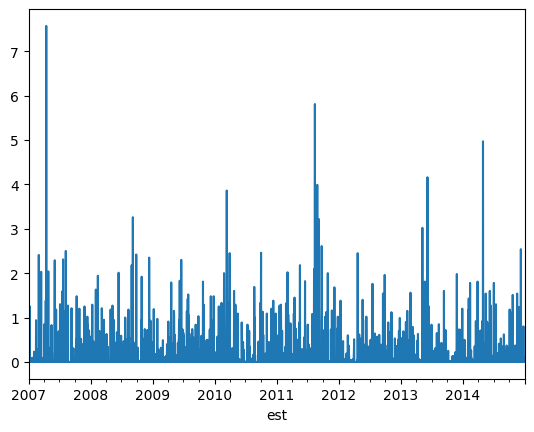

In [90]:
nyc_tweak(nyc).set_index('est').loc[:,'precipitationin'].plot();

## Stats and More

In [137]:
autos2.describe()

barrels08        city08        comb08     cylinders         displ  \
count  38219.000000  38219.000000  38219.000000  38075.000000  38077.000000   
mean      17.503193     18.017452     20.252911      5.733316      3.315151   
std        4.585308      6.975367      6.885158      1.753182      1.361727   
min        0.060000      6.000000      7.000000      2.000000      0.000000   
25%       14.330870     15.000000     17.000000      4.000000      2.200000   
50%       17.347895     17.000000     19.000000      6.000000      3.000000   
75%       20.600625     20.000000     23.000000      6.000000      4.300000   
max       47.087143    150.000000    136.000000     16.000000      8.400000   

          highway08         range          year        speeds  
count  38219.000000  38219.000000  38219.000000  38219.000000  
mean      24.119783      0.508883   2000.234674      4.769957  
std        7.124840      9.837331     10.478707      1.363492  
min        9.000000      0.000000   1984.000000      0.000000  
25%       20.000000      0.000000   1991.000000      4.000000  
50%       24.000000      0.000000   2001.000000      5.000000  
75%       27.000000      0.000000   2010.000000      6.000000  
max      122.000000    335.000000   2017.000000     10.000000

In [138]:
# to include non-numeric data (.T might help)
autos2.describe(include='all')

barrels08        city08        comb08     cylinders         displ  \
count   38219.000000  38219.000000  38219.000000  38075.000000  38077.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       17.503193     18.017452     20.252911      5.733316      3.315151   
std         4.585308      6.975367      6.885158      1.753182      1.361727   
min         0.060000      6.000000      7.000000      2.000000      0.000000   
25%        14.330870     15.000000     17.000000      4.000000      2.200000   
50%        17.347895     17.000000     19.000000      6.000000      3.000000   
75%        20.600625     20.000000     23.000000      6.000000      4.300000   
max        47.087143    150.000000    136.000000     16.000000      8.400000   

                    drive eng_dscr     highway08       make            model  \
count               37030    22723  38219.000000      38219            38219   
unique                  7      545           NaN        133             3765   
top     Front-Wheel Drive    (FFS)           NaN  Chevrolet  F150 Pickup 2WD   
freq                13417     8827           NaN       3814              210   
mean                  NaN      NaN     24.119783        NaN              NaN   
std                   NaN      NaN      7.124840        NaN              NaN   
min                   NaN      NaN      9.000000        NaN              NaN   
25%                   NaN      NaN     20.000000        NaN              NaN   
50%                   NaN      NaN     24.000000        NaN              NaN   
75%                   NaN      NaN     27.000000        NaN              NaN   
max                   NaN      NaN    122.000000        NaN              NaN   

               range            trany          year       v_class    ffs  \
count   38219.000000            38208  38219.000000         38219  38219   
unique           NaN               35           NaN            34      2   
top              NaN  Automatic 4-spd           NaN  Compact Cars  False   
freq             NaN            11042           NaN          5537  23862   
mean        0.508883              NaN   2000.234674           NaN    NaN   
std         9.837331              NaN     10.478707           NaN    NaN   
min         0.000000              NaN   1984.000000           NaN    NaN   
25%         0.000000              NaN   1991.000000           NaN    NaN   
50%         0.000000              NaN   2001.000000           NaN    NaN   
75%         0.000000              NaN   2010.000000           NaN    NaN   
max       335.000000              NaN   2017.000000           NaN    NaN   

              speeds variable_speeds                 created_on  
count   38219.000000           38219                      38219  
unique           NaN               2                        180  
top              NaN           False  2013-01-01 00:00:00-05:00  
freq             NaN           37498                      34199  
mean        4.769957             NaN                        NaN  
std         1.363492             NaN                        NaN  
min         0.000000             NaN                        NaN  
25%         4.000000             NaN                        NaN  
50%         5.000000             NaN                        NaN  
75%         6.000000             NaN                        NaN  
max        10.000000             NaN                        NaN

In [139]:
# Many aggregation functions (max, mean, median, min, mad, skew, kurtosis, autocorr,
#   nunique, sem, std, var)
# and properties (hasnans, is_monotonic, is_unique)
autos2.year.max()

2017

In [140]:
# quantiles
autos2.year.quantile(.8)

2011.0

In [141]:
# careful with return type
autos2.year.quantile([.2, .7])

0.2    1989.0
0.7    2008.0
Name: year, dtype: float64

In [142]:
# Correlate year with seconds
autos2.year.corr(autos2.city08)

0.15110802576256227

In [143]:
autos2.corr()

barrels08    city08    comb08  cylinders     displ  \
barrels08         1.000000 -0.743973 -0.802517   0.737983  0.788155   
city08           -0.743973  1.000000  0.988460  -0.702173 -0.734586   
comb08           -0.802517  0.988460  1.000000  -0.697860 -0.742827   
cylinders         0.737983 -0.702173 -0.697860   1.000000  0.903068   
displ             0.788155 -0.734586 -0.742827   0.903068  1.000000   
highway08        -0.849008  0.932937  0.972818  -0.650855 -0.713698   
range            -0.194934  0.578725  0.557620        NaN -0.012477   
year             -0.211691  0.151108  0.183523   0.094492  0.052141   
ffs               0.091027 -0.078699 -0.098975  -0.138053 -0.120082   
speeds           -0.047475 -0.134461 -0.079230   0.126097  0.052540   
variable_speeds  -0.172752  0.208455  0.189070  -0.088940 -0.078524   

                 highway08     range      year       ffs    speeds  \
barrels08        -0.849008 -0.194934 -0.211691  0.091027 -0.047475   
city08            0.932937  0.578725  0.151108 -0.078699 -0.134461   
comb08            0.972818  0.557620  0.183523 -0.098975 -0.079230   
cylinders        -0.650855       NaN  0.094492 -0.138053  0.126097   
displ            -0.713698 -0.012477  0.052141 -0.120082  0.052540   
highway08         1.000000  0.502009  0.235853 -0.130700  0.019813   
range             0.502009  1.000000  0.069041 -0.040126 -0.145017   
year              0.235853  0.069041  1.000000 -0.746399  0.513788   
ffs              -0.130700 -0.040126 -0.746399  1.000000 -0.336743   
speeds            0.019813 -0.145017  0.513788 -0.336743  1.000000   
variable_speeds   0.147941  0.012710  0.135833 -0.102395 -0.485100   

                 variable_speeds  
barrels08              -0.172752  
city08                  0.208455  
comb08                  0.189070  
cylinders              -0.088940  
displ                  -0.078524  
highway08               0.147941  
range                   0.012710  
year                    0.135833  
ffs                    -0.102395  
speeds                 -0.485100  
variable_speeds         1.000000

In [144]:
autos2.corr().style.background_gradient(cmap='RdBu', axis=1, vmin=-1, vmax=1)

In [145]:
# careful with gradient limits
autos2.corr().style.background_gradient(cmap='RdBu', axis=1)

## Stats Exercise

* Find the 99% quantile for temp. Are those valid?
* Find the 99% quantile for humidity. Are those valid?
* Does temp correlate with humidity?
* Does year correlate with temp?


## Plotting

Pandas has built-in integration with Matplotlib. Other libraries such as Seaborn also support plotting DataFrames and Series. This is not an in depth intro to Matplotlib, but their website and gallery are great for finding more information

<AxesSubplot: >

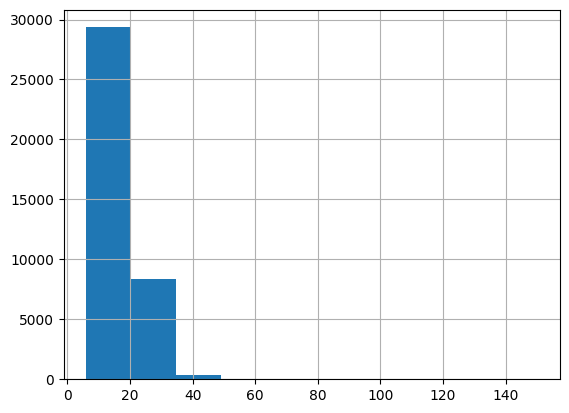

In [146]:
autos2.city08.hist()

<AxesSubplot: >

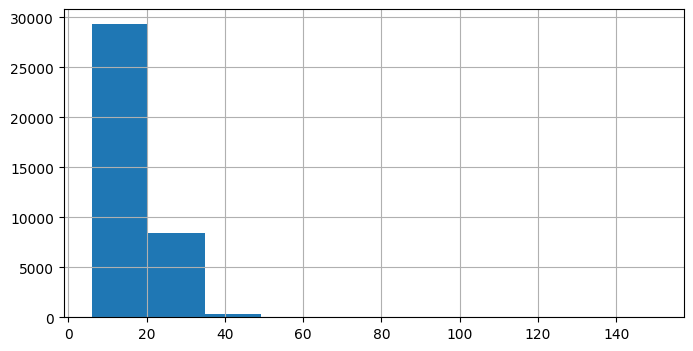

In [147]:
# add figsize=(width, height)
autos2.city08.hist(figsize=(8,4))

<AxesSubplot: >

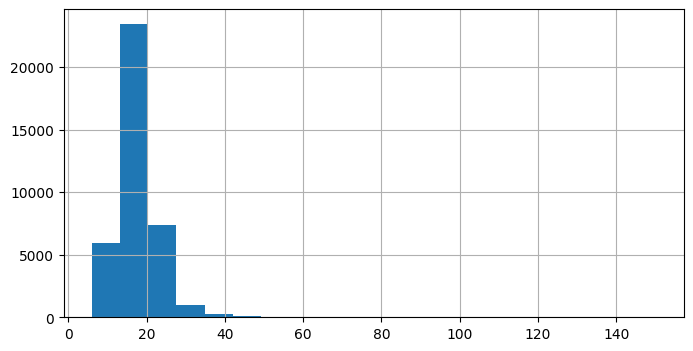

In [148]:
# change bins
autos2.city08.hist(figsize=(8,4), bins=20)

<AxesSubplot: >

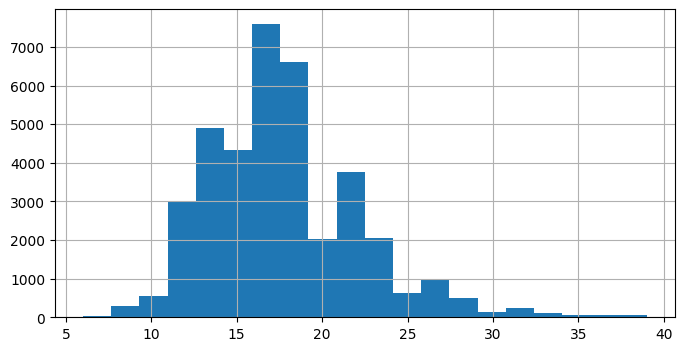

In [149]:
# add filter
(autos2
 [autos2.city08 < 40]
 .city08
 .hist(figsize=(8,4), bins=20)
)

<AxesSubplot: ylabel='Frequency'>

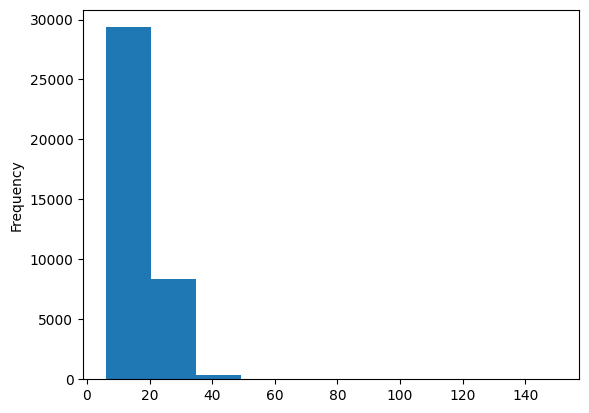

In [150]:
# note there is another way to do this (using .plot)
autos2.city08.plot.hist()

In [151]:
import seaborn as sns

In [152]:
import matplotlib.pyplot as plt

In [153]:
import scipy

<AxesSubplot: ylabel='Density'>

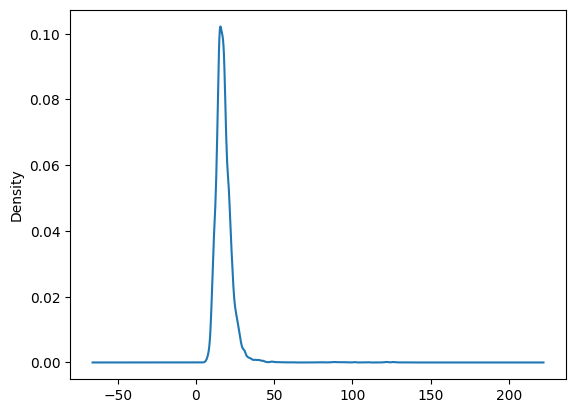

In [154]:
# kernel density estimation
autos2.city08.plot.kde()

<AxesSubplot: >

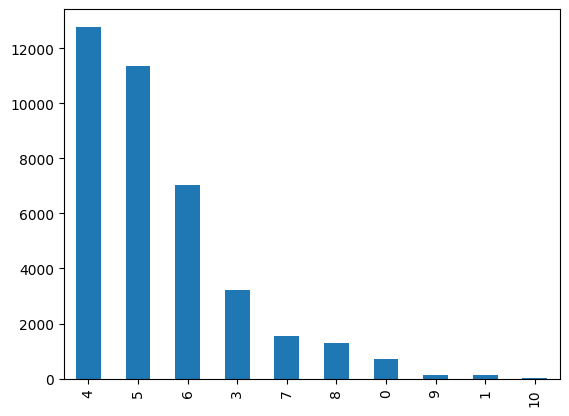

In [155]:
autos2.speeds.value_counts().plot.bar()

<AxesSubplot: >

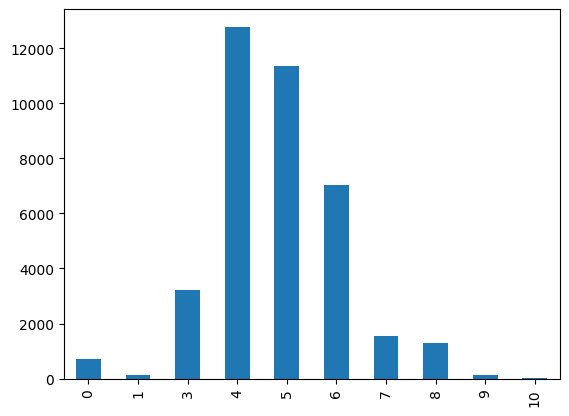

In [156]:
(autos2
 .speeds
 .value_counts()
 .sort_index()
 .plot.bar()
)

<AxesSubplot: >

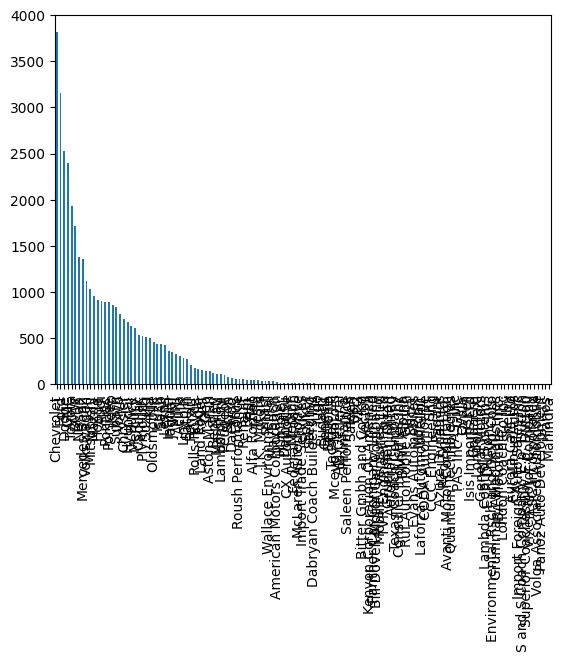

In [157]:
autos2.make.value_counts().plot.bar()

In [158]:
topn_makes = autos2.make.value_counts().index[:20]
(autos2
.make
.where(autos2.make.isin(topn_makes), 'other')
.value_counts()
)

other            9409
Chevrolet        3814
Ford             3155
Dodge            2531
GMC              2398
Toyota           1937
BMW              1716
Nissan           1375
Mercedes-Benz    1352
Volkswagen       1115
Mitsubishi       1031
Mazda             961
Honda             909
Audi              906
Pontiac           893
Porsche           888
Jeep              854
Subaru            836
Volvo             759
Chrysler          710
Hyundai           670
Name: make, dtype: int64

<AxesSubplot: >

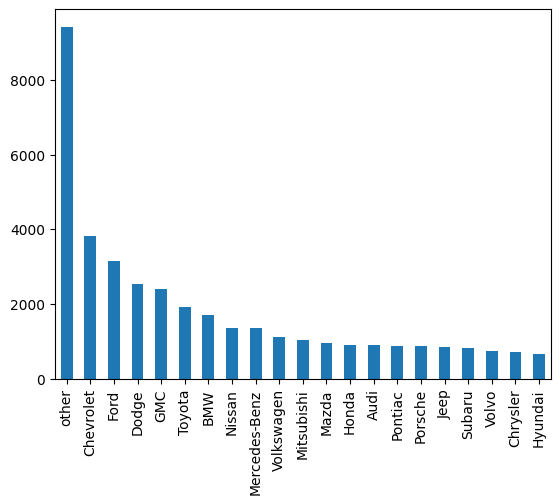

In [159]:
n = 20
topn_makes = autos2.make.value_counts().index[:n]
(autos2
    .make
    .where(autos2.make.isin(topn_makes), 'other')
    .value_counts()
    .plot.bar()
)

<AxesSubplot: >

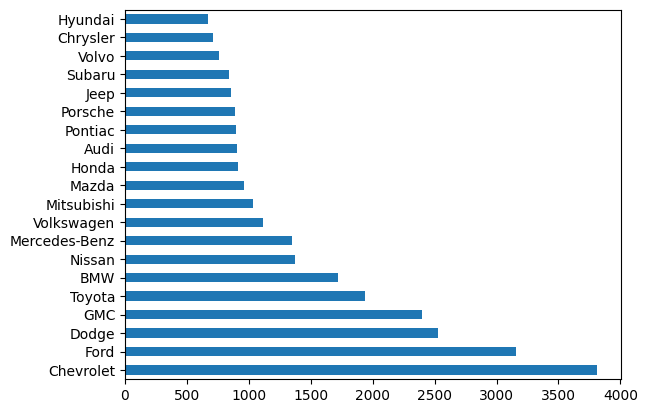

In [160]:
n = 20
topn_makes = autos2.make.value_counts().index[:n]
(autos2
    .make
    .where(autos2.make.isin(topn_makes), 'other')
    .value_counts()[1:]
    .plot.barh()
)

<AxesSubplot: ylabel='make'>

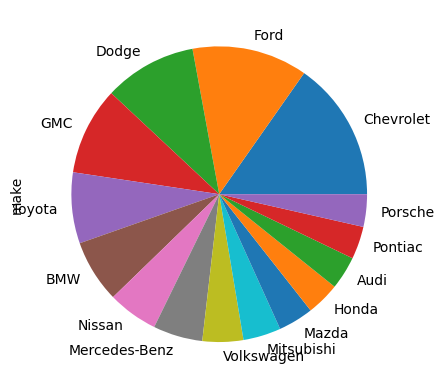

In [161]:
n = 15
topn_makes = autos2.make.value_counts().index[:n]
(autos2
    .make
    .where(autos2.make.isin(topn_makes), 'other')
    .value_counts()[1:]
    .plot.pie()
)

c:\users\knhoffm\.virtualenvs\python_for_engineer_science\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='highway08', ylabel='city08'>

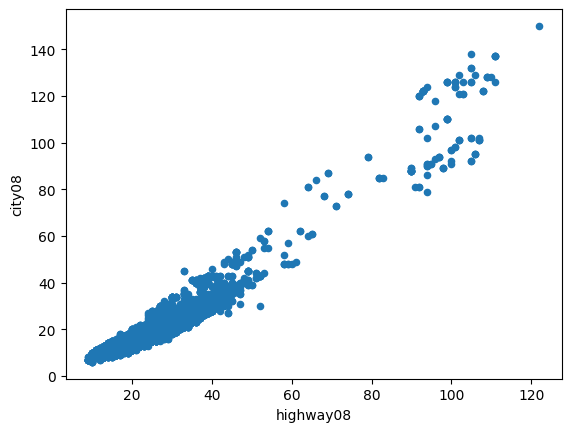

In [162]:
autos2.plot.scatter(x='highway08', y='city08')

<AxesSubplot: xlabel='highway08', ylabel='city08'>

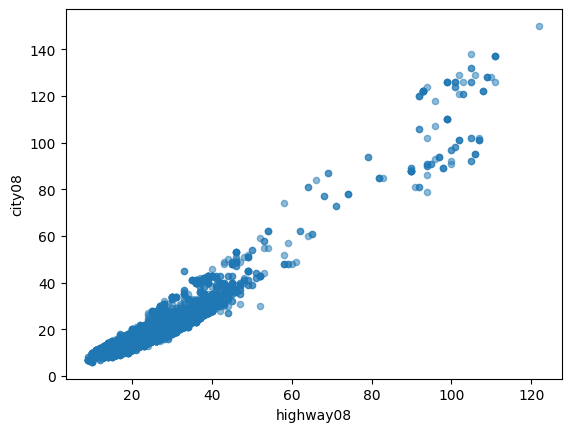

In [163]:
autos2.plot.scatter(x='highway08', y='city08', alpha=.5)

<AxesSubplot: xlabel='highway08', ylabel='city08'>

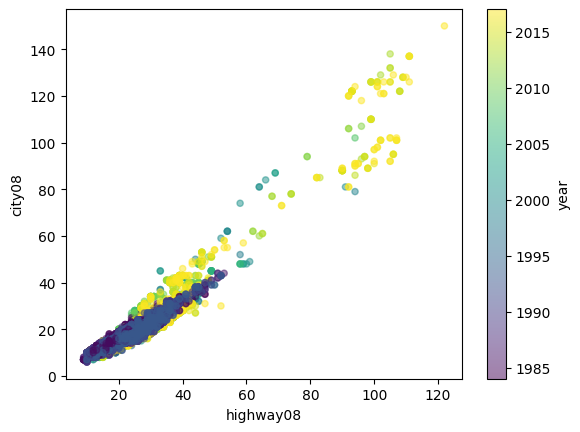

In [164]:
autos2.plot.scatter(x='highway08', y='city08', alpha=.5, c='year', cmap='viridis')

<AxesSubplot: xlabel='year', ylabel='city08'>

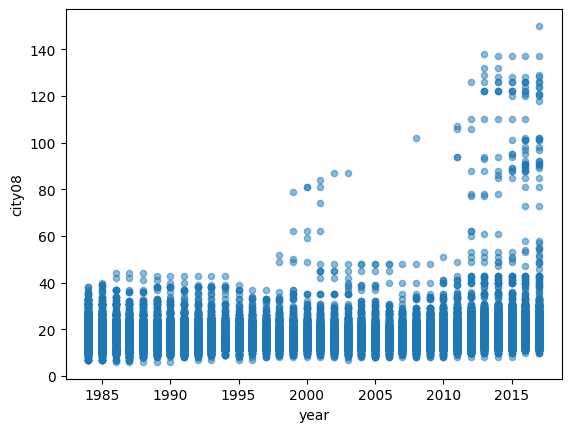

In [165]:
autos2.plot.scatter(x='year', y='city08', alpha=.5)

<AxesSubplot: xlabel='cylinders', ylabel='city08'>

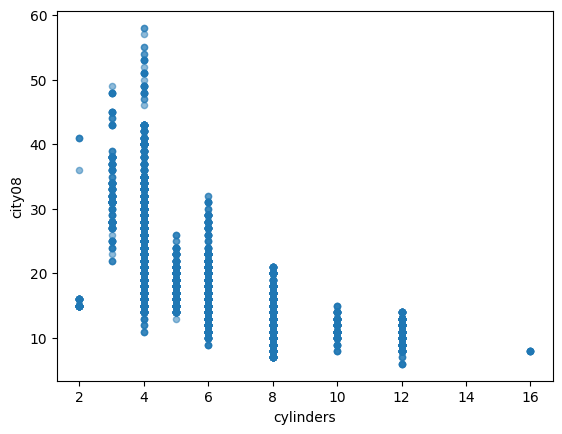

In [166]:
autos2.plot.scatter(x='cylinders', y='city08', alpha=0.5)

## Plotting Exercise

* Plot a histogram of temp
* Plot a histogram of humidity
* Plot a bar plot of count of events
* Plot a scatter plot of temp vs humidity
* Plot a scatter plot of year vs temp

In [92]:
nyc_tweak(nyc).columns

Index(['est', 'max_temperaturef', 'mean_temperaturef', 'min_temperaturef',
       'max_dew_pointf', 'meandew_pointf', 'min_dewpointf', 'max_humidity',
       'mean_humidity', 'min_humidity', 'max_sea_level_pressurein',
       'mean_sea_level_pressurein', 'min_sea_level_pressurein',
       'max_visibilitymiles', 'mean_visibilitymiles', 'min_visibilitymiles',
       'max_wind_speedmph', 'mean_wind_speedmph', 'max_gust_speedmph',
       'precipitationin', 'cloudcover', 'events', 'winddirdegrees',
       'mean_visibility_km'],
      dtype='object')

In [93]:
nyc2 = nyc_tweak(nyc)

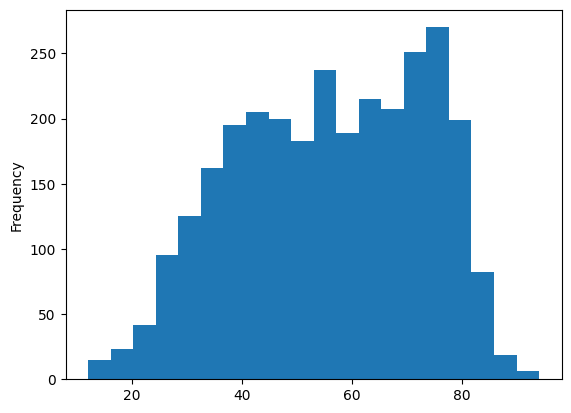

In [94]:
(nyc2
 .mean_temperaturef
 .plot
 .hist(bins=20)
);

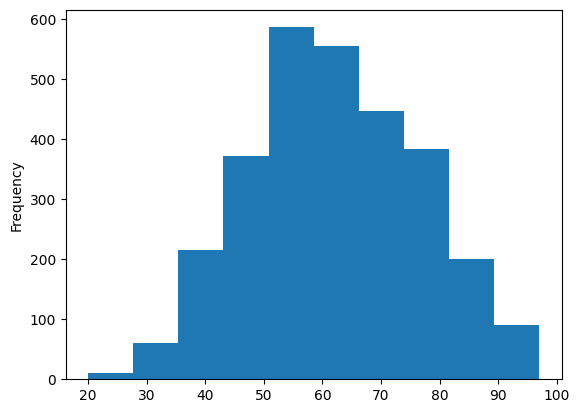

In [95]:
(nyc2
 .mean_humidity
 .plot
 .hist(bins=10)
);

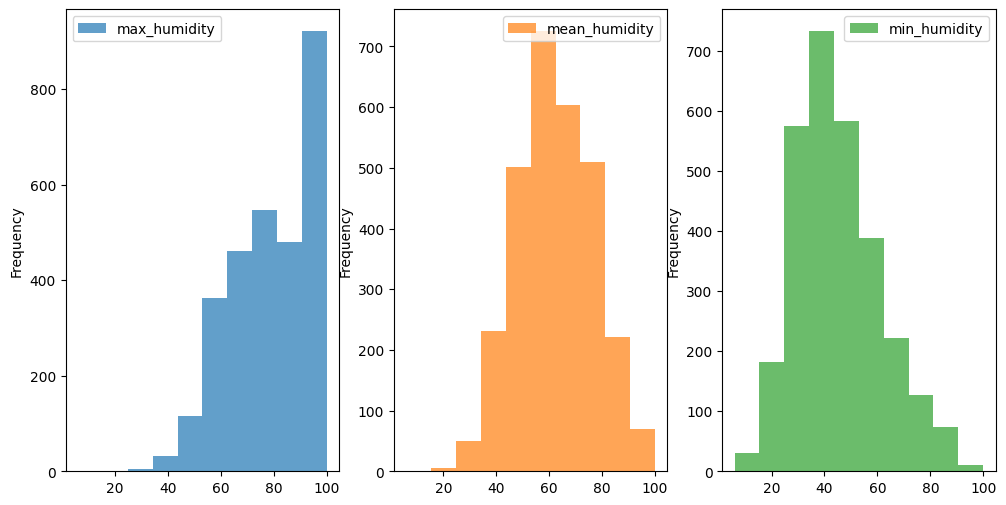

In [96]:
(nyc2
 .loc[:,'max_humidity':'min_humidity']
 .plot
 .hist(bins=10, alpha=0.7, subplots=True, layout=(1,3), figsize=(12,6))
);

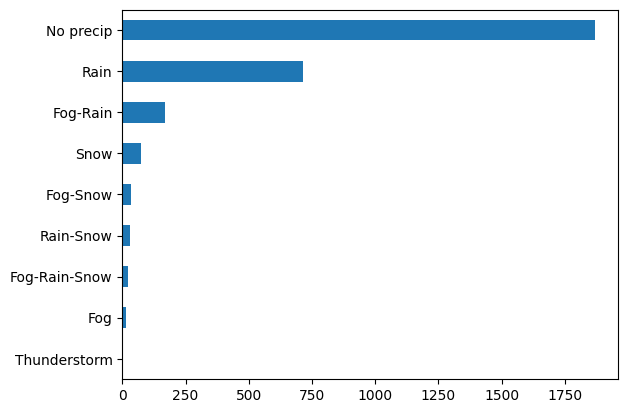

In [97]:
(nyc2
    .events
    .fillna('No precip')
    .value_counts(ascending=True, dropna=False)
    .plot
    .barh()
);

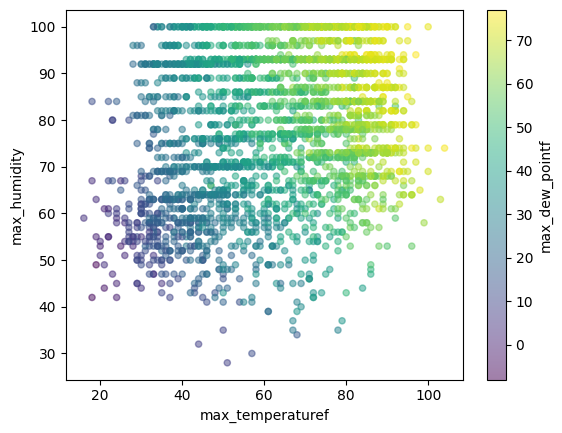

In [98]:
#Plot a scatter plot of temp vs humidity
(nyc2
    .plot
    .scatter(x='max_temperaturef', y='max_humidity', alpha=0.5, c='max_dew_pointf', cmap='viridis')
);

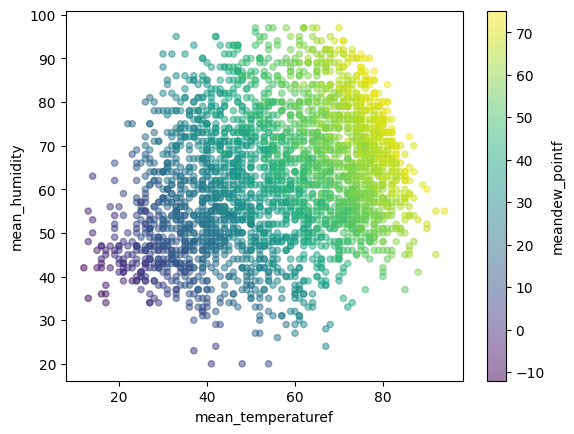

In [99]:
#Plot a scatter plot of temp vs humidity
(nyc2
    .plot
    .scatter(x='mean_temperaturef', y='mean_humidity', alpha=0.5, c='meandew_pointf', cmap='viridis')
);

c:\users\knhoffm\.virtualenvs\python_for_engineer_science\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


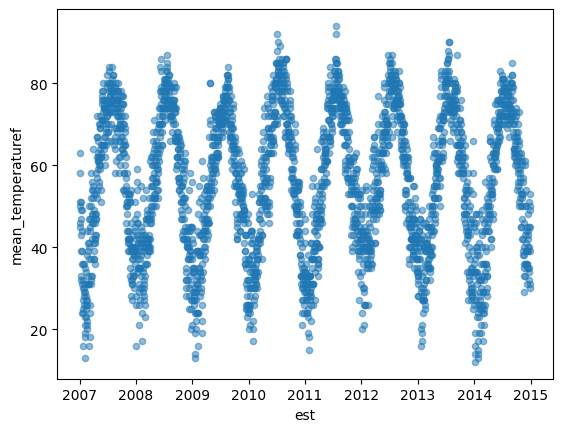

In [100]:
# Plot a scatter plot of year vs temp
(nyc2
    .plot
    .scatter(x='est', y='mean_temperaturef', alpha=0.5)
);

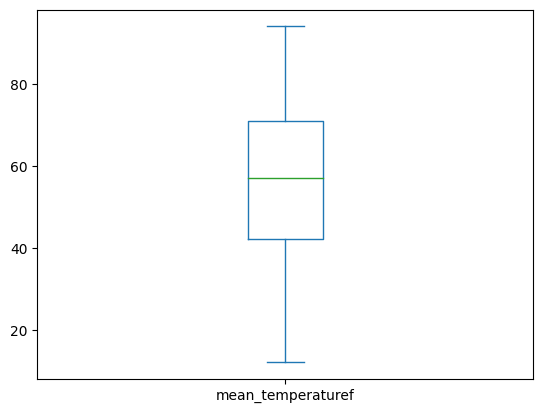

In [101]:
# Plot a scatter plot of year vs temp
(nyc2
    .assign(year = nyc2.est.dt.year)
    .plot
    .box(x='year', y='mean_temperaturef')
);

## Filtering

In [177]:
autos2.year > 2007

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
39071    False
39072    False
39073    False
39074    False
39075    False
39076    False
39077    False
39078    False
39079    False
39080    False
39081    False
39082    False
39083    False
39084    False
39085    False
39086    False
39087    False
39088    False
39089    False
39090    False
39091    False
39092    False
39093    False
39094    False
39095    False
39096    False
39097    False
39098    False
39099    False
39100    False
Name: year, Length: 38219, dtype: bool

In [178]:
autos2[autos2.year > 2007]

barrels08  city08  comb08  cylinders  displ  \
15387  13.184400      22      25        4.0    2.0   
15388  17.347895      17      19        6.0    3.2   
15389  16.480500      18      20        6.0    3.2   
15390  17.347895      16      19        8.0    4.2   
15391  17.347895      16      19        8.0    4.2   
15392  18.311667      15      18        8.0    4.2   
15393  18.311667      15      18        8.0    4.2   
15394  14.982273      19      22        4.0    2.4   
15398  14.982273      19      22        4.0    2.4   
15399  17.347895      16      19        6.0    3.8   
15400  17.347895      16      19        6.0    3.8   
15401  12.677308      23      26        4.0    2.0   
15402  17.347895      17      19        6.0    3.2   
15403  16.480500      18      20        6.0    3.2   
15404  14.330870      20      23        4.0    2.4   
15405  15.695714      18      21        6.0    2.7   
15406  17.347895      16      19        6.0    3.5   
15407  14.330870      20      23        4.0    2.4   
15409  14.982273      20      22        4.0    2.4   
15410  17.347895      16      19        6.0    3.8   
15411  16.480500      17      20        6.0    3.8   
15412  13.733750      21      24        4.0    2.4   
15413  14.330870      20      23        4.0    2.4   
15414  13.733750      21      24        4.0    2.0   
15415  18.311667      16      18        6.0    3.0   
15416  23.543571      11      14        8.0    6.2   
15417  13.733750      22      24        4.0    2.0   
15418  13.733750      21      24        4.0    2.0   
15420  15.695714      19      21        4.0    2.5   
15421  14.982273      20      22        4.0    2.5   
...          ...     ...     ...        ...    ...   
31388   0.282000      73      72        NaN    NaN   
31390  13.733750      21      24        6.0    3.0   
31391  14.330870      21      23        6.0    3.0   
31392  14.330870      21      23        6.0    3.0   
31393  14.330870      21      23        6.0    2.9   
31394  14.330870      21      23        6.0    2.9   
31395  15.695714      18      21        8.0    4.0   
31396  15.695714      18      21        8.0    4.0   
31441  19.388824      16      17        6.0    3.6   
31443   0.198000     101     102        NaN    NaN   
31451  11.771786      25      28        4.0    2.0   
31452  12.207778      24      27        4.0    2.0   
31454   5.563419      23      26        4.0    2.0   
31504  13.184400      22      25        4.0    2.0   
31505  19.109250      19      20        4.0    2.8   
31506  20.600625      14      16        6.0    3.7   
31507  20.600625      14      16        6.0    3.7   
31525  18.311667      16      18        6.0    3.0   
31526  16.616739      21      23        6.0    3.0   
31588  10.300313      28      32        4.0    1.5   
31589  10.300313      28      32        4.0    1.5   
31665  20.600625      13      16       12.0    6.0   
31804  14.982273      19      22        5.0    2.5   
31805  25.354615      11      13       12.0    6.0   
31806  23.543571      11      14       12.0    6.0   
31807   7.884889      28      30        4.0    2.0   
32055   0.180000     126     114        NaN    NaN   
32056   0.186000     124     108        NaN    NaN   
32268  16.616739      20      23        6.0    3.0   
32269  17.372045      19      22        6.0    3.0   

                            drive    eng_dscr  highway08  \
15387           Front-Wheel Drive         NaN         29   
15388  4-Wheel or All-Wheel Drive         NaN         24   
15389  4-Wheel or All-Wheel Drive         NaN         24   
15390            Rear-Wheel Drive         NaN         25   
15391            Rear-Wheel Drive         NaN         25   
15392            Rear-Wheel Drive         NaN         23   
15393            Rear-Wheel Drive         NaN         23   
15394           Front-Wheel Drive        SOHC         26   
15398           Front-Wheel Drive        SOHC         26   
15399           Front-Wheel Drive        SOHC         25  

In [179]:
# alternate syntax
autos2.query('year > 2007')

barrels08  city08  comb08  cylinders  displ  \
15387  13.184400      22      25        4.0    2.0   
15388  17.347895      17      19        6.0    3.2   
15389  16.480500      18      20        6.0    3.2   
15390  17.347895      16      19        8.0    4.2   
15391  17.347895      16      19        8.0    4.2   
15392  18.311667      15      18        8.0    4.2   
15393  18.311667      15      18        8.0    4.2   
15394  14.982273      19      22        4.0    2.4   
15398  14.982273      19      22        4.0    2.4   
15399  17.347895      16      19        6.0    3.8   
15400  17.347895      16      19        6.0    3.8   
15401  12.677308      23      26        4.0    2.0   
15402  17.347895      17      19        6.0    3.2   
15403  16.480500      18      20        6.0    3.2   
15404  14.330870      20      23        4.0    2.4   
15405  15.695714      18      21        6.0    2.7   
15406  17.347895      16      19        6.0    3.5   
15407  14.330870      20      23        4.0    2.4   
15409  14.982273      20      22        4.0    2.4   
15410  17.347895      16      19        6.0    3.8   
15411  16.480500      17      20        6.0    3.8   
15412  13.733750      21      24        4.0    2.4   
15413  14.330870      20      23        4.0    2.4   
15414  13.733750      21      24        4.0    2.0   
15415  18.311667      16      18        6.0    3.0   
15416  23.543571      11      14        8.0    6.2   
15417  13.733750      22      24        4.0    2.0   
15418  13.733750      21      24        4.0    2.0   
15420  15.695714      19      21        4.0    2.5   
15421  14.982273      20      22        4.0    2.5   
...          ...     ...     ...        ...    ...   
31388   0.282000      73      72        NaN    NaN   
31390  13.733750      21      24        6.0    3.0   
31391  14.330870      21      23        6.0    3.0   
31392  14.330870      21      23        6.0    3.0   
31393  14.330870      21      23        6.0    2.9   
31394  14.330870      21      23        6.0    2.9   
31395  15.695714      18      21        8.0    4.0   
31396  15.695714      18      21        8.0    4.0   
31441  19.388824      16      17        6.0    3.6   
31443   0.198000     101     102        NaN    NaN   
31451  11.771786      25      28        4.0    2.0   
31452  12.207778      24      27        4.0    2.0   
31454   5.563419      23      26        4.0    2.0   
31504  13.184400      22      25        4.0    2.0   
31505  19.109250      19      20        4.0    2.8   
31506  20.600625      14      16        6.0    3.7   
31507  20.600625      14      16        6.0    3.7   
31525  18.311667      16      18        6.0    3.0   
31526  16.616739      21      23        6.0    3.0   
31588  10.300313      28      32        4.0    1.5   
31589  10.300313      28      32        4.0    1.5   
31665  20.600625      13      16       12.0    6.0   
31804  14.982273      19      22        5.0    2.5   
31805  25.354615      11      13       12.0    6.0   
31806  23.543571      11      14       12.0    6.0   
31807   7.884889      28      30        4.0    2.0   
32055   0.180000     126     114        NaN    NaN   
32056   0.186000     124     108        NaN    NaN   
32268  16.616739      20      23        6.0    3.0   
32269  17.372045      19      22        6.0    3.0   

                            drive    eng_dscr  highway08  \
15387           Front-Wheel Drive         NaN         29   
15388  4-Wheel or All-Wheel Drive         NaN         24   
15389  4-Wheel or All-Wheel Drive         NaN         24   
15390            Rear-Wheel Drive         NaN         25   
15391            Rear-Wheel Drive         NaN         25   
15392            Rear-Wheel Drive         NaN         23   
15393            Rear-Wheel Drive         NaN         23   
15394           Front-Wheel Drive        SOHC         26   
15398           Front-Wheel Drive        SOHC         26   
15399           Front-Wheel Drive        SOHC         25  

In [180]:
# autos2[autos2.year > 2007 & autos2.year < 2009]

In [181]:
autos2[(autos2.year > 2007) & (autos2.year < 2009)]

barrels08  city08  comb08  cylinders  displ  \
15387  13.184400      22      25        4.0    2.0   
15388  17.347895      17      19        6.0    3.2   
15389  16.480500      18      20        6.0    3.2   
15390  17.347895      16      19        8.0    4.2   
15391  17.347895      16      19        8.0    4.2   
15392  18.311667      15      18        8.0    4.2   
15393  18.311667      15      18        8.0    4.2   
15394  14.982273      19      22        4.0    2.4   
15398  14.982273      19      22        4.0    2.4   
15399  17.347895      16      19        6.0    3.8   
15400  17.347895      16      19        6.0    3.8   
15401  12.677308      23      26        4.0    2.0   
15402  17.347895      17      19        6.0    3.2   
15403  16.480500      18      20        6.0    3.2   
15404  14.330870      20      23        4.0    2.4   
15405  15.695714      18      21        6.0    2.7   
15406  17.347895      16      19        6.0    3.5   
15407  14.330870      20      23        4.0    2.4   
15409  14.982273      20      22        4.0    2.4   
15410  17.347895      16      19        6.0    3.8   
15411  16.480500      17      20        6.0    3.8   
15412  13.733750      21      24        4.0    2.4   
15413  14.330870      20      23        4.0    2.4   
15414  13.733750      21      24        4.0    2.0   
15415  18.311667      16      18        6.0    3.0   
15416  23.543571      11      14        8.0    6.2   
15417  13.733750      22      24        4.0    2.0   
15418  13.733750      21      24        4.0    2.0   
15420  15.695714      19      21        4.0    2.5   
15421  14.982273      20      22        4.0    2.5   
...          ...     ...     ...        ...    ...   
16675  12.207778      24      27        4.0    1.8   
16676  12.207778      24      27        4.0    1.8   
16677  12.207778      24      27        4.0    1.8   
16679  16.480500      17      20        6.0    3.6   
16680  17.347895      17      19        6.0    3.5   
16681  17.347895      16      19        6.0    3.5   
16682  25.354615      11      13        8.0    5.4   
16683  25.354615      11      13        8.0    5.4   
16684  25.354615      11      13        8.0    5.4   
16685  25.354615      11      13        8.0    5.4   
16686  25.354615      11      13        8.0    5.4   
16687  25.354615      11      13        8.0    5.4   
16691  20.600625      14      16        8.0    4.0   
16692  20.600625      13      16        8.0    4.0   
16693  20.600625      14      16        8.0    4.0   
16694  13.184400      22      25        4.0    2.0   
16695  11.365862      25      29        4.0    2.2   
16696  11.365862      25      29        4.0    2.2   
16697  20.600625      14      16        8.0    4.0   
16698  21.974000      12      15        8.0    6.2   
16700  18.311667      15      18        6.0    2.8   
16701  17.347895      16      19        6.0    2.8   
16702  13.184400      22      25        4.0    2.4   
16703  18.311667      15      18        6.0    2.8   
16704  17.347895      16      19        6.0    2.8   
16705  25.354615      11      13        8.0    5.4   
16706  19.388824      15      17        6.0    3.0   
16707  21.974000      13      15        8.0    4.4   
21519  14.982273      19      22        4.0    2.4   
23034   0.204000     102      98        NaN    NaN   

                            drive                  eng_dscr  highway08  \
15387           Front-Wheel Drive                       NaN         29   
15388  4-Wheel or All-Wheel Drive                       NaN         24   
15389  4-Wheel or All-Wheel Drive                       NaN         24   
15390            Rear-Wheel Drive                       NaN         25   
15391            Rear-Wheel Drive                       NaN         25   
15392            Rear-Wheel Drive                       NaN         23   
15393            Rear-Wheel Drive                       NaN         23   
15394           Front-Wheel Drive                      SOHC       

In [182]:
# can combine & (and), | (or), and ~ (not)
camry = autos2.model.str.contains('Camry')
y09 = autos2.year == 2009

In [183]:
autos2[camry | y09]

barrels08  city08  comb08  cylinders  displ  \
103    15.695714      18      21        4.0    2.2   
104    14.982273      19      22        4.0    2.2   
105    17.347895      16      19        6.0    3.0   
106    18.311667      16      18        6.0    3.0   
227    15.695714      18      21        4.0    2.2   
228    17.347895      16      19        6.0    3.0   
1171   15.695714      18      21        4.0    2.2   
1172   14.330870      20      23        4.0    2.2   
1173   17.347895      16      19        6.0    3.0   
1287   15.695714      18      21        4.0    2.2   
1288   18.311667      16      18        6.0    3.0   
2227   15.695714      19      21        4.0    2.2   
2228   14.330870      20      23        4.0    2.2   
2229   15.695714      18      21        6.0    3.0   
2364   15.695714      19      21        4.0    2.2   
2365   15.695714      18      21        6.0    3.0   
3176   15.695714      18      21        4.0    2.2   
3177   14.330870      20      23        4.0    2.2   
3178   15.695714      18      21        6.0    3.0   
3269   15.695714      18      21        4.0    2.2   
3270   15.695714      18      21        6.0    3.0   
4007   14.330870      20      23        4.0    2.2   
4008   14.330870      20      23        4.0    2.2   
4009   17.347895      17      19        6.0    3.0   
4010   15.695714      18      21        6.0    3.0   
4844   14.330870      20      23        4.0    2.2   
4846   13.733750      21      24        4.0    2.2   
4847   16.480500      17      20        6.0    3.0   
4848   15.695714      18      21        6.0    3.0   
5597   14.330870      20      23        4.0    2.2   
...          ...     ...     ...        ...    ...   
34254  15.695714      19      21        4.0    2.0   
34255  17.347895      17      19        6.0    2.5   
34256  17.347895      17      19        6.0    2.5   
34496  13.733750      21      24        4.0    2.0   
34497  13.184400      23      25        4.0    2.0   
34498  17.347895      17      19        6.0    2.5   
35504  13.733750      22      24        4.0    2.0   
35505  16.480500      19      20        4.0    2.0   
35506  13.733750      21      24        4.0    2.0   
35507  15.695714      19      21        4.0    2.0   
35508  12.677308      23      26        4.0    2.0   
35509  17.347895      17      19        6.0    2.5   
35510  17.347895      17      19        6.0    2.5   
35699  13.733750      22      24        4.0    2.0   
35700  17.347895      17      19        6.0    2.5   
36753  13.733750      21      24        4.0    2.0   
36754  16.480500      19      20        4.0    2.0   
36755  13.733750      21      24        4.0    2.0   
36756  12.677308      23      26        4.0    2.0   
36758  17.347895      16      19        6.0    2.5   
36759  17.347895      17      19        6.0    2.5   
36953  13.733750      21      24        4.0    2.0   
36954  17.347895      16      19        6.0    2.5   
38072  15.695714      18      21        4.0    2.2   
38073  14.982273      19      22        4.0    2.2   
38074  14.982273      19      22        4.0    2.2   
38075  17.347895      16      19        6.0    3.0   
38076  17.347895      17      19        6.0    3.0   
38188  15.695714      18      21        4.0    2.2   
38189  17.347895      16      19        6.0    3.0   

                            drive          eng_dscr  highway08    make  \
103             Front-Wheel Drive             (FFS)         26  Toyota   
104             Front-Wheel Drive             (FFS)         27  Toyota   
105             Front-Wheel Drive             (FFS)         22  Toyota   
106             Front-Wheel Drive             (FFS)         22  Toyota   
227             Front-Wheel Drive             (FFS)         26  Toyota   
228             Front-Wheel Drive             (FFS)         22  Toyota   
1171            Front-Wheel Drive             (FFS)         26  Toyota   
1172            Front-Wheel Drive             (FFS)         27  To

In [184]:
autos2[camry & y09]

barrels08  city08  comb08  cylinders  displ              drive  \
16794  14.330870      19      23        6.0    3.5  Front-Wheel Drive   
16795  13.184400      21      25        4.0    2.4  Front-Wheel Drive   
16796  13.184400      21      25        4.0    2.4  Front-Wheel Drive   
16797   9.694412      33      34        4.0    2.4  Front-Wheel Drive   

      eng_dscr  highway08    make         model  range  \
16794      NaN         28  Toyota         Camry      0   
16795      NaN         31  Toyota         Camry      0   
16796      NaN         31  Toyota         Camry      0   
16797      HEV         34  Toyota  Camry Hybrid      0   

                                  trany  year       v_class    ffs  speeds  \
16794                    Automatic (S6)  2009  Midsize Cars  False       6   
16795                   Automatic 5-spd  2009  Midsize Cars  False       5   
16796                      Manual 5-spd  2009  Midsize Cars  False       5   
16797  Automatic (variable gear ratios)  2009  Midsize Cars  False       0   

       variable_speeds                 created_on  
16794            False  2013-01-01 00:00:00-05:00  
16795            False  2013-01-01 00:00:00-05:00  
16796            False  2013-01-01 00:00:00-05:00  
16797             True  2013-01-01 00:00:00-05:00

In [185]:
autos2[camry & ~y09]

barrels08  city08  comb08  cylinders  displ  \
103    15.695714      18      21        4.0    2.2   
104    14.982273      19      22        4.0    2.2   
105    17.347895      16      19        6.0    3.0   
106    18.311667      16      18        6.0    3.0   
227    15.695714      18      21        4.0    2.2   
228    17.347895      16      19        6.0    3.0   
1171   15.695714      18      21        4.0    2.2   
1172   14.330870      20      23        4.0    2.2   
1173   17.347895      16      19        6.0    3.0   
1287   15.695714      18      21        4.0    2.2   
1288   18.311667      16      18        6.0    3.0   
2227   15.695714      19      21        4.0    2.2   
2228   14.330870      20      23        4.0    2.2   
2229   15.695714      18      21        6.0    3.0   
2364   15.695714      19      21        4.0    2.2   
2365   15.695714      18      21        6.0    3.0   
3176   15.695714      18      21        4.0    2.2   
3177   14.330870      20      23        4.0    2.2   
3178   15.695714      18      21        6.0    3.0   
3269   15.695714      18      21        4.0    2.2   
3270   15.695714      18      21        6.0    3.0   
4007   14.330870      20      23        4.0    2.2   
4008   14.330870      20      23        4.0    2.2   
4009   17.347895      17      19        6.0    3.0   
4010   15.695714      18      21        6.0    3.0   
4844   14.330870      20      23        4.0    2.2   
4846   13.733750      21      24        4.0    2.2   
4847   16.480500      17      20        6.0    3.0   
4848   15.695714      18      21        6.0    3.0   
5597   14.330870      20      23        4.0    2.2   
...          ...     ...     ...        ...    ...   
34254  15.695714      19      21        4.0    2.0   
34255  17.347895      17      19        6.0    2.5   
34256  17.347895      17      19        6.0    2.5   
34496  13.733750      21      24        4.0    2.0   
34497  13.184400      23      25        4.0    2.0   
34498  17.347895      17      19        6.0    2.5   
35504  13.733750      22      24        4.0    2.0   
35505  16.480500      19      20        4.0    2.0   
35506  13.733750      21      24        4.0    2.0   
35507  15.695714      19      21        4.0    2.0   
35508  12.677308      23      26        4.0    2.0   
35509  17.347895      17      19        6.0    2.5   
35510  17.347895      17      19        6.0    2.5   
35699  13.733750      22      24        4.0    2.0   
35700  17.347895      17      19        6.0    2.5   
36753  13.733750      21      24        4.0    2.0   
36754  16.480500      19      20        4.0    2.0   
36755  13.733750      21      24        4.0    2.0   
36756  12.677308      23      26        4.0    2.0   
36758  17.347895      16      19        6.0    2.5   
36759  17.347895      17      19        6.0    2.5   
36953  13.733750      21      24        4.0    2.0   
36954  17.347895      16      19        6.0    2.5   
38072  15.695714      18      21        4.0    2.2   
38073  14.982273      19      22        4.0    2.2   
38074  14.982273      19      22        4.0    2.2   
38075  17.347895      16      19        6.0    3.0   
38076  17.347895      17      19        6.0    3.0   
38188  15.695714      18      21        4.0    2.2   
38189  17.347895      16      19        6.0    3.0   

                            drive          eng_dscr  highway08    make  \
103             Front-Wheel Drive             (FFS)         26  Toyota   
104             Front-Wheel Drive             (FFS)         27  Toyota   
105             Front-Wheel Drive             (FFS)         22  Toyota   
106             Front-Wheel Drive             (FFS)         22  Toyota   
227             Front-Wheel Drive             (FFS)         26  Toyota   
228             Front-Wheel Drive             (FFS)         22  Toyota   
1171            Front-Wheel Drive             (FFS)         26  Toyota   
1172            Front-Wheel Drive             (FFS)         27  To

In [186]:
# this didn't work in prior versions of pandas
autos2.query('model.str.contains("Camry") and not year == 2009')

barrels08  city08  comb08  cylinders  displ  \
103    15.695714      18      21        4.0    2.2   
104    14.982273      19      22        4.0    2.2   
105    17.347895      16      19        6.0    3.0   
106    18.311667      16      18        6.0    3.0   
227    15.695714      18      21        4.0    2.2   
228    17.347895      16      19        6.0    3.0   
1171   15.695714      18      21        4.0    2.2   
1172   14.330870      20      23        4.0    2.2   
1173   17.347895      16      19        6.0    3.0   
1287   15.695714      18      21        4.0    2.2   
1288   18.311667      16      18        6.0    3.0   
2227   15.695714      19      21        4.0    2.2   
2228   14.330870      20      23        4.0    2.2   
2229   15.695714      18      21        6.0    3.0   
2364   15.695714      19      21        4.0    2.2   
2365   15.695714      18      21        6.0    3.0   
3176   15.695714      18      21        4.0    2.2   
3177   14.330870      20      23        4.0    2.2   
3178   15.695714      18      21        6.0    3.0   
3269   15.695714      18      21        4.0    2.2   
3270   15.695714      18      21        6.0    3.0   
4007   14.330870      20      23        4.0    2.2   
4008   14.330870      20      23        4.0    2.2   
4009   17.347895      17      19        6.0    3.0   
4010   15.695714      18      21        6.0    3.0   
4844   14.330870      20      23        4.0    2.2   
4846   13.733750      21      24        4.0    2.2   
4847   16.480500      17      20        6.0    3.0   
4848   15.695714      18      21        6.0    3.0   
5597   14.330870      20      23        4.0    2.2   
...          ...     ...     ...        ...    ...   
34254  15.695714      19      21        4.0    2.0   
34255  17.347895      17      19        6.0    2.5   
34256  17.347895      17      19        6.0    2.5   
34496  13.733750      21      24        4.0    2.0   
34497  13.184400      23      25        4.0    2.0   
34498  17.347895      17      19        6.0    2.5   
35504  13.733750      22      24        4.0    2.0   
35505  16.480500      19      20        4.0    2.0   
35506  13.733750      21      24        4.0    2.0   
35507  15.695714      19      21        4.0    2.0   
35508  12.677308      23      26        4.0    2.0   
35509  17.347895      17      19        6.0    2.5   
35510  17.347895      17      19        6.0    2.5   
35699  13.733750      22      24        4.0    2.0   
35700  17.347895      17      19        6.0    2.5   
36753  13.733750      21      24        4.0    2.0   
36754  16.480500      19      20        4.0    2.0   
36755  13.733750      21      24        4.0    2.0   
36756  12.677308      23      26        4.0    2.0   
36758  17.347895      16      19        6.0    2.5   
36759  17.347895      17      19        6.0    2.5   
36953  13.733750      21      24        4.0    2.0   
36954  17.347895      16      19        6.0    2.5   
38072  15.695714      18      21        4.0    2.2   
38073  14.982273      19      22        4.0    2.2   
38074  14.982273      19      22        4.0    2.2   
38075  17.347895      16      19        6.0    3.0   
38076  17.347895      17      19        6.0    3.0   
38188  15.695714      18      21        4.0    2.2   
38189  17.347895      16      19        6.0    3.0   

                            drive          eng_dscr  highway08    make  \
103             Front-Wheel Drive             (FFS)         26  Toyota   
104             Front-Wheel Drive             (FFS)         27  Toyota   
105             Front-Wheel Drive             (FFS)         22  Toyota   
106             Front-Wheel Drive             (FFS)         22  Toyota   
227             Front-Wheel Drive             (FFS)         26  Toyota   
228             Front-Wheel Drive             (FFS)         22  Toyota   
1171            Front-Wheel Drive             (FFS)         26  Toyota   
1172            Front-Wheel Drive             (FFS)         27  To

In [187]:
autos2.query('model == "Camry" and not year == 2009')

barrels08  city08  comb08  cylinders  displ  \
103    15.695714      18      21        4.0    2.2   
104    14.982273      19      22        4.0    2.2   
105    17.347895      16      19        6.0    3.0   
106    18.311667      16      18        6.0    3.0   
1171   15.695714      18      21        4.0    2.2   
1172   14.330870      20      23        4.0    2.2   
1173   17.347895      16      19        6.0    3.0   
2227   15.695714      19      21        4.0    2.2   
2228   14.330870      20      23        4.0    2.2   
2229   15.695714      18      21        6.0    3.0   
3176   15.695714      18      21        4.0    2.2   
3177   14.330870      20      23        4.0    2.2   
3178   15.695714      18      21        6.0    3.0   
4007   14.330870      20      23        4.0    2.2   
4008   14.330870      20      23        4.0    2.2   
4009   17.347895      17      19        6.0    3.0   
4010   15.695714      18      21        6.0    3.0   
4844   14.330870      20      23        4.0    2.2   
4846   13.733750      21      24        4.0    2.2   
4847   16.480500      17      20        6.0    3.0   
4848   15.695714      18      21        6.0    3.0   
5729   14.330870      20      23        4.0    2.2   
5730   13.733750      21      24        4.0    2.2   
5731   16.480500      17      20        6.0    3.0   
5732   15.695714      18      21        6.0    3.0   
6627   14.330870      20      23        4.0    2.2   
6628   13.733750      21      24        4.0    2.2   
6629   16.480500      17      20        6.0    3.0   
6630   15.695714      18      21        6.0    3.0   
7587   13.733750      20      24        4.0    2.2   
...          ...     ...     ...        ...    ...   
33005  13.184400      22      25        4.0    2.0   
33006  15.695714      19      21        4.0    2.0   
33007  13.184400      23      25        4.0    2.0   
33008  17.347895      17      19        6.0    2.5   
33009  17.347895      17      19        6.0    2.5   
34250  15.695714      19      21        4.0    2.0   
34251  13.733750      21      24        4.0    2.0   
34252  13.184400      23      25        4.0    2.0   
34253  13.184400      23      25        4.0    2.0   
34254  15.695714      19      21        4.0    2.0   
34255  17.347895      17      19        6.0    2.5   
34256  17.347895      17      19        6.0    2.5   
35504  13.733750      22      24        4.0    2.0   
35505  16.480500      19      20        4.0    2.0   
35506  13.733750      21      24        4.0    2.0   
35507  15.695714      19      21        4.0    2.0   
35508  12.677308      23      26        4.0    2.0   
35509  17.347895      17      19        6.0    2.5   
35510  17.347895      17      19        6.0    2.5   
36753  13.733750      21      24        4.0    2.0   
36754  16.480500      19      20        4.0    2.0   
36755  13.733750      21      24        4.0    2.0   
36756  12.677308      23      26        4.0    2.0   
36758  17.347895      16      19        6.0    2.5   
36759  17.347895      17      19        6.0    2.5   
38072  15.695714      18      21        4.0    2.2   
38073  14.982273      19      22        4.0    2.2   
38074  14.982273      19      22        4.0    2.2   
38075  17.347895      16      19        6.0    3.0   
38076  17.347895      17      19        6.0    3.0   

                            drive          eng_dscr  highway08    make  model  \
103             Front-Wheel Drive             (FFS)         26  Toyota  Camry   
104             Front-Wheel Drive             (FFS)         27  Toyota  Camry   
105             Front-Wheel Drive             (FFS)         22  Toyota  Camry   
106             Front-Wheel Drive             (FFS)         22  Toyota  Camry   
1171            Front-Wheel Drive             (FFS)         26  Toyota  Camry   
1172            Front-Wheel Drive             (FFS)         27  Toyota  Camry   
1173            Front-Wheel Drive             (FFS)         23  Toyota  Camry   
2227      

In [188]:
# .loc lets use filter by value
autos2.loc[[1,2,3], ['make', 'model']]

make                model
1  Ferrari           Testarossa
2    Dodge              Charger
3    Dodge  B150/B250 Wagon 2WD

In [189]:
# .loc w/ slices (closed interval)
autos2.loc[1:3, 'make':'model']

make                model
1  Ferrari           Testarossa
2    Dodge              Charger
3    Dodge  B150/B250 Wagon 2WD

In [190]:
# .loc is based on name, not index position 
# pull out single column
autos2.set_index('make').loc['Dodge', 'model']

make
Dodge                 Charger
Dodge     B150/B250 Wagon 2WD
Dodge     B150/B250 Wagon 2WD
Dodge     B150/B250 Wagon 2WD
Dodge     B150/B250 Wagon 2WD
Dodge     B150/B250 Wagon 2WD
Dodge                 Dynasty
Dodge                 Dynasty
Dodge                 Dynasty
Dodge                  Spirit
Dodge                  Spirit
Dodge                  Spirit
Dodge                  Spirit
Dodge                  Spirit
Dodge          B350 Wagon 2WD
Dodge          B350 Wagon 2WD
Dodge          B350 Wagon 2WD
Dodge                 Charger
Dodge                Intrepid
Dodge                Intrepid
Dodge                 Charger
Dodge       Ram 50 Pickup 2WD
Dodge       Ram 50 Pickup 2WD
Dodge       Dakota Pickup 2WD
Dodge       Dakota Pickup 2WD
Dodge       Dakota Pickup 2WD
Dodge       Dakota Pickup 2WD
Dodge    D100/D150 Pickup 2WD
Dodge    D100/D150 Pickup 2WD
Dodge    D100/D150 Pickup 2WD
                 ...         
Dodge                 Charger
Dodge                    Colt
Dodge

In [191]:
# .loc is based on name, not index position
# as a dataframe
autos2.set_index('make').loc['Dodge', ['model']]

model
make                       
Dodge               Charger
Dodge   B150/B250 Wagon 2WD
Dodge   B150/B250 Wagon 2WD
Dodge   B150/B250 Wagon 2WD
Dodge   B150/B250 Wagon 2WD
Dodge   B150/B250 Wagon 2WD
Dodge               Dynasty
Dodge               Dynasty
Dodge               Dynasty
Dodge                Spirit
Dodge                Spirit
Dodge                Spirit
Dodge                Spirit
Dodge                Spirit
Dodge        B350 Wagon 2WD
Dodge        B350 Wagon 2WD
Dodge        B350 Wagon 2WD
Dodge               Charger
Dodge              Intrepid
Dodge              Intrepid
Dodge               Charger
Dodge     Ram 50 Pickup 2WD
Dodge     Ram 50 Pickup 2WD
Dodge     Dakota Pickup 2WD
Dodge     Dakota Pickup 2WD
Dodge     Dakota Pickup 2WD
Dodge     Dakota Pickup 2WD
Dodge  D100/D150 Pickup 2WD
Dodge  D100/D150 Pickup 2WD
Dodge  D100/D150 Pickup 2WD
...                     ...
Dodge               Charger
Dodge                  Colt
Dodge                  Colt
Dodge                  Colt
Dodge                  Colt
Dodge               Daytona
Dodge               Daytona
Dodge               Daytona
Dodge               Daytona
Dodge               Daytona
Dodge    Shadow Convertible
Dodge    Shadow Convertible
Dodge    Shadow Convertible
Dodge    Shadow Convertible
Dodge               Stealth
Dodge               Stealth
Dodge               Stealth
Dodge               Stealth
Dodge               Stealth
Dodge               Charger
Dodge               Charger
Dodge                Shadow
Dodge                Shadow
Dodge                Shadow
Dodge                Shadow
Dodge                Shadow
Dodge                Shadow
Dodge   B150/B250 Wagon 2WD
Dodge   B150/B250 Wagon 2WD
Dodge   B150/B250 Wagon 2WD

[2531 rows x 1 columns]

In [192]:
# .loc is based on name, not index position
# pull out Row
autos2.loc[10]

barrels08                          12.677308
city08                                    23
comb08                                    26
cylinders                                4.0
displ                                    1.8
drive                      Front-Wheel Drive
eng_dscr                               (FFS)
highway08                                 30
make                                  Toyota
model                                Corolla
range                                      0
trany                           Manual 5-spd
year                                    1993
v_class                         Compact Cars
ffs                                     True
speeds                                     5
variable_speeds                        False
created_on         2013-01-01 00:00:00-05:00
Name: 10, dtype: object

In [193]:
# Can also use .iloc to index on location (half-open interval)
autos2.iloc[[0,1], [1, -1]]

city08                 created_on
0      19  2013-01-01 00:00:00-05:00
1       9  2013-01-01 00:00:00-05:00

In [194]:
# Can also use .iloc to index on location (half-open interval)
autos2.iloc[0:4, -6:-1]

year          v_class    ffs  speeds  variable_speeds
0  1985      Two Seaters   True       5            False
1  1985      Two Seaters  False       5            False
2  1985  Subcompact Cars   True       5            False
3  1985             Vans  False       3            False

In [195]:
# pull out a single value
autos2.iloc[10, 4]

1.8

In [196]:
autos2.loc[10, 'displ']

1.8

In [197]:
# Can use boolean array in .loc
autos2.loc[y09]

barrels08  city08  comb08  cylinders  displ  \
16708  25.354615      11      13       12.0    5.9   
16709  13.733750      21      24        4.0    2.0   
16712  18.311667      15      18        8.0    6.2   
16713  17.347895      16      19        8.0    6.2   
16714  20.600625      13      16        8.0    5.5   
16715  23.543571      11      14       12.0    5.5   
16716  23.543571      12      14        8.0    6.2   
16717  23.543571      11      14       12.0    6.0   
16718  16.480500      17      20        6.0    3.0   
16719  15.695714      19      21        6.0    3.0   
16720  15.695714      18      21        6.0    3.5   
16721  15.695714      18      21        6.0    3.5   
16723  25.354615      11      13       12.0    5.9   
16724  23.543571      12      14       12.0    5.9   
16725  17.347895      16      19        8.0    4.2   
16726  17.347895      16      19        8.0    4.2   
16727  18.311667      15      18        8.0    4.2   
16728  18.311667      15      18        8.0    4.2   
16729  17.347895      16      19        6.0    3.8   
16730  17.347895      16      19        6.0    3.8   
16731  14.982273      19      22        4.0    2.4   
16732  14.982273      19      22        4.0    2.4   
16734  14.330870      20      23        5.0    2.5   
16735  14.330870      20      23        5.0    2.5   
16736  13.733750      21      24        4.0    2.0   
16737  11.771786      25      28        4.0    1.6   
16738  18.311667      16      18        2.0    1.3   
16739  17.347895      16      19        2.0    1.3   
16740  17.347895      16      19        6.0    3.8   
16741  17.347895      16      19        6.0    3.8   
...          ...     ...     ...        ...    ...   
18199  11.365862      26      29        4.0    2.0   
18200  11.771786      26      28        4.0    1.6   
18201  11.365862      26      29        4.0    1.6   
18202  10.987000      28      30        4.0    1.8   
18203  19.388824      15      17        8.0    4.4   
18204  19.388824      14      17        8.0    4.4   
18206  11.365862      28      29        4.0    1.8   
18207  12.677308      24      26        4.0    1.8   
18208  15.695714      18      21        6.0    3.0   
18209  18.311667      16      18        6.0    3.5   
18210  11.771786      27      28        6.0    3.6   
18211  16.480500      18      20        6.0    3.2   
18212  14.155000      23      27        6.0    3.0   
18213  17.372045      19      22        6.0    3.0   
20734  13.184400      23      25        4.0    2.0   
20735  17.347895      16      19        6.0    3.7   
20736  16.480500      17      20        6.0    3.7   
21306  13.184400      23      25        4.0    2.0   
21308  14.982273      20      22        4.0    2.7   
21309  13.733750      21      24        4.0    2.7   
21310  14.330870      20      23        4.0    2.7   
21503  25.354615      11      13        8.0    4.7   
21504  21.974000      13      15        8.0    5.6   
21506  21.974000      13      15        8.0    5.6   
21507  18.311667      15      18        6.0    4.0   
21600  15.695714      18      21        6.0    3.1   
21615  14.330870      19      23        6.0    3.5   
21616  14.330870      19      23        6.0    3.5   
26995  21.974000      13      15        8.0    6.2   
26996  21.974000      13      15        8.0    6.2   

                            drive eng_dscr  highway08           make  \
16708            Rear-Wheel Drive      NaN         17   Aston Martin   
16709  4-Wheel or All-Wheel Drive      NaN         29           Audi   
16712            Rear-Wheel Drive      NaN         25      Chevrolet   
16713            Rear-Wheel Drive      NaN         26      Chevrolet   
16714            Rear-Wheel Drive      NaN         21  Mercedes-Benz   
16715            Rear-Wheel Drive      NaN         18  Mercedes-Benz   
16716            Rear-Wheel Drive      NaN         19  Mercedes-Benz   
16717            Rear-Wheel Drive      NaN         18  Mercedes-Benz   
16718     

In [198]:
# Not in iloc ...
# autos2.iloc[y09]

## Filter Exercise

* Write a mask for years >= 2008 (``gt2008``) 
* Write a mask for rain events (``rain``)
* Get all row for rain after 2007
* Pull out 10 rows at index position 300

In [199]:
# Write a mask for years >= 2008 (gt2008)

gt2008 = (nyc2
    .est
    .dt.year
    >=2008)

In [200]:
gt2008.value_counts(dropna=False)

True     2557
False     365
Name: est, dtype: int64

In [201]:
# Write a mask for rain events (rain)
rain = (nyc2
    .events.str.contains('Rain', na=False))

In [202]:
rain.value_counts()

False    1990
True      932
Name: events, dtype: int64

In [203]:
rain08 = (nyc2
          .est
          .dt.year>=2008) & (nyc2.events.str.lower() =='rain')

In [204]:
rain08.value_counts()

False    2300
True      622
dtype: int64

In [205]:
nyc2[rain08]


est  max_temperaturef  mean_temperaturef  min_temperaturef  \
730  2008-01-01              47.0               42.0              37.0   
734  2008-01-05              43.0               38.0              32.0   
735  2008-01-06              50.0               43.0              36.0   
738  2008-01-09              64.0               56.0              47.0   
742  2008-01-13              45.0               41.0              36.0   
747  2008-01-18              48.0               42.0              35.0   
758  2008-01-29              43.0               37.0              30.0   
759  2008-01-30              49.0               41.0              32.0   
761  2008-02-01              53.0               43.0              32.0   
765  2008-02-05              52.0               45.0              38.0   
766  2008-02-06              68.0               55.0              41.0   
767  2008-02-07              49.0               44.0              38.0   
769  2008-02-09              44.0               41.0              37.0   
777  2008-02-17              53.0               42.0              30.0   
778  2008-02-18              64.0               52.0              40.0   
786  2008-02-26              47.0               43.0              38.0   
790  2008-03-01              46.0               40.0              33.0   
793  2008-03-04              63.0               54.0              45.0   
794  2008-03-05              57.0               47.0              37.0   
796  2008-03-07              45.0               41.0              36.0   
803  2008-03-14              56.0               48.0              40.0   
804  2008-03-15              56.0               49.0              41.0   
805  2008-03-16              47.0               41.0              35.0   
808  2008-03-19              53.0               47.0              41.0   
809  2008-03-20              58.0               47.0              36.0   
816  2008-03-27              49.0               47.0              44.0   
817  2008-03-28              48.0               43.0              38.0   
820  2008-03-31              57.0               47.0              37.0   
821  2008-04-01              67.0               61.0              54.0   
823  2008-04-03              50.0               42.0              33.0   
...         ...               ...                ...               ...   
3195 2014-10-01              65.0               63.0              61.0   
3201 2014-10-07              71.0               67.0              63.0   
3202 2014-10-08              73.0               68.0              62.0   
3205 2014-10-11              60.0               55.0              50.0   
3207 2014-10-13              65.0               59.0              52.0   
3215 2014-10-21              67.0               61.0              55.0   
3216 2014-10-22              58.0               54.0              50.0   
3217 2014-10-23              53.0               52.0              50.0   
3220 2014-10-26              63.0               58.0              53.0   
3223 2014-10-29              72.0               62.0              51.0   
3225 2014-10-31              55.0               50.0              45.0   
3226 2014-11-01              47.0               45.0              42.0   
3231 2014-11-06              57.0               53.0              48.0   
3238 2014-11-13              48.0               42.0              36.0   
3241 2014-11-16              45.0               40.0              35.0   
3249 2014-11-24              69.0               61.0              53.0   
3256 2014-12-01              65.0               54.0              42.0   
3257 2014-12-02              43.0               39.0              35.0   
3258 2014-12-03              46.0               44.0              41.0   
3260 2014-12-05              44.0               39.0              34.0   
3261 2014-12-06              50.0               45.0              39.0   
3262 2014-12-07              42.0               36.0              30.0   
3264 2014-12-09 

In [206]:
nyc2.loc[rain08]

est  max_temperaturef  mean_temperaturef  min_temperaturef  \
730  2008-01-01              47.0               42.0              37.0   
734  2008-01-05              43.0               38.0              32.0   
735  2008-01-06              50.0               43.0              36.0   
738  2008-01-09              64.0               56.0              47.0   
742  2008-01-13              45.0               41.0              36.0   
747  2008-01-18              48.0               42.0              35.0   
758  2008-01-29              43.0               37.0              30.0   
759  2008-01-30              49.0               41.0              32.0   
761  2008-02-01              53.0               43.0              32.0   
765  2008-02-05              52.0               45.0              38.0   
766  2008-02-06              68.0               55.0              41.0   
767  2008-02-07              49.0               44.0              38.0   
769  2008-02-09              44.0               41.0              37.0   
777  2008-02-17              53.0               42.0              30.0   
778  2008-02-18              64.0               52.0              40.0   
786  2008-02-26              47.0               43.0              38.0   
790  2008-03-01              46.0               40.0              33.0   
793  2008-03-04              63.0               54.0              45.0   
794  2008-03-05              57.0               47.0              37.0   
796  2008-03-07              45.0               41.0              36.0   
803  2008-03-14              56.0               48.0              40.0   
804  2008-03-15              56.0               49.0              41.0   
805  2008-03-16              47.0               41.0              35.0   
808  2008-03-19              53.0               47.0              41.0   
809  2008-03-20              58.0               47.0              36.0   
816  2008-03-27              49.0               47.0              44.0   
817  2008-03-28              48.0               43.0              38.0   
820  2008-03-31              57.0               47.0              37.0   
821  2008-04-01              67.0               61.0              54.0   
823  2008-04-03              50.0               42.0              33.0   
...         ...               ...                ...               ...   
3195 2014-10-01              65.0               63.0              61.0   
3201 2014-10-07              71.0               67.0              63.0   
3202 2014-10-08              73.0               68.0              62.0   
3205 2014-10-11              60.0               55.0              50.0   
3207 2014-10-13              65.0               59.0              52.0   
3215 2014-10-21              67.0               61.0              55.0   
3216 2014-10-22              58.0               54.0              50.0   
3217 2014-10-23              53.0               52.0              50.0   
3220 2014-10-26              63.0               58.0              53.0   
3223 2014-10-29              72.0               62.0              51.0   
3225 2014-10-31              55.0               50.0              45.0   
3226 2014-11-01              47.0               45.0              42.0   
3231 2014-11-06              57.0               53.0              48.0   
3238 2014-11-13              48.0               42.0              36.0   
3241 2014-11-16              45.0               40.0              35.0   
3249 2014-11-24              69.0               61.0              53.0   
3256 2014-12-01              65.0               54.0              42.0   
3257 2014-12-02              43.0               39.0              35.0   
3258 2014-12-03              46.0               44.0              41.0   
3260 2014-12-05              44.0               39.0              34.0   
3261 2014-12-06              50.0               45.0              39.0   
3262 2014-12-07              42.0               36.0              30.0   
3264 2014-12-09 

In [207]:
nyc2.iloc[300:310]

est  max_temperaturef  mean_temperaturef  min_temperaturef  \
665 2007-10-28              56.0               50.0              43.0   
666 2007-10-29              53.0               46.0              38.0   
667 2007-10-30              62.0               54.0              46.0   
668 2007-10-31              64.0               57.0              49.0   
669 2007-11-01              66.0               58.0              50.0   
670 2007-11-02              55.0               50.0              45.0   
671 2007-11-03              51.0               48.0              45.0   
672 2007-11-04              56.0               51.0              45.0   
673 2007-11-05              57.0               51.0              44.0   
674 2007-11-06              56.0               50.0              43.0   

     max_dew_pointf  meandew_pointf  min_dewpointf  max_humidity  \
665            45.0            33.0           28.0          66.0   
666            33.0            30.0           26.0          79.0   
667            43.0            37.0           32.0          65.0   
668            51.0            44.0           38.0          80.0   
669            54.0            47.0           32.0          86.0   
670            38.0            31.0           28.0          65.0   
671            36.0            31.0           18.0          65.0   
672            36.0            32.0           20.0          65.0   
673            45.0            36.0           31.0          66.0   
674            50.0            38.0           24.0          90.0   

     mean_humidity  min_humidity  max_sea_level_pressurein  \
665           52.0          38.0                     30.45   
666           59.0          38.0                     30.53   
667           52.0          39.0                     30.43   
668           63.0          46.0                     30.37   
669           68.0          50.0                     30.22   
670           52.0          38.0                     30.38   
671           47.0          29.0                     30.20   
672           48.0          31.0                     29.93   
673           54.0          41.0                     30.04   
674           63.0          36.0                     29.89   

     mean_sea_level_pressurein  min_sea_level_pressurein  max_visibilitymiles  \
665                      30.30                     30.08                 10.0   
666                      30.45                     30.38                 10.0   
667                      30.38                     30.34                 10.0   
668                      30.28                     30.16                 10.0   
669                      30.07                     29.98                 10.0   
670                      30.31                     30.23                 10.0   
671                      29.89                     29.67                 10.0   
672                      29.85                     29.75                 10.0   
673                      29.96                     29.86                 10.0   
674                      29.78                     29.72                 10.0   

     mean_visibilitymiles  min_visibilitymiles  max_wind_speedmph  \
665                  10.0                 10.0               15.0   
666                  10.0                 10.0                9.0   
667                  10.0                 10.0                9.0   
668                  10.0                 10.0               12.0   
669                  10.0                  8.0               14.0   
670                  10.0                 10.0               16.0   
671                  10.0                 10.0               20.0   
672                  10.0                 10.0               10.0   
673                  10.0                 10.0               12.0   
674                   8.0                  2.0               14.0   

     mean_wind_speedmph  max_gust_speedmph  precipitationin  cloudcover  \
665                 7.0               28.0      

In [208]:
nyc2.loc[(nyc2['est'] > '2008') & (nyc2['events'].str.lower() == 'rain') ].iloc[300:310]

est  max_temperaturef  mean_temperaturef  min_temperaturef  \
1962 2011-05-17              60.0               56.0              52.0   
1965 2011-05-20              64.0               61.0              57.0   
1966 2011-05-21              78.0               67.0              55.0   
1975 2011-05-30              86.0               78.0              70.0   
1985 2011-06-09              95.0               82.0              69.0   
1987 2011-06-11              72.0               66.0              60.0   
1989 2011-06-13              73.0               67.0              60.0   
1990 2011-06-14              72.0               65.0              58.0   
2000 2011-06-24              70.0               68.0              65.0   
2005 2011-06-29              82.0               76.0              69.0   

      max_dew_pointf  meandew_pointf  min_dewpointf  max_humidity  \
1962            57.0            55.0           54.0         100.0   
1965            61.0            58.0           55.0         100.0   
1966            63.0            57.0           54.0         100.0   
1975            70.0            68.0           66.0          93.0   
1985            73.0            69.0           63.0          97.0   
1987            67.0            63.0           59.0         100.0   
1989            63.0            58.0           51.0         100.0   
1990            61.0            56.0           51.0          84.0   
2000            67.0            65.0           64.0         100.0   
2005            73.0            64.0           55.0         100.0   

      mean_humidity  min_humidity  max_sea_level_pressurein  \
1962           94.0          87.0                     29.98   
1965           87.0          73.0                     29.99   
1966           77.0          54.0                     30.05   
1975           72.0          51.0                     30.13   
1985           71.0          44.0                     29.91   
1987           90.0          79.0                     30.05   
1989           75.0          49.0                     29.94   
1990           73.0          61.0                     29.93   
2000           95.0          90.0                     29.79   
2005           71.0          42.0                     29.94   

      mean_sea_level_pressurein  min_sea_level_pressurein  \
1962                      29.93                     29.90   
1965                      29.96                     29.91   
1966                      29.96                     29.91   
1975                      30.08                     30.01   
1985                      29.85                     29.74   
1987                      30.00                     29.94   
1989                      29.88                     29.85   
1990                      29.89                     29.83   
2000                      29.75                     29.70   
2005                      29.86                     29.81   

      max_visibilitymiles  mean_visibilitymiles  min_visibilitymiles  \
1962                 10.0                   6.0                  1.0   
1965                  9.0                   4.0                  2.0   
1966                 10.0                   4.0                  1.0   
1975                 10.0                   8.0                  1.0   
1985                  8.0                   6.0                  3.0   
1987                 10.0                   4.0                  1.0   
1989                 10.0                   6.0                  2.0   
1990                 10.0                   9.0                  2.0   
2000                  6.0                   3.0                  1.0   
2005                 10.0                   8.0                  1.0   

      max_wind_speedmph  mean_wind_speedmph  max_gust_speedmph  \
1962               17.0                12.0               25.0   
1965                6.0                 1.0                NaN   
1966               13.0                 3.0               18.0   
1975          

In [209]:
(nyc2
 .query('est.dt.year>=2008 and events.str.lower().str.contains("rain",na=False)')
 .iloc[:6]
)

est  max_temperaturef  mean_temperaturef  min_temperaturef  \
730 2008-01-01              47.0               42.0              37.0   
734 2008-01-05              43.0               38.0              32.0   
735 2008-01-06              50.0               43.0              36.0   
738 2008-01-09              64.0               56.0              47.0   
740 2008-01-11              56.0               48.0              40.0   
742 2008-01-13              45.0               41.0              36.0   

     max_dew_pointf  meandew_pointf  min_dewpointf  max_humidity  \
730            43.0            32.0           21.0          89.0   
734            30.0            19.0           14.0          70.0   
735            39.0            33.0           28.0          82.0   
738            54.0            40.0           24.0          89.0   
740            54.0            44.0           35.0          93.0   
742            36.0            29.0           23.0          92.0   

     mean_humidity  min_humidity  max_sea_level_pressurein  \
730           65.0          41.0                     30.13   
734           55.0          39.0                     30.40   
735           70.0          58.0                     30.25   
738           59.0          28.0                     30.07   
740           76.0          58.0                     30.01   
742           69.0          45.0                     30.21   

     mean_sea_level_pressurein  min_sea_level_pressurein  max_visibilitymiles  \
730                      29.84                     29.68                 10.0   
734                      30.33                     30.24                 10.0   
735                      30.23                     30.19                 10.0   
738                      29.88                     29.76                 10.0   
740                      29.75                     29.58                 10.0   
742                      30.11                     29.95                 10.0   

     mean_visibilitymiles  min_visibilitymiles  max_wind_speedmph  \
730                   9.0                  2.0               16.0   
734                  10.0                  7.0               14.0   
735                   9.0                  7.0               12.0   
738                  10.0                  5.0               24.0   
740                   5.0                  0.0               12.0   
742                   9.0                  4.0               20.0   

     mean_wind_speedmph  max_gust_speedmph  precipitationin  cloudcover  \
730                 6.0               25.0             0.17         6.0   
734                 4.0               56.0             0.06         2.0   
735                 2.0              137.0             0.01         8.0   
738                 9.0               39.0             0.03         2.0   
740                 5.0               33.0             1.29         7.0   
742                 8.0               29.0             0.30         3.0   

       events  winddirdegrees  mean_visibility_km  
730      Rain           181.0              14.481  
734      Rain           253.0              16.090  
735      Rain           245.0              14.481  
738      Rain           240.0              16.090  
740  Fog-Rain           125.0               8.045  
742      Rain            58.0              14.481

In [210]:

(nyc2
 .query('@rain and @gt2008')
 .iloc[300:310]
)

est  max_temperaturef  mean_temperaturef  min_temperaturef  \
1621 2010-06-10              74.0               66.0              58.0   
1624 2010-06-13              78.0               72.0              65.0   
1625 2010-06-14              79.0               72.0              64.0   
1628 2010-06-17              74.0               70.0              65.0   
1631 2010-06-20              89.0               80.0              71.0   
1633 2010-06-22              87.0               79.0              71.0   
1639 2010-06-28              93.0               85.0              76.0   
1649 2010-07-08              89.0               83.0              77.0   
1650 2010-07-09              90.0               83.0              75.0   
1652 2010-07-11              93.0               82.0              71.0   

      max_dew_pointf  meandew_pointf  min_dewpointf  max_humidity  \
1621            67.0            61.0           51.0         100.0   
1624            68.0            65.0           61.0          93.0   
1625            68.0            64.0           63.0         100.0   
1628            70.0            62.0           55.0          97.0   
1631            72.0            67.0           61.0          90.0   
1633            71.0            65.0           57.0         100.0   
1639            73.0            69.0           68.0          69.0   
1649            74.0            71.0           66.0          85.0   
1650            75.0            71.0           68.0          87.0   
1652            69.0            66.0           62.0          90.0   

      mean_humidity  min_humidity  max_sea_level_pressurein  \
1621           82.0          63.0                     29.98   
1624           79.0          64.0                     29.91   
1625           85.0          69.0                     29.91   
1628           77.0          57.0                     30.01   
1631           68.0          45.0                     29.94   
1633           72.0          44.0                     30.13   
1639           58.0          47.0                     29.68   
1649           68.0          51.0                     30.08   
1650           70.0          53.0                     30.07   
1652           66.0          35.0                     29.89   

      mean_sea_level_pressurein  min_sea_level_pressurein  \
1621                      29.87                     29.81   
1624                      29.87                     29.83   
1625                      29.87                     29.80   
1628                      29.86                     29.78   
1631                      29.88                     29.82   
1633                      30.05                     29.97   
1639                      29.61                     29.58   
1649                      30.04                     30.00   
1650                      29.97                     29.84   
1652                      29.84                     29.82   

      max_visibilitymiles  mean_visibilitymiles  min_visibilitymiles  \
1621                 10.0                   5.0                  0.0   
1624                 10.0                   6.0                  0.0   
1625                 10.0                   5.0                  2.0   
1628                 10.0                   6.0                  0.0   
1631                 10.0                  10.0                  4.0   
1633                 10.0                   6.0                  0.0   
1639                 10.0                  10.0                  6.0   
1649                 10.0                   8.0                  4.0   
1650                 10.0                  10.0                  2.0   
1652                 10.0                  10.0                 10.0   

      max_wind_speedmph  mean_wind_speedmph  max_gust_speedmph  \
1621               10.0                 4.0               14.0   
1624               12.0                 6.0               16.0   
1625                8.0                 2.0               10.0   
1628          

## Missing Data

In [211]:
import missingno as msno

<AxesSubplot: >

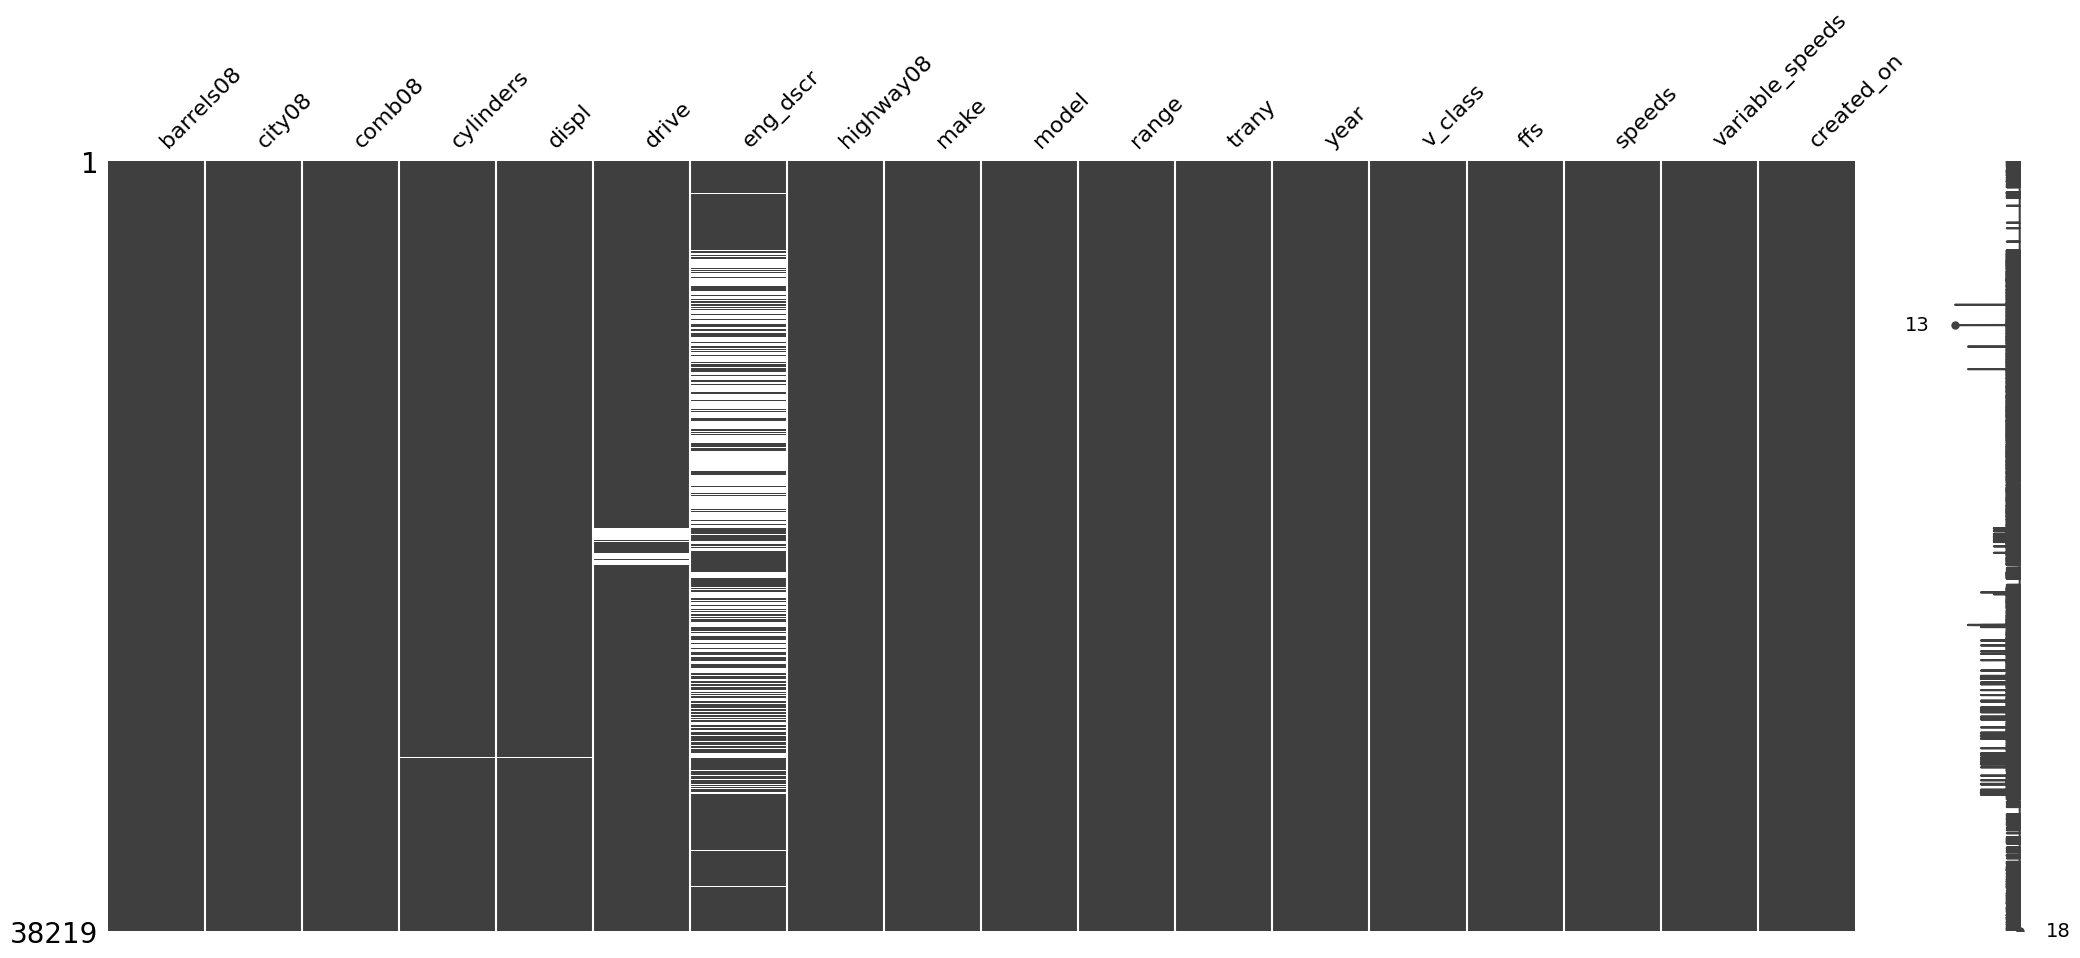

In [212]:
msno.matrix(autos2)

In [213]:
# missing Dataframe  ( .isna is a synonym for .isnull )
autos2.isnull()

barrels08  city08  comb08  cylinders  displ  drive  eng_dscr  \
0          False   False   False      False  False  False     False   
1          False   False   False      False  False  False     False   
2          False   False   False      False  False  False     False   
3          False   False   False      False  False  False      True   
4          False   False   False      False  False  False     False   
5          False   False   False      False  False  False     False   
6          False   False   False      False  False  False     False   
7          False   False   False      False  False  False     False   
8          False   False   False      False  False  False     False   
9          False   False   False      False  False  False     False   
10         False   False   False      False  False  False     False   
11         False   False   False      False  False  False     False   
12         False   False   False      False  False  False     False   
13         False   False   False      False  False  False     False   
14         False   False   False      False  False  False      True   
15         False   False   False      False  False  False     False   
16         False   False   False      False  False  False     False   
17         False   False   False      False  False  False     False   
18         False   False   False      False  False  False     False   
19         False   False   False      False  False  False     False   
20         False   False   False      False  False  False     False   
21         False   False   False      False  False  False     False   
22         False   False   False      False  False  False     False   
23         False   False   False      False  False  False     False   
24         False   False   False      False  False  False     False   
25         False   False   False      False  False  False      True   
26         False   False   False      False  False  False     False   
27         False   False   False      False  False  False     False   
28         False   False   False      False  False  False     False   
29         False   False   False      False  False  False     False   
...          ...     ...     ...        ...    ...    ...       ...   
39071      False   False   False      False  False  False     False   
39072      False   False   False      False  False  False     False   
39073      False   False   False      False  False  False     False   
39074      False   False   False      False  False  False     False   
39075      False   False   False      False  False  False     False   
39076      False   False   False      False  False  False     False   
39077      False   False   False      False  False  False     False   
39078      False   False   False      False  False  False     False   
39079      False   False   False      False  False  False      True   
39080      False   False   False      False  False  False     False   
39081      False   False   False      False  False  False     False   
39082      False   False   False      False  False  False     False   
39083      False   False   False      False  False  False     False   
39084      False   False   False      False  False  False     False   
39085      False   False   False      False  False  False     False   
39086      False   False   False      False  False  False     False   
39087      False   False   False      False  False  False     False   
39088      False   False   False      False  False  False     False   
39089      False   False   False      False  False  False     False   
39090      False   False   False      False  False  False     False   
39091      False   False   False      False  False  False     False   
39092      False   False   False      False  False  False     False   
39093      False   False   False      False  False  False     False   
39094      False   False   False      False  False  False     False   
39095      False   False   Fals

In [214]:
# rows w/ null data walk the columns
autos2.isna().any(axis=1)

0        False
1        False
2        False
3         True
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14        True
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25        True
26       False
27       False
28       False
29       False
         ...  
39071    False
39072    False
39073    False
39074    False
39075    False
39076    False
39077    False
39078    False
39079     True
39080    False
39081    False
39082    False
39083    False
39084    False
39085    False
39086    False
39087    False
39088    False
39089    False
39090    False
39091    False
39092    False
39093    False
39094    False
39095    False
39096    False
39097    False
39098    False
39099    False
39100    False
Length: 38219, dtype: bool

In [215]:
# rows w/ null data applying the mask
autos2[autos2.isna().any(axis=1)]

barrels08  city08  comb08  cylinders  displ  \
3      29.964545      10      11        8.0    5.2   
14     25.354615      12      13        8.0    5.2   
25     25.354615      11      13        8.0    5.2   
47     32.961000       9      10        8.0    5.9   
69     32.961000      10      10        8.0    5.2   
80     32.961000       9      10        8.0    5.9   
136    29.964545      10      11        8.0    5.8   
147    21.974000      14      15        6.0    4.3   
158    20.600625      15      16        6.0    4.3   
169    21.974000      14      15        6.0    4.3   
213    21.232500      15      18        8.0    6.2   
225    22.481471      16      17        8.0    6.2   
280    19.388824      15      17        6.0    4.3   
291    20.600625      15      16        6.0    4.3   
302    19.388824      15      17        6.0    4.3   
402    21.232500      15      18        8.0    6.2   
447    18.311667      15      18        6.0    2.8   
458    17.347895      16      19        6.0    2.8   
469    18.311667      15      18        6.0    2.8   
480    29.964545      11      11        8.0    5.2   
502    25.354615      12      13        8.0    5.2   
513    29.964545      10      11        8.0    5.9   
535    18.311667      17      18        4.0    2.2   
546    14.330870      21      23        4.0    2.2   
558    14.330870      21      23        4.0    2.2   
569    15.695714      18      21        4.0    2.2   
591    19.388824      16      17        4.0    2.6   
602    19.388824      15      17        8.0    4.1   
635    21.232500      15      18        8.0    6.2   
680    18.311667      15      18        6.0    2.8   
...          ...     ...     ...        ...    ...   
38491  25.354615      12      13        8.0    5.2   
38513  23.543571      12      14        8.0    5.2   
38524  29.964545      10      11        8.0    5.9   
38547  29.964545      11      11        8.0    5.2   
38558  32.961000       9      10        8.0    5.9   
38624  29.964545      10      11        8.0    5.8   
38641  23.543571      13      14        6.0    3.1   
38642  21.974000      14      15        6.0    3.1   
38669  29.964545      10      11        8.0    5.8   
38680  20.600625      15      16        6.0    4.3   
38691  19.388824      15      17        6.0    4.3   
38702  19.388824      16      17        6.0    4.3   
38713  19.388824      15      17        6.0    4.3   
38769  20.115000      17      19        8.0    6.2   
38780  20.115000      18      19        8.0    6.2   
38791  20.600625      15      16        6.0    4.3   
38802  21.974000      14      15        6.0    4.3   
38846  18.311667      16      18        6.0    4.3   
38857  19.388824      15      17        6.0    4.3   
38868  17.347895      16      19        6.0    4.3   
38935  19.388824      15      17        6.0    4.3   
38946  20.600625      15      16        6.0    4.3   
38957  19.388824      15      17        6.0    4.3   
38968  21.974000      14      15        6.0    4.3   
38979  20.600625      15      16        6.0    4.3   
38991  21.974000      14      15        6.0    4.3   
39035  21.232500      15      18        8.0    6.2   
39046  22.481471      16      17        8.0    6.2   
39068  21.974000      14      15        6.0    3.7   
39079  21.974000      14      15        6.0    3.7   

                            drive eng_dscr  highway08                make  \
3                Rear-Wheel Drive      NaN         12               Dodge   
14               Rear-Wheel Drive      NaN         15               Dodge   
25               Rear-Wheel Drive      NaN         17               Dodge   
47               Rear-Wheel Drive      NaN         11               Dodge   
69               Rear-Wheel Drive      NaN         11               Dodge   
80               Rear-Wheel Drive      NaN         10               Dodge   
136              Rear-Wheel Drive      NaN         12                Ford   
147              Rear-Wheel Drive      NaN

In [216]:
# columns w/ missing data
autos2.isna().any(axis=0)

barrels08          False
city08             False
comb08             False
cylinders           True
displ               True
drive               True
eng_dscr            True
highway08          False
make               False
model              False
range              False
trany               True
year               False
v_class            False
ffs                False
speeds             False
variable_speeds    False
created_on         False
dtype: bool

In [217]:
# count missing data
(autos2
 .isna()
 .sum(axis='index')
)

barrels08              0
city08                 0
comb08                 0
cylinders            144
displ                142
drive               1189
eng_dscr           15496
highway08              0
make                   0
model                  0
range                  0
trany                 11
year                   0
v_class                0
ffs                    0
speeds                 0
variable_speeds        0
created_on             0
dtype: int64

In [218]:
# percent missing data
(autos2
 .isna()
 .mean(axis=0)
 .mul(100)
)

barrels08           0.000000
city08              0.000000
comb08              0.000000
cylinders           0.376776
displ               0.371543
drive               3.111018
eng_dscr           40.545279
highway08           0.000000
make                0.000000
model               0.000000
range               0.000000
trany               0.028781
year                0.000000
v_class             0.000000
ffs                 0.000000
speeds              0.000000
variable_speeds     0.000000
created_on          0.000000
dtype: float64

In [219]:
autos2['year'>2010].mean()*100

TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
# rows where trany is missing
autos2[autos2.trany.isna()]

In [ ]:
autos2.query('trany.isna()')

In [ ]:
# What to do?
# Drop column- if majority is missing (perhap add is_na column)
(autos2
 .assign(eng_missing=autos2.eng_dscr.isna())
 .drop(columns='eng_dscr'))

In [ ]:
# drop rows NUCLEAR OPTION
autos2.dropna()

In [ ]:
# rows where cylinders is missing
autos2[autos2.cylinders.isna()]

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
# Replace with mean (maybe not appropriate with cylinders)
autos2.cylinders.fillna(autos2.cylinders.mean()).loc[7136:7141]

In [ ]:
# Interpolate values - better for time/sequential data
autos2.cylinders.fillna(autos2.cylinders.interpolate()).loc[7136:7141]

In [ ]:
# alternate mechanism (note the cond clause is more general/powerful)
autos2.cylinders.where(
    cond=~autos2.cylinders.isna(),
    other=10).loc[7136:7141]

In [ ]:
# Look at make averages
(autos2
 .groupby('make')
 .cylinders
 .median()
 .loc[['Ford', 'Toyota']]
)

In [ ]:
autos2.loc[[7136,7137,7138,7139,7140,9211,9212,9213,9214]]

In [ ]:
# alternate mechanism (note the cond clause is more general/powerful)
(autos2
 .cylinders
 .where(cond=~((autos2.cylinders.isna()) & (autos2.make=='Toyota')),other=4.9)
 .loc[[7136,7137,7138,7139,7140,9211,9212,9213,9214]]
)

In [ ]:
# alternate mechanism (note the cond clause is more general/powerful)
(autos2
 .cylinders.where(
                 ~((autos2.cylinders.isna()) & (autos2.make=='Ford')),
                 other=6.06)
           .where(
                 ~((autos2.cylinders.isna()) & (autos2.make=='Toyota')),
                 other=4.95)
 .loc[[7136,7137,7138,7139,7140,9211,9212,9213,9214]]
)

## Missing Values Exercise

* Find rows with missing values
* Find columns with missing values
* What would you do with the missing values?

In [ ]:
nyc2[(nyc2
 .isna()
 .any(axis='columns')
)]

In [ ]:
(nyc2
 .isna()
 .any(axis='index')
)

In [ ]:
dict(zip(nyc2.columns[1:],nyc2.median(axis='index', numeric_only=True)))

In [ ]:
(nyc2
 .fillna(dict(zip(nyc2.columns[1:],nyc2.median(axis='index'))))
)

## Grouping

In [ ]:
(autos2
 .groupby('year')
 .median()
 [['city08', 'highway08', 'comb08']]
 .plot()
)

In [ ]:
(autos2
 .groupby('make')
 .mean()
)

In [ ]:
# can group by multiple columns
# will do cartesian product if one of the columns is category type
# (Use observed=True to keep old behavior)
(autos2
 .groupby(['year','make'])
 .count()
 .loc[:,['eng_dscr']]
 .reset_index()
)

In [ ]:
# can group by multiple columns
# will do cartesian product if one of the columns is category type
# (Use observed=True to keep old behavior)
(autos2
 .astype({'make': 'category'})
 .groupby(['year','make'], observed=True)
 .count()
 .loc[:,['eng_dscr']]
 .reset_index()
)

In [ ]:
# don't put groups in index
autos2.groupby(['year', 'make'], as_index=False).eng_dscr.count()

In [ ]:
# or .reset_index
autos2.groupby(['year', 'make']).eng_dscr.count().reset_index()

In [ ]:
# apply arbitrary function to group
autos2.groupby('year')['make'].apply(lambda ser_: len(ser_.unique()))

In [ ]:
# easier - since pulling out series, apply series method
autos2.groupby('year')['make'].nunique()

In [ ]:
autos2.groupby('year')['make'].nunique().plot()

In [ ]:
# can call DataFrame methods on groupby (or Series if the group is a Series)
autos2.groupby('year')[['cylinders', 'city08']].describe()

In [ ]:
# Can apply multiple functions with ``.agg``
# see pandas/core/base.py _try_aggregate_string_function

# 'plot', 'boxplot', 'hist','last', 'first', 'head', 'tail', 'median', 'mean', 'sum', 'min', 'max', 'cumcount', 'ngroup', 'resample', 'rank', 'quantile', 'fillna', 'mad', 'any', 'all', 'take', 'idxmax', 'idxmin', 'shift', 'tshift', 'ffill', 'bfill', 'pct_change', 'skew', 'corr', 'cov', 'diff', 'nlargest', 'nsmallest', 'is_monotonic_increasing', 'is_monotonic_decreasing', 'dtype', 'unique', 'dtypes', 'corrwith' 'cumprod', 'cumsum', 'shift', 'cummin', 'cummax', 'rank', 'count', 'size'

autos2.groupby('year').agg(['max', 'mean', 'min']).city08.plot()

In [ ]:
# Flatten hierarchical columns (0.24+)
b3 = autos2.groupby('year').agg(['max', 'mean', 'min'])
b3.columns=['_'.join(x) for x in b3.columns.to_flat_index()]
b3

In [ ]:
# Flatten hierarchical columns (0.24+)
def flatten_cols(df_):
    df_.columns = ['_'.join(x) for x in df_.columns.to_flat_index()]
    return df_

(autos2
 .groupby('year')
 .agg(['max', 'mean', 'min'])
 .pipe(flatten_cols)
)

In [ ]:
# Named aggregation 0.25+
(autos2
 .groupby('year')
 .agg(max_city=('city08', 'max'),
      mean_city=('city08', 'mean'),
      min_city=('city08', lambda s_:s_.min()))
)

# WOW
Group by is powerful.

In [ ]:
# if you have a date you can group by components of it
# here we have a string so lets use components of it
autos2.groupby(autos2.make.str.count('a')).size()

In [ ]:
# Can "unstack" the index
(autos2
 .groupby(['year', 'make'])
 .mean()
 .unstack())

In [ ]:
# Can "unstack" the index
(autos2
 .groupby(['year', 'make'])
#  .std()
 .mean()
 .unstack()
 .loc[:,'city08']
 .loc[:,['Ford', 'Honda', 'Toyota']]
 .plot()
)

In [ ]:
# Slice on hierarchical-columns
(autos2
 .groupby(['year', 'make'])
 .mean()
 .unstack()
 .loc[:,('barrels08', 'Ford'):('barrels08', 'Geo')]
 .plot()
 .legend(bbox_to_anchor=(1,1))
)

In [ ]:
# Just Ford and Honda
(autos2
 .groupby(['year', 'make'])
 .mean()
 .unstack()
 .loc[:,[('barrels08', 'Ford'),('barrels08', 'Honda')]]
 .plot()
 .legend(bbox_to_anchor=(1,1))
)

## Grouping Exercise
* Find the count of events for each year
* Plot the count of events for each year
* Find the mean of all temperature columns for every two weeks (hint see ``pd.Grouper``)
* Plot the above

In [ ]:
(nyc2
    .assign(year=nyc2.est.dt.year)
    .groupby(['year','events'])
    .count()
    .unstack()
    .loc[:,'est']
    .plot()
)

In [ ]:
# Find the mean of all temperature columns for every two weeks (hint see pd.Grouper)
# Plot the above
(nyc2
    .groupby(pd.Grouper(key="est", freq="2W"))
    .mean()
    .loc[:,'max_temperaturef':'min_temperaturef']
    .plot()
)

## Joining Data

In [ ]:
# https://www.epa.gov/automotive-trends/explore-automotive-trends-data
# Dataset with highest/lowest fuel economy by year (with weight)
weight_df = pd.read_csv('../data/table_export.csv')
weight_df                        

In [ ]:
# This fails. (Notice end columns)
autos2.join(weight_df)

In [ ]:
autos2.shape, weight_df.shape

In [ ]:
# .merge looks for common columns by default
autos2.merge(weight_df)

In [ ]:
weight_df.columns

In [ ]:
# careful of type incompatibilities
autos2.merge(weight_df, left_on=['year', 'make', 'model'],
            right_on=['Model Year', 'Manufacturer', 'Model Name'])

In [ ]:
# "Model Year" is an object!
weight_df.dtypes

In [ ]:
# Whoops there is a non-int value
weight_df['Model Year'].value_counts()

In [ ]:
# does inner join by default (only 12 rows)
autos2.merge(
    (weight_df
     .assign(year=pd.to_numeric(weight_df['Model Year'].str.replace('Prelim. ', '')))
    ),
     left_on=['year', 'make', 'model'],
            right_on=['year', 'Manufacturer', 'Model Name'])

In [ ]:
# use display to show multiple outputs
from IPython.display import display
display(weight_df.head())
display(autos2.head())

## Joining Exercise
* Create a dataframe, ``countries``, with the countries of the top ten makes. Join it with ``autos2`` to add a "country" column.

(*US* - Chevy, Ford, Dodge, GMC. *Japan* - Toyota, Nissan, Mitsubishi. *German* - Mercedes, Volkswagen, BMW)

## Pivoting

In [ ]:
# basically an alternate syntax for groupby
autos2.pivot_table(index='make', aggfunc='mean')

In [ ]:
# basically an alternate syntax for groupby
autos2.pivot_table(index='make', aggfunc={'barrels08': np.mean,
                                         'highway08': lambda s_:s_.median(),
                                          'range': 'max',
                                         })

In [ ]:
autos2.pivot_table(index='year', values=['highway08'], aggfunc='max')

In [ ]:
autos2.pivot_table(index=['year', 'make'], aggfunc='mean')

In [ ]:
autos2.pivot_table(index=['year', 'make'], aggfunc='mean').unstack()

In [ ]:
(autos2
 .pivot_table(index=['year', 'make'], aggfunc='mean')
 .unstack()
 .barrels08
 .iloc[:,:10]
 .plot()
 .legend(bbox_to_anchor=(1,1))
)

## Pivoting Exercise
* Find the count of events per month
* Find the count of events per weekday

## Timeseries

Data from https://www.ncdc.noaa.gov/cdo-web/search

Data at ../data/snow-alta-1990-2017.csv

Documentation - https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf


* STATION_NAME (max 50 characters) is the (usually city/airport name). Optional
output field.
* STATION - 17 characters) is the station identification code. Please see
http://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt
* NAME - name of the station
* LATITUDE
* LONGITUDE
* ELEVATION - meters
* DATE - YYYY-MM-DD
* DAPR - Number of days included in the multiday precipitation total (MDPR)
* DAPR_ATTRIBUTES
* DASF - Number of days included in the multiday snowfall total (MDSF)
* DASF_ATTRIBUTES 
* MDPR -  Multiday precipitation total (mm or inches as per user preference; use with DAPR and DWPR, if
available)
* MDPR_ATTRIBUTES
* MDSF - Multiday snowfall total (mm or inches as per user preference)
* MDSF_ATTRIBUTES
* PRCP - Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)
* PRCP_ATTRIBUTES 
* SNOW -  Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file)
* SNOW_ATTRIBUTES
* SNWD -  Snow depth (mm or inches as per user preference, inches on Daily Form pdf file)
* SNWD_ATTRIBUTES
* TMAX - Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file
* TMAX_ATTRIBUTES 
* TMIN - Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file
* TMIN_ATTRIBUTES
* TOBS - Temperature at the time of observation (Fahrenheit or Celsius as per user preference)
* TOBS_ATTRIBUTES
* WT01 - Fog, ice fog, or freezing fog (may include heavy fog)
* WT01_ATTRIBUTES
* WT03 - Thunder
* WT03_ATTRIBUTES
* WT04 - Ice pellets, sleet, snow pellets, or small hail
* WT04_ATTRIBUTES
* WT05 -  Hail (may include small hail)
* WT05_ATTRIBUTES
* WT06 - Glaze or rime
* WT06_ATTRIBUTES
* WT11 -  High or damaging winds
* WT11_ATTRIBUTES



In [2]:
# going to use a different data set
alta = pd.read_csv('../data/snow-alta-1990-2017.csv')
alta['DATE'] = pd.to_datetime(alta.DATE)

In [4]:
alta.describe().T

count         mean           std        min        25%  \
LATITUDE   10025.0    40.590500  7.105782e-15    40.5905    40.5905   
LONGITUDE  10025.0  -111.636900  1.421156e-14  -111.6369  -111.6369   
ELEVATION  10025.0  2660.900000  4.547700e-13  2660.9000  2660.9000   
DAPR          19.0     3.578947  6.644261e+00     2.0000     2.0000   
DASF           4.0     2.000000  0.000000e+00     2.0000     2.0000   
MDPR          62.0     0.532903  5.565891e-01     0.0100     0.1000   
MDSF          26.0     6.027692  5.520407e+00     0.1200     2.0100   
PRCP        9756.0     0.132551  3.158877e-01     0.0000     0.0000   
SNOW        9649.0     1.344461  3.501150e+00     0.0000     0.0000   
SNWD        9269.0    34.509332  3.857597e+01     0.0000     0.0000   
TMAX        9830.0    48.413835  1.782765e+01    -8.0000    34.0000   
TMIN        9778.0    29.413991  1.519652e+01   -25.0000    18.0000   
TOBS        9501.0    42.016209  1.908090e+01   -18.0000    26.0000   
WT01          14.0     1.000000  0.000000e+00     1.0000     1.0000   
WT03          40.0     1.000000  0.000000e+00     1.0000     1.0000   
WT04          12.0     1.000000  0.000000e+00     1.0000     1.0000   
WT05          11.0     1.000000  0.000000e+00     1.0000     1.0000   
WT06           1.0     1.000000           NaN     1.0000     1.0000   
WT11           2.0     1.000000  0.000000e+00     1.0000     1.0000   

                 50%        75%        max  
LATITUDE     40.5905    40.5905    40.5905  
LONGITUDE  -111.6369  -111.6369  -111.6369  
ELEVATION  2660.9000  2660.9000  2660.9000  
DAPR          2.0000     2.0000    31.0000  
DASF          2.0000     2.0000     2.0000  
MDPR          0.3350     0.7725     2.5000  
MDSF          5.0000     7.8725    20.9800  
PRCP          0.0000     0.1000     5.0800  
SNOW          0.0000     0.0000    36.0000  
SNWD         19.0000    65.0000   168.0000  
TMAX         47.0000    65.0000    86.0000  
TMIN         29.0000    42.0000    66.0000  
TOBS         40.0000    59.0000    84.0000  
WT01          1.0000     1.0000     1.0000  
WT03          1.0000     1.0000     1.0000  
WT04          1.0000     1.0000     1.0000  
WT05          1.0000     1.0000     1.0000  
WT06          1.0000     1.0000     1.0000  
WT11          1.0000     1.0000     1.0000

<AxesSubplot: xlabel='DATE'>

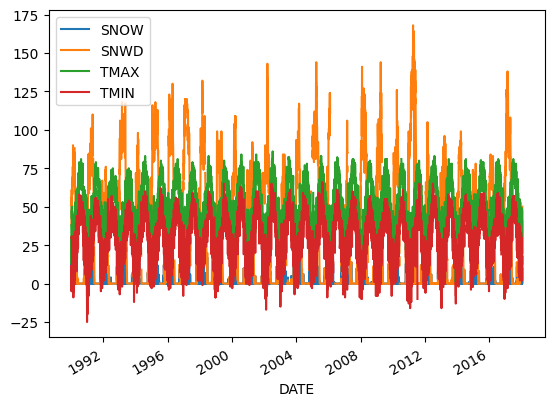

In [5]:
alta.set_index("DATE")[['SNOW', 'SNWD', 'TMAX', 'TMIN']].plot()

<AxesSubplot: xlabel='DATE'>

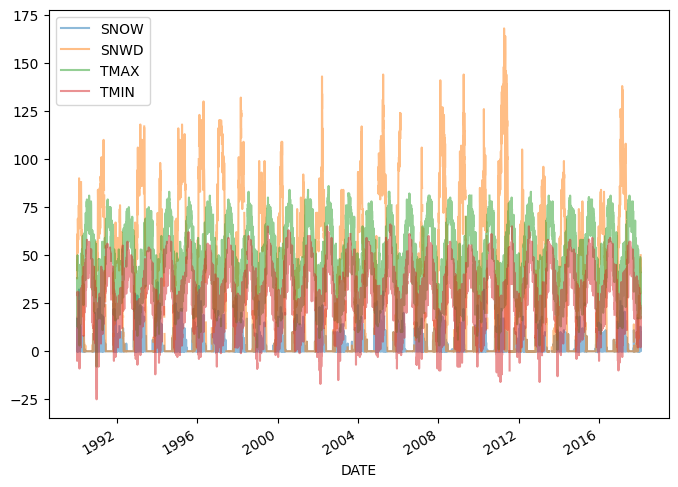

In [6]:
(alta
 .set_index("DATE")
 [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
 .plot(figsize=(8,6), alpha=.5)
)

In [7]:
(alta
 .set_index("DATE")
#  [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
 [['SNOW']]
 .iloc[-100:]
 .query('SNOW.isna()')
#  .plot(figsize=(8,6), alpha=.5)
)

SNOW
DATE            
2017-12-23   NaN

<AxesSubplot: xlabel='DATE'>

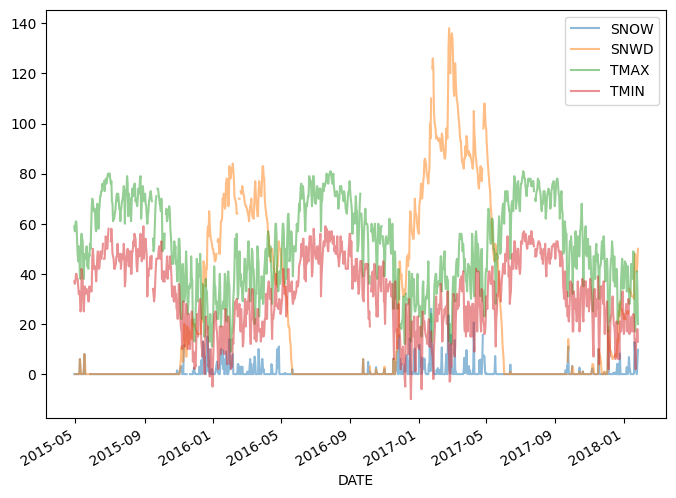

In [8]:
(alta
 .set_index("DATE")
 [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
 .iloc[-1000:]
 .plot(figsize=(8,6), alpha=.5)
)

<AxesSubplot: xlabel='DATE'>

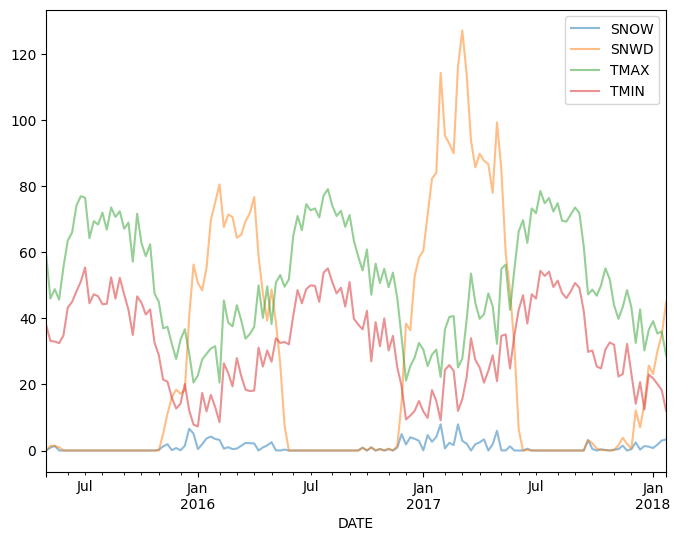

In [9]:
(alta
 .iloc[-1000:]
 .set_index("DATE")
 .resample('W') #cool
 .mean()
 [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
 .plot(figsize=(8,6), alpha=.5)
)

In [10]:
(alta
 .iloc[-1000:]
 .set_index("DATE")
 [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
 .resample('W')
 .mean()
 .rolling(2)
 .mean()
#  .plot(figsize=(8,6), alpha=.5)
)

SNOW       SNWD       TMAX       TMIN
DATE                                                     
2015-05-03           NaN        NaN        NaN        NaN
2015-05-10  4.285714e-01   0.714286  52.700000  35.571429
2015-05-17  1.142857e+00   1.357143  47.428571  33.071429
2015-05-24  7.142857e-01   1.142857  47.261905  32.750000
2015-05-31  1.110223e-16   0.500000  50.583333  33.666667
...                  ...        ...        ...        ...
2017-12-31  1.260714e+00  20.000000  33.428571  17.714286
2018-01-07  9.642857e-01  24.440476  37.857143  22.428571
2018-01-14  1.264286e+00  26.666667  37.285714  21.000000
2018-01-21  2.400000e+00  32.583333  35.714286  19.214286
2018-01-28  3.184286e+00  39.900000  32.400000  15.142857

[144 rows x 4 columns]

In [11]:
# month with most snow
(alta
 .groupby(alta.DATE.dt.month)
 [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
 .max()
#  .plot()
)

SNOW   SNWD  TMAX  TMIN
DATE                         
1     36.0  126.0  59.0  38.0
2     32.0  141.0  58.0  39.0
3     31.0  144.0  65.0  44.0
4     32.0  168.0  67.0  55.0
5     20.0  158.0  79.0  59.0
6     17.0  128.0  81.0  65.0
7      0.0   22.0  86.0  65.0
8      0.0    2.0  84.0  66.0
9     12.5   14.0  78.0  59.0
10    25.0   46.0  72.0  53.0
11    30.0   72.0  62.0  43.0
12    29.0   99.0  56.0  36.0

In [12]:
# month with most snow
(alta
 .groupby(alta.DATE.dt.month.rename('Month'))
 [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
 .max()
)

SNOW   SNWD  TMAX  TMIN
Month                         
1      36.0  126.0  59.0  38.0
2      32.0  141.0  58.0  39.0
3      31.0  144.0  65.0  44.0
4      32.0  168.0  67.0  55.0
5      20.0  158.0  79.0  59.0
6      17.0  128.0  81.0  65.0
7       0.0   22.0  86.0  65.0
8       0.0    2.0  84.0  66.0
9      12.5   14.0  78.0  59.0
10     25.0   46.0  72.0  53.0
11     30.0   72.0  62.0  43.0
12     29.0   99.0  56.0  36.0

<AxesSubplot: xlabel='Month'>

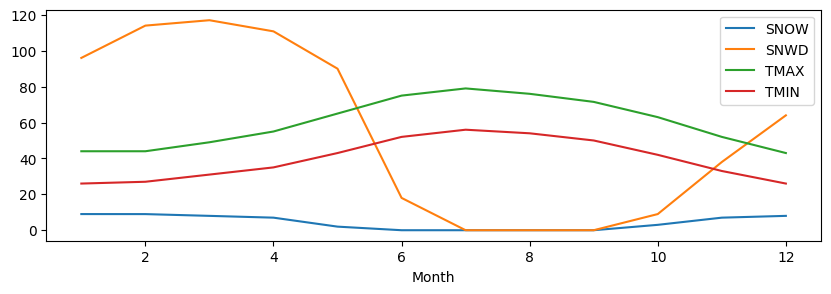

In [13]:
# month with most snow
(
alta
    .groupby(alta.DATE.dt.month.rename('Month'))
    [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
#     .max()
    .quantile(0.9)
    .plot.line(figsize=(10,3))
)

In [41]:
# month with most snow
(alta
 .groupby(alta.DATE.dt.month.rename('Month'))
 [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
 .mean()
#  .idxmax()
)

SNOW       SNWD       TMAX       TMIN
Month                                           
1      2.674855  64.930012  30.815578  14.567319
2      2.688073  82.080272  31.301935  15.272962
3      2.329500  85.545000  37.041371  20.019025
4      2.058530  74.567082  42.445013  24.681643
5      0.681873  40.113456  52.737923  33.094891
6      0.166131   5.994812  64.513076  42.011307
7      0.000000   0.046914  72.705189  49.803571
8      0.000000   0.002522  70.996287  48.687811
9      0.141046   0.195739  62.343511  40.759236
10     0.926434   2.604138  49.820988  31.007444
11     1.954975  17.144547  37.545788  20.500000
12     2.456392  40.430538  30.071596  13.893067

In [42]:
# month with most snow
(
alta
    .groupby(alta.DATE.dt.month.rename('Month'))
    [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
    .agg(['mean', 'max'])
)

SNOW             SNWD              TMAX             TMIN      
           mean   max       mean    max       mean   max       mean   max
Month                                                                    
1      2.674855  36.0  64.930012  126.0  30.815578  59.0  14.567319  38.0
2      2.688073  32.0  82.080272  141.0  31.301935  58.0  15.272962  39.0
3      2.329500  31.0  85.545000  144.0  37.041371  65.0  20.019025  44.0
4      2.058530  32.0  74.567082  168.0  42.445013  67.0  24.681643  55.0
5      0.681873  20.0  40.113456  158.0  52.737923  79.0  33.094891  59.0
6      0.166131  17.0   5.994812  128.0  64.513076  81.0  42.011307  65.0
7      0.000000   0.0   0.046914   22.0  72.705189  86.0  49.803571  65.0
8      0.000000   0.0   0.002522    2.0  70.996287  84.0  48.687811  66.0
9      0.141046  12.5   0.195739   14.0  62.343511  78.0  40.759236  59.0
10     0.926434  25.0   2.604138   46.0  49.820988  72.0  31.007444  53.0
11     1.954975  30.0  17.144547   72.0  37.545788  62.0  20.500000  43.0
12     2.456392  29.0  40.430538   99.0  30.071596  56.0  13.893067  36.0

In [43]:
# day with most snow
(
alta
    .groupby(alta.DATE.dt.day_name().rename('Day'))
    [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
    .agg(['mean', 'max'])
)

SNOW             SNWD              TMAX             TMIN      
               mean   max       mean    max       mean   max       mean   max
Day                                                                          
Friday     1.321733  25.0  34.556061  164.0  48.243954  83.0  29.320970  65.0
Monday     1.422247  30.0  35.027946  155.0  48.618440  82.0  29.490028  66.0
Saturday   1.262464  29.0  34.322458  168.0  48.469242  86.0  29.417504  61.0
Sunday     1.466571  28.0  34.519461  158.0  48.473722  84.0  29.445792  65.0
Thursday   1.342549  36.0  34.031390  153.0  48.290780  83.0  29.391149  59.0
Tuesday    1.308699  32.0  34.457923  159.0  48.516106  84.0  29.468300  65.0
Wednesday  1.286536  32.0  34.655251  156.0  48.284797  84.0  29.364095  62.0

<AxesSubplot: xlabel='DATE'>

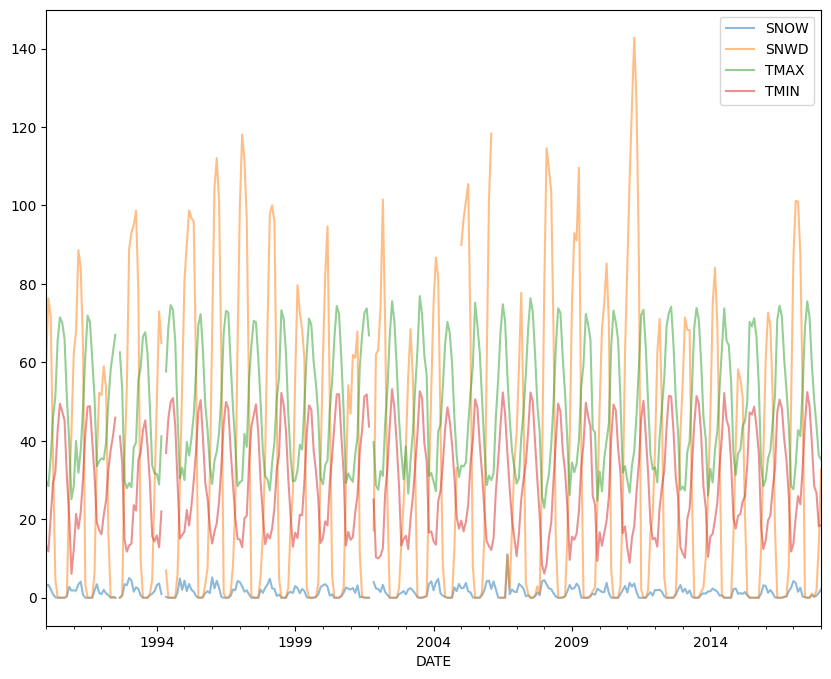

In [44]:
(alta
 .set_index("DATE")
 .resample('M')
 [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
 .mean()
 .plot(figsize=(10,8), alpha=.5)
)

<AxesSubplot: xlabel='DATE'>

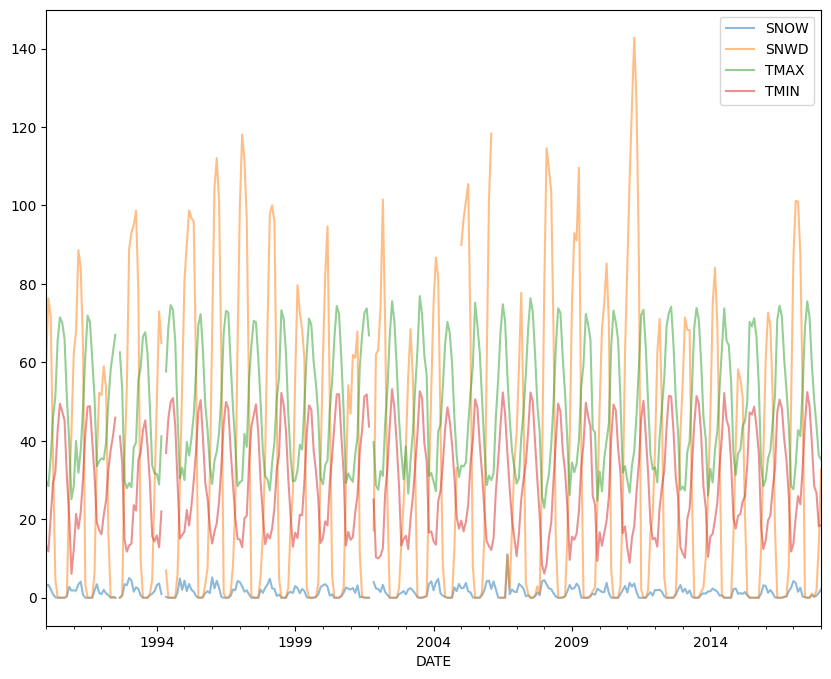

In [45]:
(alta
# .set_index("DATE")
# .resample('M')
 .groupby(pd.Grouper(key='DATE', freq='M'))
 [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
 .mean()
 .plot(figsize=(10,8), alpha=.5)
)

<AxesSubplot: xlabel='DATE'>

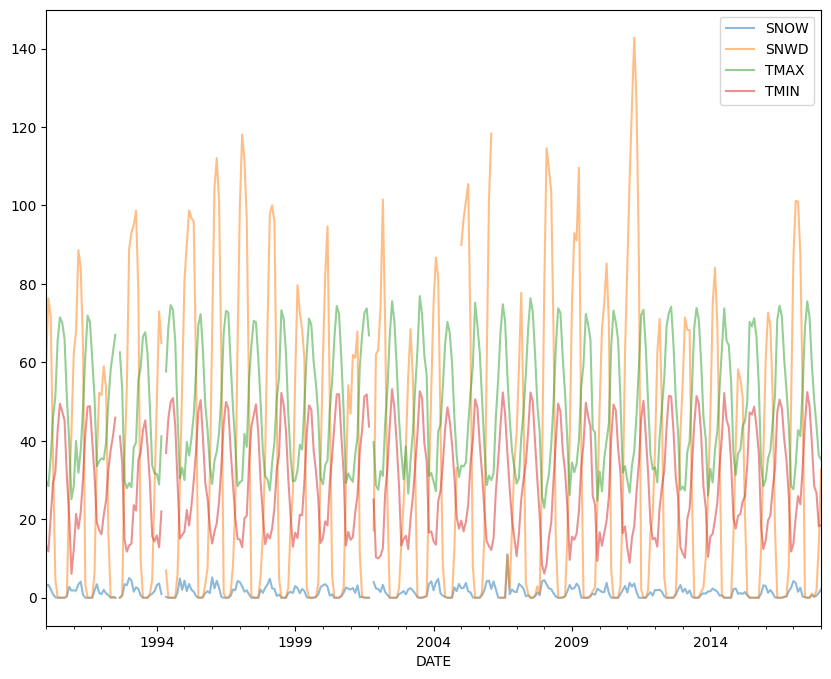

In [46]:
(alta
# .set_index("DATE")
# .resample('M')
 .groupby(pd.Grouper(key='DATE', freq='M'))
 [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
 .mean()
 .plot(figsize=(10,8), alpha=.5)
)

In [ ]:
# filling in holes
(alta
 .groupby(pd.Grouper(key='DATE', freq='M'))
 [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
 .mean()
 .iloc[:70]
 .plot(figsize=(10,8), alpha=.5)
)

<AxesSubplot: xlabel='DATE'>

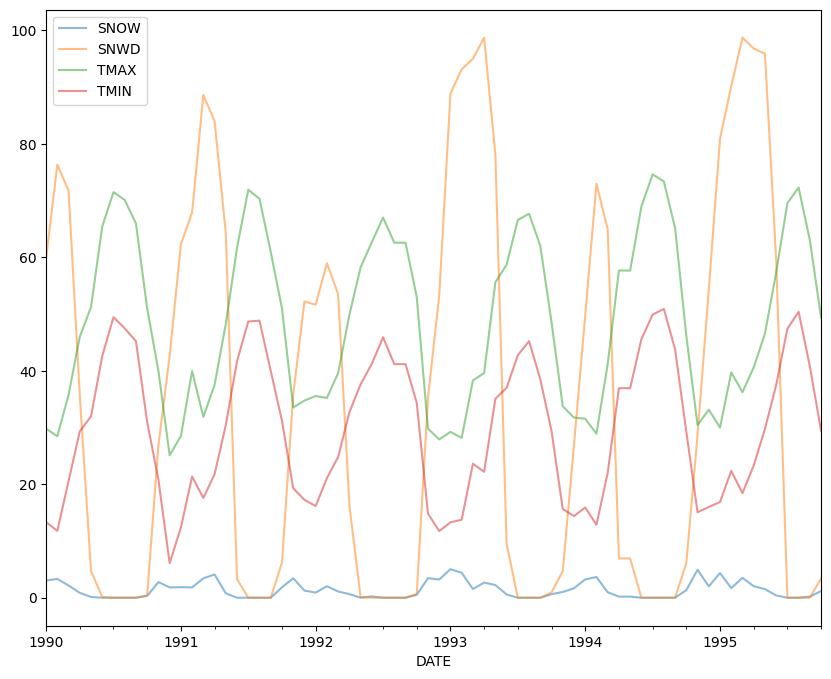

In [47]:
# filling in holes
(alta
 .groupby(pd.Grouper(key='DATE', freq='M'))
 [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
 .mean()
 .iloc[:70]
 .bfill()
 .plot(figsize=(10,8), alpha=.5)
)

<AxesSubplot: xlabel='DATE'>

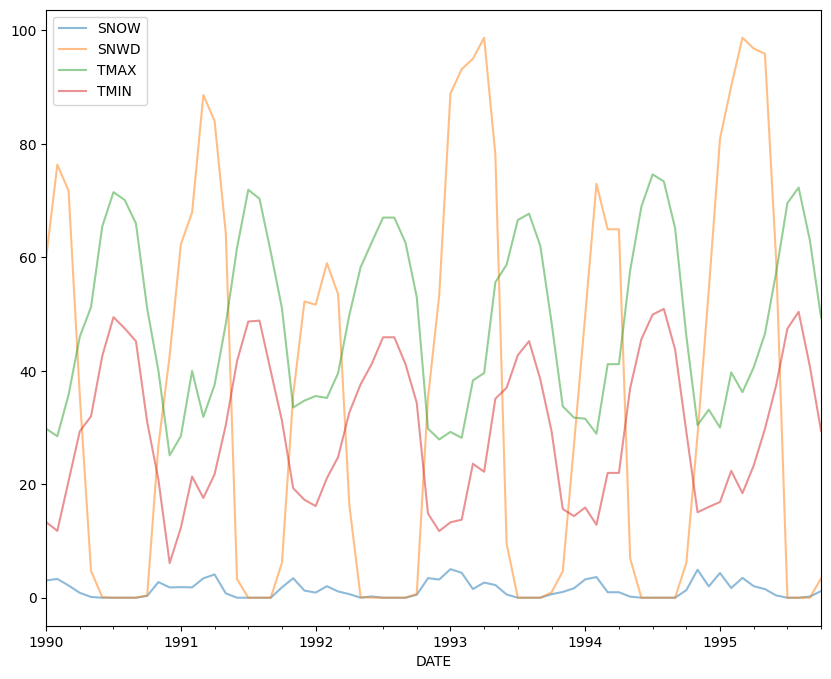

In [48]:
# filling in holes
(alta
 .groupby(pd.Grouper(key='DATE', freq='M'))
 [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
 .mean()
 .iloc[:70]
 .ffill()
 .plot(figsize=(10,8), alpha=.5)
)

<AxesSubplot: xlabel='DATE'>

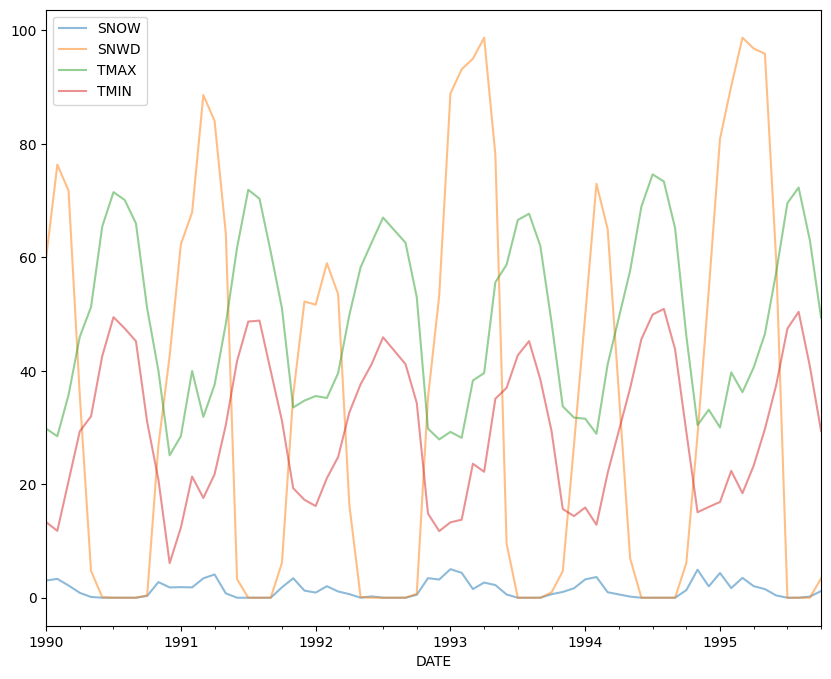

In [49]:
# filling in holes
(alta
 .groupby(pd.Grouper(key='DATE', freq='M'))
 [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
 .mean()
 .iloc[:70]
 .interpolate()
 .plot(figsize=(10,8), alpha=.5)
)

<AxesSubplot: xlabel='DATE'>

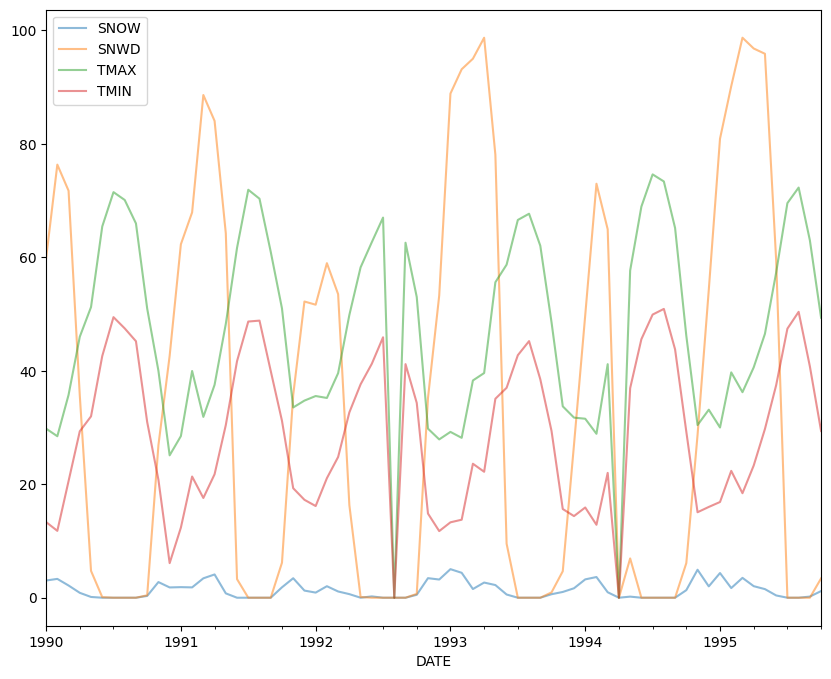

In [50]:
# filling in holes
(alta
 .groupby(pd.Grouper(key='DATE', freq='M'))
 [['SNOW', 'SNWD', 'TMAX', 'TMIN']]
 .mean()
 .iloc[:70]
 .fillna(0)
 .plot(figsize=(10,8), alpha=.5)
)

c:\users\knhoffm\.virtualenvs\python_for_engineer_science\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='TOBS', ylabel='SNWD'>

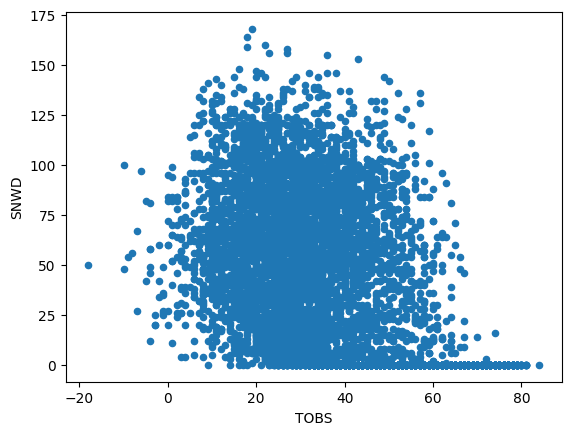

In [51]:
(alta
.plot.scatter(x='TOBS', y='SNWD'))

<AxesSubplot: xlabel='TOBS', ylabel='SNWD'>

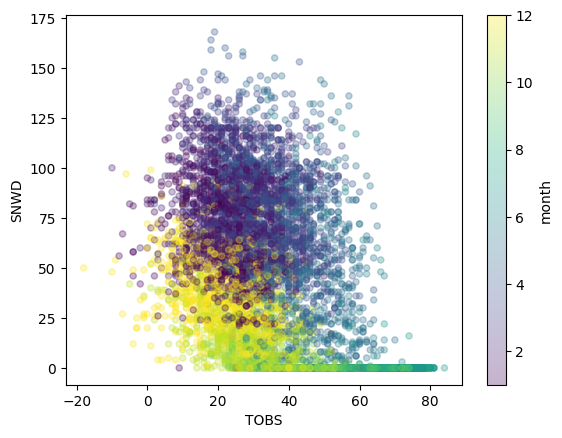

In [14]:
(alta
 .assign(month=alta.DATE.dt.month)
 .plot.scatter(x='TOBS', y='SNWD', alpha=.3, c='month', cmap='viridis'))

<AxesSubplot: xlabel='TOBS', ylabel='SNWD'>

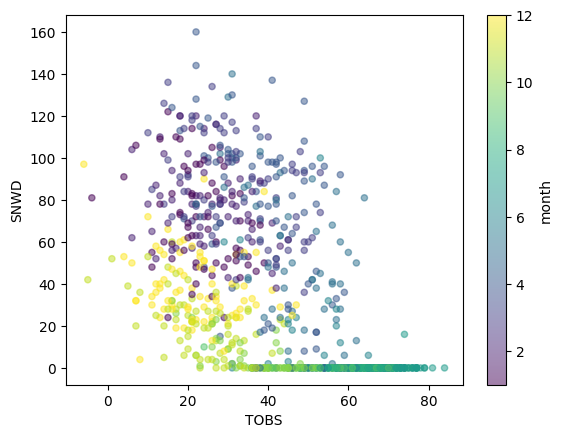

In [15]:
(alta
 .assign(month=alta.DATE.dt.month)
 .sample(1000)
 .plot.scatter(x='TOBS', y='SNWD', alpha=.5, c='month', cmap='viridis'))

<AxesSubplot: xlabel='TOBS', ylabel='SNWD'>

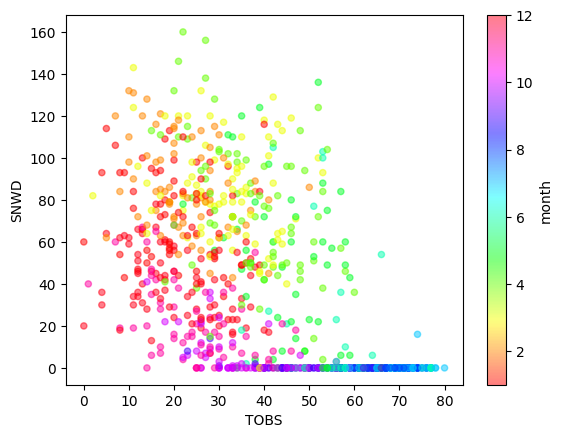

In [16]:
# try cyclical color map
(alta
 .assign(month=alta.DATE.dt.month)
 .sample(1000)
 .plot.scatter(x='TOBS', y='SNWD', alpha=.5, c='month', cmap='hsv'))

## Timeseries Exercise
* Get the average temp by year
* Plot the average humidity by year
* Plot the 51st quantile of temp by year

In [102]:
nyc2.columns

Index(['est', 'max_temperaturef', 'mean_temperaturef', 'min_temperaturef',
       'max_dew_pointf', 'meandew_pointf', 'min_dewpointf', 'max_humidity',
       'mean_humidity', 'min_humidity', 'max_sea_level_pressurein',
       'mean_sea_level_pressurein', 'min_sea_level_pressurein',
       'max_visibilitymiles', 'mean_visibilitymiles', 'min_visibilitymiles',
       'max_wind_speedmph', 'mean_wind_speedmph', 'max_gust_speedmph',
       'precipitationin', 'cloudcover', 'events', 'winddirdegrees',
       'mean_visibility_km'],
      dtype='object')

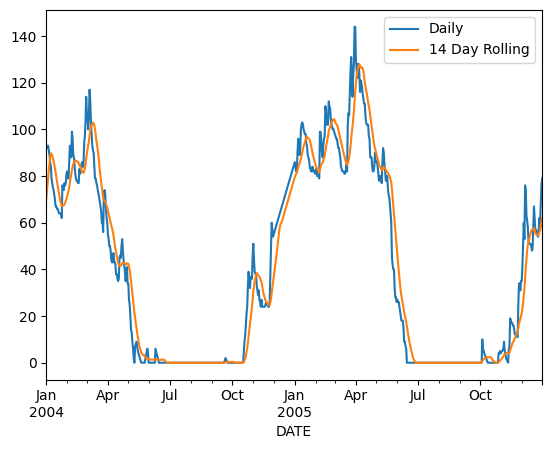

In [23]:
daily = (alta
 .groupby(pd.Grouper(key='DATE', freq='D'))
 .SNWD
 .mean()
 .interpolate())

ax = (daily
 .loc['2004':'2005']
 .plot(label='Daily')
)

(daily
 .rolling(14)
 .mean()
 .loc['2004':'2005']
 .plot(ax=ax, label='14 Day Rolling')
)

ax.legend()

<AxesSubplot: xlabel='DATE'>

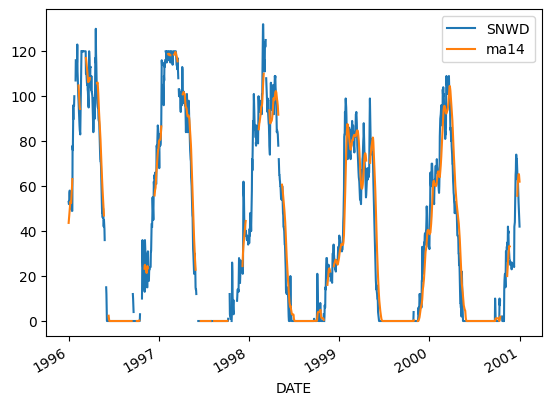

In [31]:
def get_ma14(df):
    return(df
            .groupby(pd.Grouper(key='DATE',freq='D'))
            .SNWD
            .mean()
            .reset_index(drop=True)
            .rolling(14)
            .mean()
            .shift(-70)
           )

(alta
  .assign(ma14 = get_ma14)
  .set_index('DATE')
  .loc['1996':'2000', ['SNWD', 'ma14']]
  .plot()
)

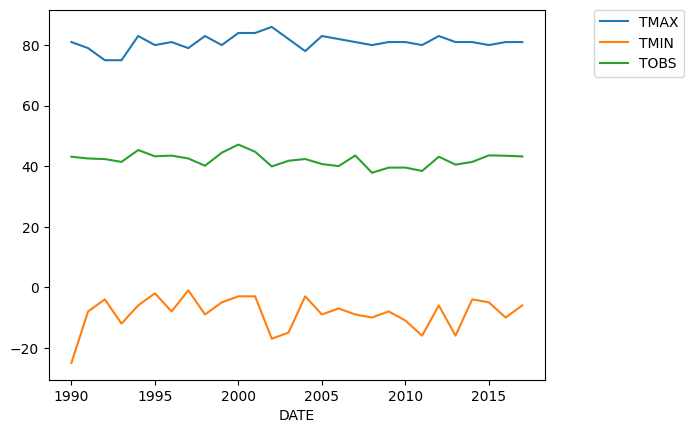

In [9]:
(alta
 .groupby(alta.DATE.dt.year)
 .agg({'TMAX':'max', 'TMIN': 'min', 'TOBS': 'mean'})
 .loc[1990:2017]
 .plot()
 .legend(loc=(1.1,0.82))
)

In [11]:
import matplotlib.pyplot as plt

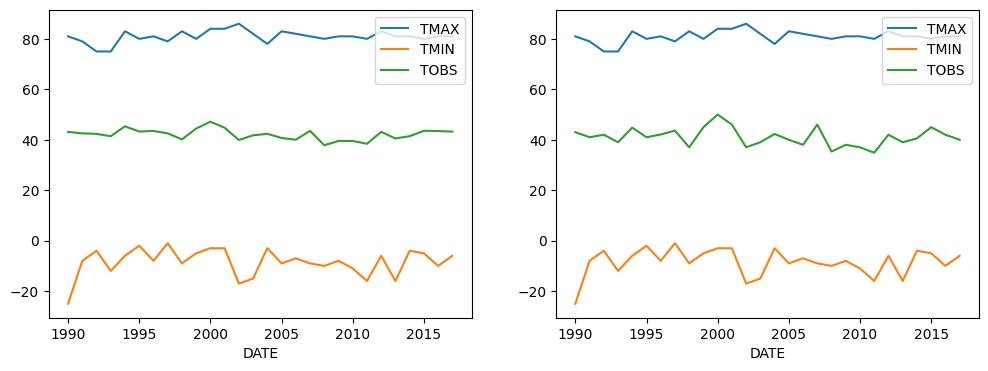

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax1 = (alta
 .groupby(alta.DATE.dt.year)
 .agg({'TMAX':'max', 'TMIN': 'min', 'TOBS': 'mean'})
 .loc[1990:2017]
 .plot(ax=ax[0])
 .legend(loc='upper right')
)

def q51(g):
    return g.quantile(.51)


ax2 = (alta
 .groupby(alta.DATE.dt.year)
 #.mean()
 .agg({'TMAX': 'max', 'TMIN':'min', #'TOBS': lambda g: g.quantile(.51)
       'TOBS': q51
      })
 .loc[1990:2017]
 #.loc[:, 'TMAX':'TOBS']
 .plot(ax=ax[1])
 .legend(loc='upper right')
)


In [108]:
# get the average temp by year
(nyc2
 .groupby(nyc2.est.dt.year.rename('Year'))
 .mean()
 [['mean_temperaturef']]
)

mean_temperaturef
Year                   
2007          55.430137
2008          55.606557
2009          54.358904
2010          57.057534
2011          56.772603
2012          57.763736
2013          55.693151
2014          54.742466

<AxesSubplot: xlabel='Year'>

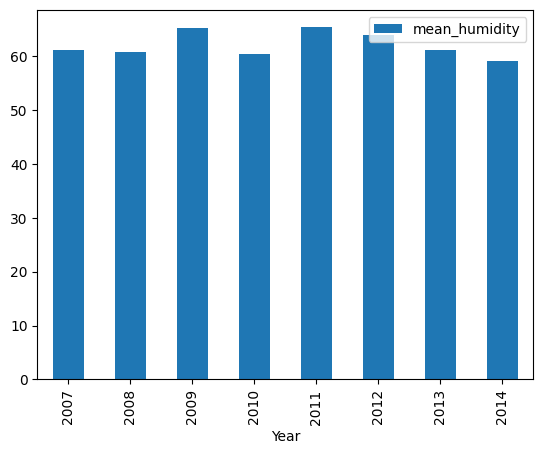

In [111]:
# Plot the average humidity by year

(nyc2
 .groupby(nyc2.est.dt.year.rename('Year'))
 .mean()
 [['mean_humidity']]
 .plot.bar()
)

In [115]:
import matplotlib.pyplot as plt

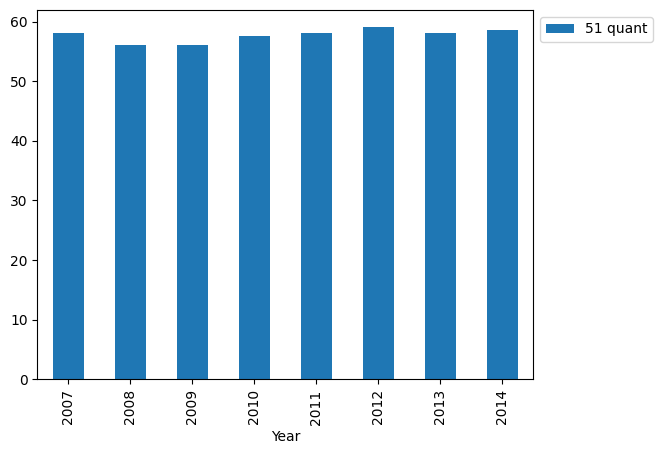

In [136]:
# Plot the 51st quantile of temp by year(nyc2
(nyc2
 [['mean_temperaturef']]
 .groupby(nyc2.est.dt.year.rename('Year'))
 .quantile(.51)
 .rename(columns={'mean_temperaturef':'51 quant'})
 .plot.bar()
 .legend(bbox_to_anchor=(1,1))
)